In [1]:
import tensorflow as tf
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.datasets import fetch_olivetti_faces
from models.WGANGP import WGANGP

x_train = fetch_olivetti_faces().images
x_train = np.expand_dims(x_train, axis = -1)

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '007'
DATA_NAME = 'olivettiface'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

(400, 64, 64, 1)


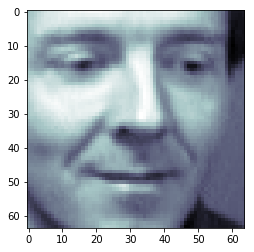

In [3]:
print(tf.keras.backend.int_shape(x_train))
plt.imshow((x_train[22][:,:,0]), cmap=plt.cm.bone)

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 64

In [5]:
gan = WGANGP(input_dim = (IMAGE_SIZE, IMAGE_SIZE,1)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [4,4,4,4]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = 0.5
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [2,2,2,2]
        , generator_conv_filters = [512,256,128,64]
        , generator_conv_kernel_size = [3,3,3,3]
        , generator_conv_strides = [1,1,1,1,1]
        , generator_compress_filters = [256,128,64,1]
        , generator_compress_kernel_size = [3,3,3,3]
        , generator_compress_strides = [1,1,1,1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = 0.5
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
gan.critic.summary()
gan.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 1)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  1088      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  131200    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0     

In [7]:
EPOCHS = 10000
PRINT_EVERY_N_BATCHES = 50
N_CRITIC = 5
BATCH_SIZE = 32

In [8]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
)

0 (5, 1) [D loss: (6.3306)(R -1.0904, F 0.0051, G 0.7416)] [G loss: -0.1143]
1 (5, 1) [D loss: (-28.1611)(R -28.4409, F 0.2050, G 0.0075)] [G loss: 0.8186]
2 (5, 1) [D loss: (-53.5874)(R -72.9830, F 1.1502, G 1.8245)] [G loss: -10.2366]
3 (5, 1) [D loss: (-56.9424)(R -89.1757, F 5.0751, G 2.7158)] [G loss: -26.8022]
4 (5, 1) [D loss: (-53.6369)(R -85.5237, F 7.1375, G 2.4749)] [G loss: -36.1362]
5 (5, 1) [D loss: (-65.4090)(R -99.5607, F 4.2789, G 2.9873)] [G loss: -46.9074]
6 (5, 1) [D loss: (-92.6509)(R -116.1010, F -8.0283, G 3.1478)] [G loss: -64.4371]
7 (5, 1) [D loss: (-147.5378)(R -122.2680, F -87.4169, G 6.2147)] [G loss: -50.4027]
8 (5, 1) [D loss: (-220.7833)(R -191.8780, F -190.3376, G 16.1432)] [G loss: -153.7328]
9 (5, 1) [D loss: (-256.9280)(R -214.0045, F -213.8755, G 17.0952)] [G loss: -169.0666]
10 (5, 1) [D loss: (-268.3142)(R -175.5823, F -269.7857, G 17.7054)] [G loss: -72.4179]
11 (5, 1) [D loss: (-251.6074)(R -265.6572, F -183.1025, G 19.7152)] [G loss: -188.2177]

97 (5, 1) [D loss: (-3.0174)(R 89.5294, F -93.7948, G 0.1248)] [G loss: 93.3112]
98 (5, 1) [D loss: (-3.5290)(R 91.8902, F -96.8456, G 0.1426)] [G loss: 87.6286]
99 (5, 1) [D loss: (-6.4365)(R 85.4474, F -92.9597, G 0.1076)] [G loss: 80.7506]
100 (5, 1) [D loss: (-8.9381)(R 81.2346, F -91.2530, G 0.1080)] [G loss: 77.7171]
101 (5, 1) [D loss: (-5.9467)(R 68.8324, F -76.0797, G 0.1301)] [G loss: 62.6801]
102 (5, 1) [D loss: (-10.1045)(R 58.6432, F -70.6210, G 0.1873)] [G loss: 53.5572]
103 (5, 1) [D loss: (-10.0580)(R 33.2238, F -44.1817, G 0.0900)] [G loss: 33.2508]
104 (5, 1) [D loss: (-9.5632)(R -10.7061, F 0.4083, G 0.0735)] [G loss: -8.4904]
105 (5, 1) [D loss: (-13.7217)(R -85.3095, F 62.7477, G 0.8840)] [G loss: -72.5793]
106 (5, 1) [D loss: (-30.7151)(R -81.0859, F 41.6957, G 0.8675)] [G loss: -68.7679]
107 (5, 1) [D loss: (-11.6723)(R -47.1839, F 33.4819, G 0.2030)] [G loss: -41.5729]
108 (5, 1) [D loss: (-1.2063)(R -31.3405, F 29.9778, G 0.0156)] [G loss: -25.9482]
109 (5, 1) 

198 (5, 1) [D loss: (-6.1345)(R 54.1029, F -60.7774, G 0.0540)] [G loss: 56.8668]
199 (5, 1) [D loss: (1.5513)(R 40.6455, F -39.1684, G 0.0074)] [G loss: 38.6874]
200 (5, 1) [D loss: (-1.5317)(R 26.5473, F -28.1342, G 0.0055)] [G loss: 25.4445]
201 (5, 1) [D loss: (-2.2186)(R 12.4477, F -14.7963, G 0.0130)] [G loss: 12.7062]
202 (5, 1) [D loss: (-1.0821)(R 9.3736, F -10.5306, G 0.0075)] [G loss: 8.2559]
203 (5, 1) [D loss: (1.7591)(R 7.4760, F -5.8014, G 0.0085)] [G loss: 6.5421]
204 (5, 1) [D loss: (3.3002)(R 8.4016, F -5.3010, G 0.0200)] [G loss: 7.0484]
205 (5, 1) [D loss: (0.2677)(R 10.9544, F -10.8960, G 0.0209)] [G loss: 10.7775]
206 (5, 1) [D loss: (-0.1559)(R 26.7372, F -26.9217, G 0.0029)] [G loss: 32.9940]
207 (5, 1) [D loss: (0.2446)(R 47.9957, F -48.4960, G 0.0745)] [G loss: 48.5100]
208 (5, 1) [D loss: (-6.3543)(R 48.8365, F -55.6142, G 0.0423)] [G loss: 52.8039]
209 (5, 1) [D loss: (-5.4432)(R 39.8261, F -45.4319, G 0.0163)] [G loss: 44.0981]
210 (5, 1) [D loss: (-6.0327)

299 (5, 1) [D loss: (-11.6352)(R 22.4528, F -34.6340, G 0.0546)] [G loss: 23.0986]
300 (5, 1) [D loss: (-3.8420)(R 38.3794, F -42.9193, G 0.0698)] [G loss: 41.4153]
301 (5, 1) [D loss: (-10.4549)(R 60.2527, F -72.9545, G 0.2247)] [G loss: 72.8712]
302 (5, 1) [D loss: (-6.3968)(R 72.6848, F -81.0183, G 0.1937)] [G loss: 79.0099]
303 (5, 1) [D loss: (-7.7522)(R 60.6834, F -69.1922, G 0.0757)] [G loss: 71.0466]
304 (5, 1) [D loss: (-9.4871)(R 51.9896, F -61.8367, G 0.0360)] [G loss: 57.7351]
305 (5, 1) [D loss: (-3.3240)(R 44.0145, F -47.4370, G 0.0098)] [G loss: 42.5680]
306 (5, 1) [D loss: (-4.7818)(R 22.4177, F -27.2529, G 0.0053)] [G loss: 23.3467]
307 (5, 1) [D loss: (-12.1726)(R -9.3998, F -3.4306, G 0.0658)] [G loss: 4.1911]
308 (5, 1) [D loss: (-13.8197)(R 2.5302, F -19.0098, G 0.2660)] [G loss: 15.0711]
309 (5, 1) [D loss: (-8.8629)(R 10.3459, F -20.9426, G 0.1734)] [G loss: 17.6070]
310 (5, 1) [D loss: (-4.0173)(R 15.6503, F -20.0015, G 0.0334)] [G loss: 18.0044]
311 (5, 1) [D l

400 (5, 1) [D loss: (9.9693)(R 117.5745, F -108.5909, G 0.0986)] [G loss: 106.8669]
401 (5, 1) [D loss: (-2.1100)(R 86.0903, F -88.2830, G 0.0083)] [G loss: 85.2883]
402 (5, 1) [D loss: (22.1542)(R 102.2467, F -80.1874, G 0.0095)] [G loss: 80.0617]
403 (5, 1) [D loss: (-3.7532)(R 41.1253, F -44.9435, G 0.0065)] [G loss: 49.1747]
404 (5, 1) [D loss: (0.6461)(R 50.5442, F -50.0019, G 0.0104)] [G loss: 53.8664]
405 (5, 1) [D loss: (-5.6924)(R 74.1354, F -80.0059, G 0.0178)] [G loss: 83.2115]
406 (5, 1) [D loss: (-7.3077)(R 78.7098, F -86.2821, G 0.0265)] [G loss: 84.0508]
407 (5, 1) [D loss: (-0.8148)(R 79.8099, F -80.6665, G 0.0042)] [G loss: 80.9338]
408 (5, 1) [D loss: (-5.1369)(R 88.1181, F -93.4270, G 0.0172)] [G loss: 96.7093]
409 (5, 1) [D loss: (-3.9563)(R 93.8921, F -97.9361, G 0.0088)] [G loss: 95.2855]
410 (5, 1) [D loss: (12.1450)(R 110.5733, F -98.8756, G 0.0447)] [G loss: 91.8381]
411 (5, 1) [D loss: (-12.0157)(R 88.3594, F -100.4182, G 0.0043)] [G loss: 106.3649]
412 (5, 1)

500 (5, 1) [D loss: (-11.6233)(R 12.9319, F -25.0699, G 0.0515)] [G loss: 22.5497]
501 (5, 1) [D loss: (-2.0821)(R 25.8304, F -28.8164, G 0.0904)] [G loss: 28.3796]
502 (5, 1) [D loss: (-2.7027)(R 28.3651, F -31.9330, G 0.0865)] [G loss: 33.4460]
503 (5, 1) [D loss: (-13.4981)(R 32.7562, F -46.6670, G 0.0413)] [G loss: 52.7021]
504 (5, 1) [D loss: (-9.9522)(R 47.4756, F -58.1683, G 0.0740)] [G loss: 44.5874]
505 (5, 1) [D loss: (-8.8619)(R 56.6533, F -65.5911, G 0.0076)] [G loss: 53.3857]
506 (5, 1) [D loss: (8.4368)(R 52.5886, F -44.2987, G 0.0147)] [G loss: 47.7062]
507 (5, 1) [D loss: (5.4788)(R 44.0695, F -38.6335, G 0.0043)] [G loss: 36.7670]
508 (5, 1) [D loss: (15.4913)(R 50.1790, F -34.7308, G 0.0043)] [G loss: 52.2251]
509 (5, 1) [D loss: (1.3192)(R 51.8569, F -50.5749, G 0.0037)] [G loss: 35.1496]
510 (5, 1) [D loss: (6.3773)(R 70.0061, F -63.6659, G 0.0037)] [G loss: 73.3687]
511 (5, 1) [D loss: (-2.1542)(R 66.1295, F -68.3442, G 0.0060)] [G loss: 68.2493]
512 (5, 1) [D loss

600 (5, 1) [D loss: (-17.2058)(R -101.1253, F 83.8831, G 0.0036)] [G loss: -100.9018]
601 (5, 1) [D loss: (-4.6320)(R -130.2415, F 123.4975, G 0.2112)] [G loss: -118.9444]
602 (5, 1) [D loss: (2.4199)(R -88.7031, F 90.5181, G 0.0605)] [G loss: -78.3270]
603 (5, 1) [D loss: (-1.0154)(R -79.3494, F 77.8475, G 0.0486)] [G loss: -72.9219]
604 (5, 1) [D loss: (-12.1242)(R -74.3774, F 62.0509, G 0.0202)] [G loss: -74.5008]
605 (5, 1) [D loss: (2.9778)(R -85.3435, F 88.2327, G 0.0089)] [G loss: -84.3655]
606 (5, 1) [D loss: (4.7071)(R -77.7851, F 82.4685, G 0.0024)] [G loss: -67.4906]
607 (5, 1) [D loss: (7.0096)(R -77.6035, F 84.5462, G 0.0067)] [G loss: -78.4061]
608 (5, 1) [D loss: (-12.8442)(R -87.4779, F 74.4594, G 0.0174)] [G loss: -87.9675]
609 (5, 1) [D loss: (-13.9813)(R -97.8946, F 83.5230, G 0.0390)] [G loss: -96.5955]
610 (5, 1) [D loss: (-9.5021)(R -105.1361, F 95.4906, G 0.0143)] [G loss: -99.0185]
611 (5, 1) [D loss: (5.7006)(R -97.4353, F 103.0404, G 0.0096)] [G loss: -97.7676

699 (5, 1) [D loss: (-1.6988)(R -26.1623, F 24.4225, G 0.0041)] [G loss: -25.1764]
700 (5, 1) [D loss: (-3.0534)(R -26.4622, F 23.2709, G 0.0138)] [G loss: -27.6548]
701 (5, 1) [D loss: (-1.3089)(R -33.5055, F 32.0471, G 0.0149)] [G loss: -35.9604]
702 (5, 1) [D loss: (-0.8944)(R -28.1692, F 27.0839, G 0.0191)] [G loss: -27.6925]
703 (5, 1) [D loss: (-3.9543)(R -30.7206, F 26.5897, G 0.0177)] [G loss: -29.1195]
704 (5, 1) [D loss: (-2.8224)(R -37.6770, F 34.7550, G 0.0100)] [G loss: -39.5352]
705 (5, 1) [D loss: (-6.7713)(R -49.4734, F 42.6741, G 0.0028)] [G loss: -49.4023]
706 (5, 1) [D loss: (2.5845)(R -78.3913, F 80.3634, G 0.0612)] [G loss: -72.5036]
707 (5, 1) [D loss: (1.2852)(R -78.7458, F 79.8529, G 0.0178)] [G loss: -76.6489]
708 (5, 1) [D loss: (2.4354)(R -75.3987, F 77.7414, G 0.0093)] [G loss: -69.2799]
709 (5, 1) [D loss: (-0.7911)(R -75.3269, F 74.3821, G 0.0154)] [G loss: -67.4683]
710 (5, 1) [D loss: (-4.0458)(R -58.7448, F 54.6593, G 0.0040)] [G loss: -57.7370]
711 (5,

798 (5, 1) [D loss: (-2.0748)(R -95.9976, F 93.8310, G 0.0092)] [G loss: -87.8279]
799 (5, 1) [D loss: (-3.4140)(R -95.5832, F 92.0699, G 0.0099)] [G loss: -99.4367]
800 (5, 1) [D loss: (7.8483)(R -92.3295, F 99.9729, G 0.0205)] [G loss: -95.8317]
801 (5, 1) [D loss: (2.4172)(R -85.9848, F 88.1746, G 0.0227)] [G loss: -81.6172]
802 (5, 1) [D loss: (-7.7543)(R -76.8268, F 68.9976, G 0.0075)] [G loss: -80.0395]
803 (5, 1) [D loss: (-1.3636)(R -61.5432, F 59.7909, G 0.0389)] [G loss: -56.6918]
804 (5, 1) [D loss: (-4.8617)(R -42.5893, F 37.5111, G 0.0216)] [G loss: -35.3112]
805 (5, 1) [D loss: (-16.7503)(R -63.9779, F 47.0848, G 0.0143)] [G loss: -70.3708]
806 (5, 1) [D loss: (-0.3700)(R -77.1702, F 76.7502, G 0.0050)] [G loss: -68.3147]
807 (5, 1) [D loss: (-11.3912)(R -80.0230, F 68.4978, G 0.0134)] [G loss: -73.4163]
808 (5, 1) [D loss: (-5.9782)(R -76.2083, F 68.9613, G 0.1269)] [G loss: -84.7599]
809 (5, 1) [D loss: (1.5624)(R -80.6577, F 82.0246, G 0.0195)] [G loss: -74.0132]
810 (

894 (5, 1) [D loss: (13.1633)(R -282.6576, F 295.0478, G 0.0773)] [G loss: -294.2961]
895 (5, 1) [D loss: (-7.1011)(R -296.5528, F 288.5123, G 0.0939)] [G loss: -273.6449]
896 (5, 1) [D loss: (26.4628)(R -259.3986, F 285.6631, G 0.0198)] [G loss: -239.3076]
897 (5, 1) [D loss: (14.3260)(R -280.7005, F 294.8727, G 0.0154)] [G loss: -229.6322]
898 (5, 1) [D loss: (26.4563)(R -230.8854, F 257.0646, G 0.0277)] [G loss: -227.9907]
899 (5, 1) [D loss: (-2.6514)(R -225.9440, F 222.8591, G 0.0433)] [G loss: -213.6105]
900 (5, 1) [D loss: (-6.3746)(R -208.7109, F 202.0057, G 0.0331)] [G loss: -222.6460]
901 (5, 1) [D loss: (16.3415)(R -188.8780, F 205.1047, G 0.0115)] [G loss: -206.5819]
902 (5, 1) [D loss: (-8.8153)(R -241.4186, F 232.5755, G 0.0028)] [G loss: -234.7028]
903 (5, 1) [D loss: (2.5571)(R -265.2676, F 266.2134, G 0.1611)] [G loss: -247.8252]
904 (5, 1) [D loss: (8.6550)(R -256.4900, F 265.0621, G 0.0083)] [G loss: -275.6990]
905 (5, 1) [D loss: (28.3300)(R -273.7888, F 301.0794, G

990 (5, 1) [D loss: (5.5730)(R -56.5900, F 62.0864, G 0.0077)] [G loss: -62.0680]
991 (5, 1) [D loss: (-5.5383)(R -56.7647, F 51.1444, G 0.0082)] [G loss: -51.6928]
992 (5, 1) [D loss: (6.3678)(R -40.7902, F 47.0380, G 0.0120)] [G loss: -38.0157]
993 (5, 1) [D loss: (3.4250)(R -24.3860, F 27.6943, G 0.0117)] [G loss: -19.9250]
994 (5, 1) [D loss: (-2.3435)(R -28.4898, F 25.8824, G 0.0264)] [G loss: -25.0960]
995 (5, 1) [D loss: (-5.0134)(R -34.3232, F 29.1852, G 0.0125)] [G loss: -23.7955]
996 (5, 1) [D loss: (-2.3250)(R -51.1932, F 48.7581, G 0.0110)] [G loss: -41.6036]
997 (5, 1) [D loss: (-1.3993)(R -40.0515, F 38.6117, G 0.0040)] [G loss: -35.7795]
998 (5, 1) [D loss: (0.5178)(R -32.1103, F 32.5647, G 0.0063)] [G loss: -32.1541]
999 (5, 1) [D loss: (-6.2384)(R -33.0045, F 26.6989, G 0.0067)] [G loss: -36.3602]
1000 (5, 1) [D loss: (-0.8072)(R -51.5391, F 50.4297, G 0.0302)] [G loss: -51.9621]
1001 (5, 1) [D loss: (3.3930)(R -46.8521, F 49.8213, G 0.0424)] [G loss: -33.9258]
1002 (5

1089 (5, 1) [D loss: (5.5492)(R -145.0555, F 150.4366, G 0.0168)] [G loss: -157.2327]
1090 (5, 1) [D loss: (1.4945)(R -130.6516, F 131.9534, G 0.0193)] [G loss: -151.8808]
1091 (5, 1) [D loss: (10.2824)(R -135.8599, F 145.9767, G 0.0166)] [G loss: -133.3132]
1092 (5, 1) [D loss: (-0.7473)(R -99.7670, F 98.9011, G 0.0119)] [G loss: -98.0681]
1093 (5, 1) [D loss: (-10.2773)(R -110.0809, F 99.1585, G 0.0645)] [G loss: -109.6743]
1094 (5, 1) [D loss: (-10.5790)(R -157.5337, F 146.8581, G 0.0097)] [G loss: -178.4216]
1095 (5, 1) [D loss: (-27.4972)(R -176.0811, F 148.4200, G 0.0164)] [G loss: -160.7132]
1096 (5, 1) [D loss: (-31.1746)(R -202.4871, F 171.2323, G 0.0080)] [G loss: -197.4731]
1097 (5, 1) [D loss: (32.3210)(R -172.8633, F 204.6062, G 0.0578)] [G loss: -181.9558]
1098 (5, 1) [D loss: (11.6730)(R -162.4038, F 173.9934, G 0.0083)] [G loss: -168.2393]
1099 (5, 1) [D loss: (14.5448)(R -146.3444, F 160.7216, G 0.0168)] [G loss: -145.4033]
1100 (5, 1) [D loss: (-13.2840)(R -132.5538, 

1185 (5, 1) [D loss: (-2.8502)(R -34.2852, F 31.4062, G 0.0029)] [G loss: -39.4217]
1186 (5, 1) [D loss: (-4.5106)(R -44.8754, F 39.9622, G 0.0403)] [G loss: -37.7013]
1187 (5, 1) [D loss: (-2.4756)(R -30.7633, F 27.8840, G 0.0404)] [G loss: -30.4129]
1188 (5, 1) [D loss: (-11.4244)(R -58.4954, F 47.0011, G 0.0070)] [G loss: -47.2550]
1189 (5, 1) [D loss: (1.2751)(R -67.1602, F 68.3350, G 0.0100)] [G loss: -60.9355]
1190 (5, 1) [D loss: (1.8584)(R -66.9620, F 68.7480, G 0.0072)] [G loss: -69.0172]
1191 (5, 1) [D loss: (8.4551)(R -68.2365, F 76.5361, G 0.0155)] [G loss: -62.1464]
1192 (5, 1) [D loss: (0.7135)(R -83.5760, F 83.7167, G 0.0573)] [G loss: -85.6980]
1193 (5, 1) [D loss: (2.4202)(R -92.0636, F 94.0559, G 0.0428)] [G loss: -85.7145]
1194 (5, 1) [D loss: (-9.8746)(R -93.0741, F 83.1643, G 0.0035)] [G loss: -93.9647]
1195 (5, 1) [D loss: (-16.9211)(R -120.0430, F 102.9423, G 0.0180)] [G loss: -111.1161]
1196 (5, 1) [D loss: (10.0577)(R -122.0701, F 131.9453, G 0.0183)] [G loss: 

1282 (5, 1) [D loss: (-1.3462)(R -46.3830, F 44.9699, G 0.0067)] [G loss: -45.7592]
1283 (5, 1) [D loss: (1.1268)(R -29.8523, F 30.8842, G 0.0095)] [G loss: -29.3448]
1284 (5, 1) [D loss: (-0.9528)(R -33.8265, F 32.8280, G 0.0046)] [G loss: -42.9803]
1285 (5, 1) [D loss: (1.9866)(R -40.7711, F 42.4135, G 0.0344)] [G loss: -33.5309]
1286 (5, 1) [D loss: (-1.9836)(R -32.8069, F 30.7055, G 0.0118)] [G loss: -31.1721]
1287 (5, 1) [D loss: (-0.5726)(R -44.1970, F 43.4536, G 0.0171)] [G loss: -40.0302]
1288 (5, 1) [D loss: (3.7581)(R -41.4765, F 45.2020, G 0.0033)] [G loss: -37.6835]
1289 (5, 1) [D loss: (-0.1531)(R -39.5397, F 39.3388, G 0.0048)] [G loss: -35.0281]
1290 (5, 1) [D loss: (-9.9837)(R -43.3666, F 33.3181, G 0.0065)] [G loss: -44.7722]
1291 (5, 1) [D loss: (7.5640)(R -34.1528, F 41.4467, G 0.0270)] [G loss: -37.6400]
1292 (5, 1) [D loss: (-2.4759)(R -23.0572, F 20.2209, G 0.0360)] [G loss: -21.1379]
1293 (5, 1) [D loss: (-1.0321)(R -36.2450, F 35.1271, G 0.0086)] [G loss: -38.74

1380 (5, 1) [D loss: (9.5815)(R -95.5347, F 104.9004, G 0.0216)] [G loss: -83.5801]
1381 (5, 1) [D loss: (-3.5751)(R -103.5521, F 99.7784, G 0.0198)] [G loss: -100.7898]
1382 (5, 1) [D loss: (4.1028)(R -110.6314, F 114.6037, G 0.0131)] [G loss: -103.5182]
1383 (5, 1) [D loss: (4.7490)(R -103.2693, F 107.9815, G 0.0037)] [G loss: -103.7530]
1384 (5, 1) [D loss: (-5.9190)(R -119.6843, F 113.6708, G 0.0095)] [G loss: -120.0482]
1385 (5, 1) [D loss: (-6.3812)(R -126.0283, F 119.5386, G 0.0109)] [G loss: -136.0497]
1386 (5, 1) [D loss: (-5.5998)(R -141.6723, F 136.0392, G 0.0033)] [G loss: -135.6883]
1387 (5, 1) [D loss: (2.6992)(R -110.3335, F 112.4510, G 0.0582)] [G loss: -101.3274]
1388 (5, 1) [D loss: (4.7823)(R -94.0399, F 98.6935, G 0.0129)] [G loss: -83.3502]
1389 (5, 1) [D loss: (1.9343)(R -89.7444, F 91.5756, G 0.0103)] [G loss: -91.5418]
1390 (5, 1) [D loss: (-11.9128)(R -110.5423, F 98.6070, G 0.0023)] [G loss: -114.4261]
1391 (5, 1) [D loss: (5.4593)(R -129.5669, F 133.7871, G 0

1477 (5, 1) [D loss: (-10.4634)(R -91.1631, F 80.4094, G 0.0290)] [G loss: -94.2872]
1478 (5, 1) [D loss: (-0.4015)(R -92.0352, F 91.5148, G 0.0119)] [G loss: -88.3444]
1479 (5, 1) [D loss: (14.1621)(R -87.8731, F 101.8573, G 0.0178)] [G loss: -88.9195]
1480 (5, 1) [D loss: (-7.9583)(R -78.3963, F 70.3839, G 0.0054)] [G loss: -70.8544]
1481 (5, 1) [D loss: (1.8681)(R -79.8219, F 81.6640, G 0.0026)] [G loss: -88.7424]
1482 (5, 1) [D loss: (-0.5122)(R -84.5505, F 83.9809, G 0.0057)] [G loss: -91.6579]
1483 (5, 1) [D loss: (7.7811)(R -73.9091, F 81.6460, G 0.0044)] [G loss: -77.9583]
1484 (5, 1) [D loss: (3.0198)(R -64.4994, F 67.4436, G 0.0076)] [G loss: -56.2099]
1485 (5, 1) [D loss: (-5.6510)(R -64.2890, F 58.4949, G 0.0143)] [G loss: -62.0683]
1486 (5, 1) [D loss: (2.0962)(R -80.0676, F 82.1236, G 0.0040)] [G loss: -67.6493]
1487 (5, 1) [D loss: (-8.6478)(R -99.0167, F 90.2762, G 0.0093)] [G loss: -97.6676]
1488 (5, 1) [D loss: (-7.3116)(R -93.0528, F 85.6499, G 0.0091)] [G loss: -93.

1572 (5, 1) [D loss: (-15.9754)(R -149.2668, F 133.1485, G 0.0143)] [G loss: -122.9032]
1573 (5, 1) [D loss: (-15.0901)(R -126.0149, F 110.8758, G 0.0049)] [G loss: -102.5470]
1574 (5, 1) [D loss: (3.4133)(R -120.9351, F 124.1744, G 0.0174)] [G loss: -113.2861]
1575 (5, 1) [D loss: (22.2104)(R -111.6373, F 133.7312, G 0.0116)] [G loss: -104.5485]
1576 (5, 1) [D loss: (-12.7691)(R -148.6315, F 135.8225, G 0.0040)] [G loss: -128.7983]
1577 (5, 1) [D loss: (-56.8711)(R -185.7245, F 128.4482, G 0.0405)] [G loss: -191.2213]
1578 (5, 1) [D loss: (-22.8510)(R -171.2035, F 148.2806, G 0.0072)] [G loss: -176.7584]
1579 (5, 1) [D loss: (7.1165)(R -163.0275, F 170.0705, G 0.0074)] [G loss: -155.5196]
1580 (5, 1) [D loss: (18.4183)(R -164.7470, F 183.0937, G 0.0072)] [G loss: -195.8990]
1581 (5, 1) [D loss: (10.5762)(R -147.9876, F 158.4218, G 0.0142)] [G loss: -151.0315]
1582 (5, 1) [D loss: (56.2097)(R -86.5447, F 142.7112, G 0.0043)] [G loss: -70.1023]
1583 (5, 1) [D loss: (-24.6439)(R -143.641

1667 (5, 1) [D loss: (-4.2691)(R -67.9205, F 63.6065, G 0.0045)] [G loss: -60.6283]
1668 (5, 1) [D loss: (11.8440)(R -50.5424, F 62.3215, G 0.0065)] [G loss: -54.8537]
1669 (5, 1) [D loss: (-5.6054)(R -35.3313, F 29.4487, G 0.0277)] [G loss: -27.5417]
1670 (5, 1) [D loss: (3.8672)(R -44.3428, F 48.1797, G 0.0030)] [G loss: -50.1413]
1671 (5, 1) [D loss: (-0.5973)(R -48.0912, F 47.3069, G 0.0187)] [G loss: -58.5891]
1672 (5, 1) [D loss: (-11.7540)(R -62.3959, F 50.3884, G 0.0253)] [G loss: -45.9638]
1673 (5, 1) [D loss: (22.6983)(R -52.6688, F 75.2767, G 0.0090)] [G loss: -53.0781]
1674 (5, 1) [D loss: (12.0006)(R -47.1897, F 59.1295, G 0.0061)] [G loss: -56.6277]
1675 (5, 1) [D loss: (-8.2321)(R -48.3232, F 39.9906, G 0.0100)] [G loss: -52.4330]
1676 (5, 1) [D loss: (-6.9647)(R -50.5538, F 43.4806, G 0.0108)] [G loss: -47.0544]
1677 (5, 1) [D loss: (-7.5017)(R -69.5120, F 61.8994, G 0.0111)] [G loss: -53.9430]
1678 (5, 1) [D loss: (1.3495)(R -73.6050, F 74.8227, G 0.0132)] [G loss: -55

1766 (5, 1) [D loss: (12.0753)(R 11.0821, F 0.9556, G 0.0038)] [G loss: -14.1257]
1767 (5, 1) [D loss: (0.9548)(R -5.8791, F 6.7809, G 0.0053)] [G loss: -13.9487]
1768 (5, 1) [D loss: (13.1913)(R -0.7640, F 13.8558, G 0.0099)] [G loss: 34.1163]
1769 (5, 1) [D loss: (0.3635)(R 5.5171, F -5.2083, G 0.0055)] [G loss: 1.0120]
1770 (5, 1) [D loss: (26.5670)(R -9.9180, F 36.4531, G 0.0032)] [G loss: 17.2011]
1771 (5, 1) [D loss: (-24.7049)(R -15.6105, F -9.5458, G 0.0451)] [G loss: 23.3091]
1772 (5, 1) [D loss: (19.7465)(R 1.9031, F 17.8172, G 0.0026)] [G loss: -18.1184]
1773 (5, 1) [D loss: (8.9003)(R 4.4471, F 4.3717, G 0.0082)] [G loss: -5.1397]
1774 (5, 1) [D loss: (12.6281)(R 27.3229, F -14.8570, G 0.0162)] [G loss: -10.2377]
1775 (5, 1) [D loss: (-52.4071)(R -20.0179, F -32.4262, G 0.0037)] [G loss: -19.1245]
1776 (5, 1) [D loss: (3.9198)(R -38.3315, F 42.2192, G 0.0032)] [G loss: -31.8772]
1777 (5, 1) [D loss: (24.6687)(R -51.7030, F 76.3471, G 0.0025)] [G loss: -46.1089]
1778 (5, 1) 

1863 (5, 1) [D loss: (11.5042)(R -71.4695, F 82.9257, G 0.0048)] [G loss: -58.8812]
1864 (5, 1) [D loss: (-0.2322)(R -93.2106, F 92.7776, G 0.0201)] [G loss: -63.3771]
1865 (5, 1) [D loss: (-17.6967)(R -107.4633, F 89.4865, G 0.0280)] [G loss: -93.6472]
1866 (5, 1) [D loss: (-58.9740)(R -142.7437, F 83.5780, G 0.0192)] [G loss: -119.3614]
1867 (5, 1) [D loss: (37.3061)(R -113.9871, F 151.0270, G 0.0266)] [G loss: -124.5662]
1868 (5, 1) [D loss: (-10.3049)(R -138.8234, F 128.3522, G 0.0166)] [G loss: -133.0745]
1869 (5, 1) [D loss: (7.0721)(R -154.2057, F 161.1405, G 0.0137)] [G loss: -133.9755]
1870 (5, 1) [D loss: (26.2484)(R -113.6541, F 139.8176, G 0.0085)] [G loss: -145.9962]
1871 (5, 1) [D loss: (-42.4369)(R -142.3135, F 99.8233, G 0.0053)] [G loss: -112.0738]
1872 (5, 1) [D loss: (-2.3883)(R -161.6922, F 159.2158, G 0.0088)] [G loss: -112.0972]
1873 (5, 1) [D loss: (41.2446)(R -121.1966, F 162.4026, G 0.0039)] [G loss: -126.6228]
1874 (5, 1) [D loss: (11.7758)(R -137.9382, F 149.

1958 (5, 1) [D loss: (-1.0521)(R -140.5334, F 139.4060, G 0.0075)] [G loss: -98.7682]
1959 (5, 1) [D loss: (-14.9257)(R -93.4802, F 78.4449, G 0.0110)] [G loss: -87.9324]
1960 (5, 1) [D loss: (46.4900)(R -105.2288, F 151.4534, G 0.0265)] [G loss: -119.8292]
1961 (5, 1) [D loss: (-43.6538)(R -106.6746, F 62.8179, G 0.0203)] [G loss: -96.8296]
1962 (5, 1) [D loss: (-8.1550)(R -118.1629, F 109.8730, G 0.0135)] [G loss: -92.5625]
1963 (5, 1) [D loss: (-29.3717)(R -90.3856, F 60.9318, G 0.0082)] [G loss: -117.9338]
1964 (5, 1) [D loss: (-9.6263)(R -148.3184, F 138.5521, G 0.0140)] [G loss: -125.8469]
1965 (5, 1) [D loss: (4.5673)(R -125.3464, F 129.8684, G 0.0045)] [G loss: -110.3634]
1966 (5, 1) [D loss: (71.5710)(R -36.3555, F 107.8818, G 0.0045)] [G loss: -84.7157]
1967 (5, 1) [D loss: (7.4624)(R -97.0905, F 104.4581, G 0.0095)] [G loss: -97.7451]
1968 (5, 1) [D loss: (43.1528)(R -74.3880, F 117.4995, G 0.0041)] [G loss: -85.2715]
1969 (5, 1) [D loss: (4.7480)(R -89.7798, F 94.5002, G 0.

2055 (5, 1) [D loss: (-24.9929)(R -112.7576, F 87.4997, G 0.0265)] [G loss: -40.2259]
2056 (5, 1) [D loss: (23.3284)(R -32.1574, F 55.0663, G 0.0420)] [G loss: -6.7742]
2057 (5, 1) [D loss: (20.5997)(R -28.1696, F 48.6650, G 0.0104)] [G loss: -44.2783]
2058 (5, 1) [D loss: (2.9718)(R -57.3478, F 60.1294, G 0.0190)] [G loss: -28.4775]
2059 (5, 1) [D loss: (-2.2850)(R -38.1810, F 35.7825, G 0.0114)] [G loss: -42.6021]
2060 (5, 1) [D loss: (100.5802)(R 58.1291, F 42.4177, G 0.0033)] [G loss: -51.2971]
2061 (5, 1) [D loss: (-39.2442)(R -38.2224, F -1.0892, G 0.0067)] [G loss: -25.1509]
2062 (5, 1) [D loss: (61.6794)(R -9.9130, F 71.3251, G 0.0267)] [G loss: -42.8668]
2063 (5, 1) [D loss: (-25.4741)(R -23.3483, F -2.1761, G 0.0050)] [G loss: -36.8099]
2064 (5, 1) [D loss: (0.9797)(R -29.4736, F 30.3796, G 0.0074)] [G loss: -69.7053]
2065 (5, 1) [D loss: (18.8994)(R -13.6527, F 32.4867, G 0.0065)] [G loss: -61.5588]
2066 (5, 1) [D loss: (25.4305)(R -71.6987, F 97.0752, G 0.0054)] [G loss: -7

2154 (5, 1) [D loss: (-1.3838)(R -8.1563, F 6.6027, G 0.0170)] [G loss: 11.1147]
2155 (5, 1) [D loss: (15.7643)(R -0.6752, F 16.2263, G 0.0213)] [G loss: 4.5802]
2156 (5, 1) [D loss: (-17.4201)(R -12.0025, F -5.4719, G 0.0054)] [G loss: 1.9102]
2157 (5, 1) [D loss: (8.5093)(R 0.2657, F 8.2151, G 0.0028)] [G loss: 6.9255]
2158 (5, 1) [D loss: (12.5570)(R 17.1094, F -4.5835, G 0.0031)] [G loss: -13.5022]
2159 (5, 1) [D loss: (15.3158)(R -0.5415, F 15.7570, G 0.0100)] [G loss: -24.6337]
2160 (5, 1) [D loss: (26.1352)(R 8.2520, F 17.7539, G 0.0129)] [G loss: -5.5940]
2161 (5, 1) [D loss: (-1.8335)(R -13.0185, F 11.0658, G 0.0119)] [G loss: -13.3768]
2162 (5, 1) [D loss: (11.7016)(R 10.9372, F 0.6752, G 0.0089)] [G loss: 0.7692]
2163 (5, 1) [D loss: (-6.3308)(R -14.3191, F 7.8010, G 0.0187)] [G loss: -9.2976]
2164 (5, 1) [D loss: (-13.6795)(R -15.5717, F 1.8315, G 0.0061)] [G loss: -6.9941]
2165 (5, 1) [D loss: (8.8841)(R -12.9845, F 21.8312, G 0.0037)] [G loss: 5.4316]
2166 (5, 1) [D loss:

2254 (5, 1) [D loss: (-18.3124)(R 8.9712, F -27.3789, G 0.0095)] [G loss: -20.8742]
2255 (5, 1) [D loss: (19.9292)(R 10.8634, F 9.0106, G 0.0055)] [G loss: 5.0101]
2256 (5, 1) [D loss: (12.7864)(R 26.3044, F -13.5881, G 0.0070)] [G loss: -0.7149]
2257 (5, 1) [D loss: (-13.9807)(R 10.4271, F -24.4613, G 0.0054)] [G loss: 45.6245]
2258 (5, 1) [D loss: (-31.5654)(R 13.6877, F -45.3992, G 0.0146)] [G loss: 35.6792]
2259 (5, 1) [D loss: (36.8616)(R 58.7531, F -22.2366, G 0.0345)] [G loss: 30.6534]
2260 (5, 1) [D loss: (-27.2053)(R 32.1001, F -59.4063, G 0.0101)] [G loss: 53.2751]
2261 (5, 1) [D loss: (-48.3689)(R 30.0921, F -78.5919, G 0.0131)] [G loss: 61.9003]
2262 (5, 1) [D loss: (-3.1410)(R 60.9424, F -64.1258, G 0.0042)] [G loss: 43.7050]
2263 (5, 1) [D loss: (14.2351)(R 47.1604, F -33.1817, G 0.0256)] [G loss: 29.2875]
2264 (5, 1) [D loss: (-5.6099)(R 65.4258, F -71.1616, G 0.0126)] [G loss: 72.9074]
2265 (5, 1) [D loss: (41.2490)(R 79.2271, F -38.1488, G 0.0171)] [G loss: 80.6316]
22

2352 (5, 1) [D loss: (-47.5925)(R -99.7478, F 51.7008, G 0.0455)] [G loss: -23.7056]
2353 (5, 1) [D loss: (53.5927)(R -59.3514, F 112.8924, G 0.0052)] [G loss: -106.8745]
2354 (5, 1) [D loss: (30.0572)(R -110.4145, F 140.1290, G 0.0343)] [G loss: -108.4723]
2355 (5, 1) [D loss: (-94.4698)(R -129.7885, F 35.2872, G 0.0031)] [G loss: -180.4149]
2356 (5, 1) [D loss: (14.3338)(R -65.5283, F 79.6171, G 0.0245)] [G loss: -55.7334]
2357 (5, 1) [D loss: (-15.3036)(R -183.2134, F 167.7038, G 0.0206)] [G loss: -157.6625]
2358 (5, 1) [D loss: (-49.7352)(R -203.0125, F 152.9695, G 0.0308)] [G loss: -168.9541]
2359 (5, 1) [D loss: (-127.4376)(R -178.6559, F 51.0143, G 0.0204)] [G loss: -217.5585]
2360 (5, 1) [D loss: (50.6686)(R -149.4813, F 199.6375, G 0.0512)] [G loss: -122.0072]
2361 (5, 1) [D loss: (-100.8141)(R -147.7209, F 46.8247, G 0.0082)] [G loss: -125.4177]
2362 (5, 1) [D loss: (-12.0373)(R -156.5208, F 144.1843, G 0.0299)] [G loss: -42.8918]
2363 (5, 1) [D loss: (-26.5831)(R -121.9330, 

2450 (5, 1) [D loss: (-22.2597)(R 49.4267, F -71.7457, G 0.0059)] [G loss: 41.4154]
2451 (5, 1) [D loss: (12.4038)(R 41.3939, F -29.0361, G 0.0046)] [G loss: 27.4685]
2452 (5, 1) [D loss: (-19.3856)(R 29.2554, F -48.7182, G 0.0077)] [G loss: 12.2462]
2453 (5, 1) [D loss: (0.3207)(R 25.8548, F -25.5854, G 0.0051)] [G loss: 64.0540]
2454 (5, 1) [D loss: (-27.5783)(R 4.5463, F -32.2313, G 0.0107)] [G loss: 11.0654]
2455 (5, 1) [D loss: (8.4426)(R 25.3378, F -17.0485, G 0.0153)] [G loss: -6.4166]
2456 (5, 1) [D loss: (-13.6313)(R 6.4752, F -20.1793, G 0.0073)] [G loss: -7.7221]
2457 (5, 1) [D loss: (-11.0492)(R 18.7545, F -29.9514, G 0.0148)] [G loss: 17.0810]
2458 (5, 1) [D loss: (-1.4029)(R 4.5910, F -6.0580, G 0.0064)] [G loss: -14.8739]
2459 (5, 1) [D loss: (5.1323)(R 3.8762, F 1.1985, G 0.0058)] [G loss: 10.0348]
2460 (5, 1) [D loss: (-13.6055)(R 8.2411, F -21.9232, G 0.0077)] [G loss: 12.8135]
2461 (5, 1) [D loss: (-23.2843)(R 33.6953, F -57.0748, G 0.0095)] [G loss: 27.9909]
2462 (5

2549 (5, 1) [D loss: (-1.2280)(R 61.6948, F -63.0197, G 0.0097)] [G loss: 53.6674]
2550 (5, 1) [D loss: (9.9603)(R 60.5082, F -50.8600, G 0.0312)] [G loss: 56.1418]
2551 (5, 1) [D loss: (8.6332)(R 58.1890, F -49.6719, G 0.0116)] [G loss: 50.9876]
2552 (5, 1) [D loss: (9.3190)(R 52.6488, F -43.3766, G 0.0047)] [G loss: 31.6377]
2553 (5, 1) [D loss: (-11.8367)(R 39.3482, F -51.2125, G 0.0028)] [G loss: 53.9623]
2554 (5, 1) [D loss: (5.1040)(R 55.5051, F -50.4351, G 0.0034)] [G loss: 45.5716]
2555 (5, 1) [D loss: (-1.7772)(R 35.0015, F -36.8618, G 0.0083)] [G loss: 28.7356]
2556 (5, 1) [D loss: (6.8152)(R 33.0045, F -26.9007, G 0.0711)] [G loss: 36.2647]
2557 (5, 1) [D loss: (4.7790)(R 37.6738, F -33.5741, G 0.0679)] [G loss: 39.2101]
2558 (5, 1) [D loss: (-1.9314)(R 28.6095, F -30.6244, G 0.0083)] [G loss: 28.6111]
2559 (5, 1) [D loss: (-19.6114)(R 30.3630, F -50.1423, G 0.0168)] [G loss: 46.0064]
2560 (5, 1) [D loss: (-27.9493)(R 25.9033, F -53.8930, G 0.0040)] [G loss: 40.6290]
2561 (5

2647 (5, 1) [D loss: (4.2806)(R 111.6397, F -107.4043, G 0.0045)] [G loss: 121.6014]
2648 (5, 1) [D loss: (5.7120)(R 100.1681, F -94.4907, G 0.0035)] [G loss: 123.1108]
2649 (5, 1) [D loss: (-12.8608)(R 104.7849, F -117.7488, G 0.0103)] [G loss: 97.4626]
2650 (5, 1) [D loss: (-5.0831)(R 126.8499, F -132.0464, G 0.0113)] [G loss: 160.1690]
2651 (5, 1) [D loss: (-15.1399)(R 129.8818, F -145.0960, G 0.0074)] [G loss: 132.7214]
2652 (5, 1) [D loss: (-7.3100)(R 139.3403, F -146.7240, G 0.0074)] [G loss: 152.6888]
2653 (5, 1) [D loss: (-2.2356)(R 144.8052, F -147.0915, G 0.0051)] [G loss: 130.5517]
2654 (5, 1) [D loss: (-1.2375)(R 115.2229, F -116.5185, G 0.0058)] [G loss: 142.4915]
2655 (5, 1) [D loss: (51.7635)(R 152.5187, F -100.9153, G 0.0160)] [G loss: 108.2980]
2656 (5, 1) [D loss: (22.1480)(R 125.5691, F -103.5333, G 0.0112)] [G loss: 120.0132]
2657 (5, 1) [D loss: (26.6419)(R 145.9284, F -119.3946, G 0.0108)] [G loss: 119.0991]
2658 (5, 1) [D loss: (14.0374)(R 136.9714, F -123.0378, 

2745 (5, 1) [D loss: (-14.3834)(R 71.6740, F -86.1177, G 0.0060)] [G loss: 64.2389]
2746 (5, 1) [D loss: (7.8628)(R 83.8552, F -76.0859, G 0.0094)] [G loss: 91.2568]
2747 (5, 1) [D loss: (8.5701)(R 77.6406, F -69.1512, G 0.0081)] [G loss: 73.4533]
2748 (5, 1) [D loss: (12.6287)(R 68.5778, F -55.9720, G 0.0023)] [G loss: 66.7245]
2749 (5, 1) [D loss: (-10.6345)(R 48.4397, F -59.1127, G 0.0039)] [G loss: 65.8803]
2750 (5, 1) [D loss: (-15.1498)(R 40.0361, F -55.2289, G 0.0043)] [G loss: 57.2597]
2751 (5, 1) [D loss: (5.9319)(R 42.7052, F -36.8253, G 0.0052)] [G loss: 55.5605]
2752 (5, 1) [D loss: (-7.2573)(R 65.6049, F -72.9339, G 0.0072)] [G loss: 67.6018]
2753 (5, 1) [D loss: (-16.6165)(R 67.9079, F -84.5832, G 0.0059)] [G loss: 97.1876]
2754 (5, 1) [D loss: (-1.6910)(R 101.0150, F -102.8068, G 0.0101)] [G loss: 88.1406]
2755 (5, 1) [D loss: (-0.1521)(R 115.0305, F -115.2573, G 0.0075)] [G loss: 110.8335]
2756 (5, 1) [D loss: (4.2120)(R 102.5103, F -98.4783, G 0.0180)] [G loss: 80.5126

KeyboardInterrupt: 

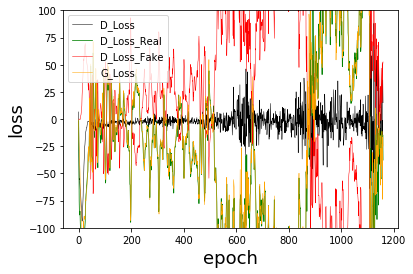

In [13]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-100, 100)
plt.legend()
plt.show()

In [12]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
)

0 (5, 1) [D loss: (8.9632)(R -0.0996, F -0.0005, G 0.9063)] [G loss: -0.0136]
1 (5, 1) [D loss: (8.7713)(R -0.2295, F -0.0021, G 0.9003)] [G loss: -0.0328]
2 (5, 1) [D loss: (8.4407)(R -0.4510, F -0.0032, G 0.8895)] [G loss: -0.0573]
3 (5, 1) [D loss: (7.8783)(R -0.8313, F -0.0032, G 0.8713)] [G loss: -0.1148]
4 (5, 1) [D loss: (6.8045)(R -1.5560, F -0.0025, G 0.8363)] [G loss: -0.2238]
5 (5, 1) [D loss: (4.7131)(R -2.9330, F 0.0053, G 0.7641)] [G loss: -0.4357]
6 (5, 1) [D loss: (1.2587)(R -5.2087, F 0.0187, G 0.6449)] [G loss: -0.8880]
7 (5, 1) [D loss: (-4.6702)(R -9.3259, F 0.0194, G 0.4636)] [G loss: -1.7742]
8 (5, 1) [D loss: (-12.9915)(R -15.4043, F 0.0184, G 0.2394)] [G loss: -3.3896]
9 (5, 1) [D loss: (-22.5948)(R -23.1334, F -0.0845, G 0.0623)] [G loss: -5.8812]
10 (5, 1) [D loss: (-33.7989)(R -33.5714, F -0.4201, G 0.0193)] [G loss: -9.4881]
11 (5, 1) [D loss: (-45.1765)(R -47.3153, F -0.6548, G 0.2794)] [G loss: -13.9784]
12 (5, 1) [D loss: (-54.1901)(R -60.8503, F -1.3805,

95 (5, 1) [D loss: (-29.1491)(R -53.0315, F 14.8320, G 0.9050)] [G loss: -17.4698]
96 (5, 1) [D loss: (-29.0652)(R -54.4606, F 16.0239, G 0.9371)] [G loss: -17.0825]
97 (5, 1) [D loss: (-26.0105)(R -52.6922, F 17.1303, G 0.9551)] [G loss: -18.2838]
98 (5, 1) [D loss: (-28.9561)(R -54.7934, F 17.0441, G 0.8793)] [G loss: -18.6498]
99 (5, 1) [D loss: (-27.5328)(R -53.1274, F 16.9952, G 0.8599)] [G loss: -17.5598]
100 (5, 1) [D loss: (-27.9242)(R -54.3859, F 17.6867, G 0.8775)] [G loss: -19.6048]
101 (5, 1) [D loss: (-28.2887)(R -55.6549, F 18.2539, G 0.9112)] [G loss: -19.7689]
102 (5, 1) [D loss: (-27.8270)(R -54.5382, F 18.1889, G 0.8522)] [G loss: -19.6700]
103 (5, 1) [D loss: (-27.6683)(R -54.3544, F 18.3931, G 0.8293)] [G loss: -19.6868]
104 (5, 1) [D loss: (-26.6069)(R -54.5423, F 19.3938, G 0.8542)] [G loss: -20.1937]
105 (5, 1) [D loss: (-26.4088)(R -55.2456, F 20.0867, G 0.8750)] [G loss: -21.2689]
106 (5, 1) [D loss: (-26.4194)(R -54.3740, F 19.7851, G 0.8170)] [G loss: -21.115

193 (5, 1) [D loss: (-11.4569)(R -52.7712, F 38.8948, G 0.2419)] [G loss: -39.3556]
194 (5, 1) [D loss: (-10.4568)(R -53.1873, F 40.3375, G 0.2393)] [G loss: -40.6165]
195 (5, 1) [D loss: (-10.4141)(R -53.8537, F 40.7826, G 0.2657)] [G loss: -40.5048]
196 (5, 1) [D loss: (-11.0105)(R -54.2171, F 40.6567, G 0.2550)] [G loss: -40.8638]
197 (5, 1) [D loss: (-10.4895)(R -52.8650, F 40.0061, G 0.2369)] [G loss: -40.3108]
198 (5, 1) [D loss: (-11.1665)(R -53.5883, F 39.9649, G 0.2457)] [G loss: -40.3668]
199 (5, 1) [D loss: (-11.1453)(R -53.2062, F 39.7702, G 0.2291)] [G loss: -40.2369]
200 (5, 1) [D loss: (-10.5713)(R -54.2127, F 41.1311, G 0.2510)] [G loss: -41.2212]
201 (5, 1) [D loss: (-10.2684)(R -53.1248, F 40.6477, G 0.2209)] [G loss: -39.8872]
202 (5, 1) [D loss: (-10.0204)(R -54.0569, F 41.6004, G 0.2436)] [G loss: -40.6033]
203 (5, 1) [D loss: (-11.0335)(R -53.2343, F 40.0428, G 0.2158)] [G loss: -40.5436]
204 (5, 1) [D loss: (-11.2109)(R -53.1680, F 39.9824, G 0.1975)] [G loss: -4

292 (5, 1) [D loss: (-4.1585)(R -43.6314, F 39.0475, G 0.0425)] [G loss: -39.3300]
293 (5, 1) [D loss: (-5.1413)(R -42.8898, F 37.3902, G 0.0358)] [G loss: -38.4410]
294 (5, 1) [D loss: (-4.2963)(R -43.6642, F 38.9214, G 0.0447)] [G loss: -38.7658]
295 (5, 1) [D loss: (-3.7902)(R -42.7035, F 38.4943, G 0.0419)] [G loss: -38.5418]
296 (5, 1) [D loss: (-3.5076)(R -42.3441, F 38.4443, G 0.0392)] [G loss: -38.1353]
297 (5, 1) [D loss: (-4.2432)(R -41.7409, F 37.1840, G 0.0314)] [G loss: -38.1802]
298 (5, 1) [D loss: (-3.9847)(R -42.2939, F 37.9977, G 0.0312)] [G loss: -37.7545]
299 (5, 1) [D loss: (-4.2212)(R -42.4586, F 37.8777, G 0.0360)] [G loss: -37.9625]
300 (5, 1) [D loss: (-3.8107)(R -42.1822, F 38.0241, G 0.0347)] [G loss: -37.9111]
301 (5, 1) [D loss: (-4.2034)(R -42.4974, F 37.9498, G 0.0344)] [G loss: -37.9442]
302 (5, 1) [D loss: (-3.8268)(R -41.9426, F 37.7843, G 0.0332)] [G loss: -38.0220]
303 (5, 1) [D loss: (-4.5548)(R -43.2245, F 38.2759, G 0.0394)] [G loss: -38.8637]
304 

391 (5, 1) [D loss: (-1.3636)(R -21.6932, F 20.2728, G 0.0057)] [G loss: -20.3466]
392 (5, 1) [D loss: (-1.5521)(R -21.4803, F 19.8930, G 0.0035)] [G loss: -20.1585]
393 (5, 1) [D loss: (-1.4750)(R -21.8011, F 20.2896, G 0.0036)] [G loss: -19.9815]
394 (5, 1) [D loss: (-1.5255)(R -18.9690, F 17.4165, G 0.0027)] [G loss: -17.0470]
395 (5, 1) [D loss: (-0.9844)(R -16.8675, F 15.8670, G 0.0016)] [G loss: -15.1087]
396 (5, 1) [D loss: (-0.8752)(R -11.5867, F 10.6994, G 0.0012)] [G loss: -9.3285]
397 (5, 1) [D loss: (-0.7661)(R -6.2107, F 5.4360, G 0.0009)] [G loss: -3.9203]
398 (5, 1) [D loss: (-2.0876)(R -2.0964, F 0.0019, G 0.0007)] [G loss: 0.6106]
399 (5, 1) [D loss: (-2.3150)(R 1.1044, F -3.4430, G 0.0024)] [G loss: 3.7264]
400 (5, 1) [D loss: (-1.5569)(R 1.5503, F -3.1713, G 0.0064)] [G loss: 2.9985]
401 (5, 1) [D loss: (-1.7310)(R -3.1911, F 1.3713, G 0.0089)] [G loss: -3.8759]
402 (5, 1) [D loss: (-2.7487)(R -14.2130, F 11.3240, G 0.0140)] [G loss: -13.3201]
403 (5, 1) [D loss: (-1

491 (5, 1) [D loss: (-1.5186)(R -7.4935, F 5.9621, G 0.0013)] [G loss: -5.9668]
492 (5, 1) [D loss: (-1.5432)(R -7.8915, F 6.3326, G 0.0016)] [G loss: -6.6357]
493 (5, 1) [D loss: (-0.9612)(R -7.5052, F 6.5269, G 0.0017)] [G loss: -6.8038]
494 (5, 1) [D loss: (-1.4640)(R -8.7757, F 7.2904, G 0.0021)] [G loss: -8.1562]
495 (5, 1) [D loss: (-1.2065)(R -11.7240, F 10.4758, G 0.0042)] [G loss: -11.2538]
496 (5, 1) [D loss: (-1.3244)(R -14.8958, F 13.5228, G 0.0049)] [G loss: -14.5916]
497 (5, 1) [D loss: (-1.3260)(R -19.1063, F 17.6984, G 0.0082)] [G loss: -18.7833]
498 (5, 1) [D loss: (-1.2576)(R -22.8751, F 21.4922, G 0.0125)] [G loss: -22.3107]
499 (5, 1) [D loss: (-1.4791)(R -25.1015, F 23.4804, G 0.0142)] [G loss: -24.8974]
500 (5, 1) [D loss: (-1.5734)(R -26.6097, F 24.8932, G 0.0143)] [G loss: -26.0194]
501 (5, 1) [D loss: (-2.0336)(R -28.0622, F 25.8785, G 0.0150)] [G loss: -27.4923]
502 (5, 1) [D loss: (-1.7729)(R -28.5864, F 26.6350, G 0.0179)] [G loss: -27.4455]
503 (5, 1) [D lo

592 (5, 1) [D loss: (-5.6786)(R -3.4491, F -2.9841, G 0.0755)] [G loss: 3.4222]
593 (5, 1) [D loss: (-3.7035)(R -5.1391, F 1.0087, G 0.0427)] [G loss: -1.7856]
594 (5, 1) [D loss: (-2.3457)(R -8.2205, F 5.6511, G 0.0224)] [G loss: -7.3253]
595 (5, 1) [D loss: (-2.0083)(R -16.2289, F 14.0175, G 0.0203)] [G loss: -16.0155]
596 (5, 1) [D loss: (-2.5024)(R -23.5166, F 20.6954, G 0.0319)] [G loss: -22.8011]
597 (5, 1) [D loss: (-3.0984)(R -27.2946, F 23.8727, G 0.0323)] [G loss: -26.3258]
598 (5, 1) [D loss: (-2.2370)(R -29.2836, F 26.7211, G 0.0326)] [G loss: -27.3693]
599 (5, 1) [D loss: (-1.6485)(R -27.9405, F 26.1341, G 0.0158)] [G loss: -26.7825]
600 (5, 1) [D loss: (-1.3684)(R -25.9917, F 24.5542, G 0.0069)] [G loss: -24.5000]
601 (5, 1) [D loss: (-0.8853)(R -22.7038, F 21.7966, G 0.0022)] [G loss: -22.0312]
602 (5, 1) [D loss: (-0.7558)(R -20.4123, F 19.6447, G 0.0012)] [G loss: -19.8732]
603 (5, 1) [D loss: (-0.7626)(R -18.5611, F 17.7861, G 0.0012)] [G loss: -17.6442]
604 (5, 1) [D

693 (5, 1) [D loss: (-1.0274)(R -3.3497, F 2.3046, G 0.0018)] [G loss: -2.7606]
694 (5, 1) [D loss: (-1.2780)(R -6.2731, F 4.9705, G 0.0025)] [G loss: -5.9205]
695 (5, 1) [D loss: (-1.6835)(R -9.7730, F 8.0661, G 0.0023)] [G loss: -9.5195]
696 (5, 1) [D loss: (-1.3802)(R -12.1302, F 10.7144, G 0.0036)] [G loss: -11.8612]
697 (5, 1) [D loss: (-1.3679)(R -13.0231, F 11.6126, G 0.0043)] [G loss: -11.1950]
698 (5, 1) [D loss: (-1.9757)(R -12.7748, F 10.7601, G 0.0039)] [G loss: -10.8575]
699 (5, 1) [D loss: (-2.5454)(R -10.7719, F 8.1889, G 0.0038)] [G loss: -7.5024]
700 (5, 1) [D loss: (-3.1079)(R -7.1246, F 3.9662, G 0.0051)] [G loss: -3.5903]
701 (5, 1) [D loss: (-3.6950)(R -3.6840, F -0.1078, G 0.0097)] [G loss: 0.2085]
702 (5, 1) [D loss: (-3.8417)(R -0.1992, F -3.8172, G 0.0175)] [G loss: 4.2912]
703 (5, 1) [D loss: (-3.8145)(R 2.9354, F -7.0150, G 0.0265)] [G loss: 7.2513]
704 (5, 1) [D loss: (-2.8272)(R 4.3395, F -7.4686, G 0.0302)] [G loss: 7.9898]
705 (5, 1) [D loss: (-3.1497)(R 

794 (5, 1) [D loss: (-1.9151)(R 7.9759, F -9.9953, G 0.0104)] [G loss: 8.4327]
795 (5, 1) [D loss: (-2.3706)(R 1.1502, F -3.6205, G 0.0100)] [G loss: 2.2768]
796 (5, 1) [D loss: (-2.3702)(R -2.0684, F -0.4193, G 0.0117)] [G loss: -0.0363]
797 (5, 1) [D loss: (-2.4103)(R -3.9630, F 1.4121, G 0.0141)] [G loss: -1.2968]
798 (5, 1) [D loss: (-1.5944)(R -2.4348, F 0.7232, G 0.0117)] [G loss: -0.3828]
799 (5, 1) [D loss: (-2.1544)(R 0.0921, F -2.3512, G 0.0105)] [G loss: 2.3170]
800 (5, 1) [D loss: (-2.4043)(R 2.6931, F -5.1883, G 0.0091)] [G loss: 4.7490]
801 (5, 1) [D loss: (-2.3230)(R 5.3770, F -7.7925, G 0.0093)] [G loss: 7.9341]
802 (5, 1) [D loss: (-1.6062)(R 7.3518, F -9.0502, G 0.0092)] [G loss: 9.1275]
803 (5, 1) [D loss: (-1.4252)(R 7.6945, F -9.1999, G 0.0080)] [G loss: 9.0344]
804 (5, 1) [D loss: (-1.6736)(R 5.7860, F -7.5187, G 0.0059)] [G loss: 7.1625]
805 (5, 1) [D loss: (-0.9417)(R 3.4704, F -4.4512, G 0.0039)] [G loss: 3.9513]
806 (5, 1) [D loss: (-0.9476)(R -1.0435, F 0.072

895 (5, 1) [D loss: (-1.9031)(R -2.0942, F 0.0922, G 0.0099)] [G loss: 0.1079]
896 (5, 1) [D loss: (-2.0384)(R -2.0190, F -0.1178, G 0.0098)] [G loss: 0.3311]
897 (5, 1) [D loss: (-1.8979)(R 2.0018, F -3.9895, G 0.0090)] [G loss: 3.7706]
898 (5, 1) [D loss: (-1.0764)(R 3.4815, F -4.6413, G 0.0083)] [G loss: 4.6846]
899 (5, 1) [D loss: (-1.1604)(R 1.8237, F -3.0427, G 0.0059)] [G loss: 2.9552]
900 (5, 1) [D loss: (-1.6171)(R -0.9962, F -0.6681, G 0.0047)] [G loss: 0.1553]
901 (5, 1) [D loss: (-1.6812)(R -7.2395, F 5.5068, G 0.0051)] [G loss: -7.3852]
902 (5, 1) [D loss: (-2.7850)(R -16.7393, F 13.7959, G 0.0158)] [G loss: -15.7304]
903 (5, 1) [D loss: (-3.7646)(R -21.7767, F 17.7280, G 0.0284)] [G loss: -18.6725]
904 (5, 1) [D loss: (-3.3061)(R -20.7928, F 17.2391, G 0.0248)] [G loss: -16.6028]
905 (5, 1) [D loss: (-2.1646)(R -15.1300, F 12.8161, G 0.0149)] [G loss: -12.0316]
906 (5, 1) [D loss: (-2.3214)(R -11.4453, F 9.0043, G 0.0120)] [G loss: -8.5765]
907 (5, 1) [D loss: (-2.2098)(R

997 (5, 1) [D loss: (-2.0913)(R -13.2726, F 10.9866, G 0.0195)] [G loss: -11.7274]
998 (5, 1) [D loss: (-2.1751)(R -11.7254, F 9.3817, G 0.0169)] [G loss: -8.6178]
999 (5, 1) [D loss: (-2.3480)(R -7.5142, F 5.0754, G 0.0091)] [G loss: -4.0103]
1000 (5, 1) [D loss: (-2.0241)(R -1.5318, F -0.5578, G 0.0066)] [G loss: 1.5703]
1001 (5, 1) [D loss: (-2.4161)(R 4.2771, F -6.7852, G 0.0092)] [G loss: 7.6424]
1002 (5, 1) [D loss: (-2.5426)(R 8.1556, F -10.8388, G 0.0141)] [G loss: 11.2760]
1003 (5, 1) [D loss: (-1.4261)(R 7.7660, F -9.3316, G 0.0140)] [G loss: 9.2929]
1004 (5, 1) [D loss: (-2.0338)(R -0.4470, F -1.6778, G 0.0091)] [G loss: 0.1949]
1005 (5, 1) [D loss: (-2.5899)(R -9.5765, F 6.8155, G 0.0171)] [G loss: -9.4933]
1006 (5, 1) [D loss: (-2.1403)(R -15.2446, F 12.8163, G 0.0288)] [G loss: -13.0656]
1007 (5, 1) [D loss: (-1.6202)(R -10.3464, F 8.5875, G 0.0139)] [G loss: -7.8858]
1008 (5, 1) [D loss: (-1.8637)(R -3.7939, F 1.8721, G 0.0058)] [G loss: -0.6272]
1009 (5, 1) [D loss: (-2

1098 (5, 1) [D loss: (-1.8742)(R 2.1250, F -4.0732, G 0.0074)] [G loss: 5.7741]
1099 (5, 1) [D loss: (-2.4105)(R 9.0259, F -11.5709, G 0.0134)] [G loss: 12.5544]
1100 (5, 1) [D loss: (-2.1798)(R 12.8784, F -15.2379, G 0.0180)] [G loss: 14.7836]
1101 (5, 1) [D loss: (-1.6009)(R 7.7633, F -9.5084, G 0.0144)] [G loss: 8.8267]
1102 (5, 1) [D loss: (-1.6486)(R -0.4310, F -1.3235, G 0.0106)] [G loss: 0.3944]
1103 (5, 1) [D loss: (-2.1159)(R -8.4504, F 6.1656, G 0.0169)] [G loss: -7.6899]
1104 (5, 1) [D loss: (-1.9531)(R -11.9022, F 9.7366, G 0.0213)] [G loss: -8.9547]
1105 (5, 1) [D loss: (-1.2550)(R -5.2373, F 3.8916, G 0.0091)] [G loss: -2.6400]
1106 (5, 1) [D loss: (-1.4437)(R 2.9511, F -4.4551, G 0.0060)] [G loss: 6.3112]
1107 (5, 1) [D loss: (-2.1436)(R 12.9127, F -15.1468, G 0.0091)] [G loss: 15.7960]
1108 (5, 1) [D loss: (-1.7063)(R 18.7810, F -20.6501, G 0.0163)] [G loss: 21.0878]
1109 (5, 1) [D loss: (-2.2597)(R 18.7782, F -21.1925, G 0.0155)] [G loss: 20.3051]
1110 (5, 1) [D loss: 

1199 (5, 1) [D loss: (-2.3080)(R 7.2883, F -9.7619, G 0.0166)] [G loss: 10.4066]
1200 (5, 1) [D loss: (-1.4240)(R 10.9573, F -12.5538, G 0.0172)] [G loss: 13.2955]
1201 (5, 1) [D loss: (-2.2130)(R 11.6076, F -13.9503, G 0.0130)] [G loss: 14.1805]
1202 (5, 1) [D loss: (-1.2677)(R 12.3612, F -13.7548, G 0.0126)] [G loss: 13.8245]
1203 (5, 1) [D loss: (-2.1898)(R 9.8975, F -12.1929, G 0.0106)] [G loss: 11.3384]
1204 (5, 1) [D loss: (-1.5459)(R 7.7040, F -9.3471, G 0.0097)] [G loss: 9.8981]
1205 (5, 1) [D loss: (-2.3328)(R 4.6983, F -7.1669, G 0.0136)] [G loss: 7.2574]
1206 (5, 1) [D loss: (-2.5419)(R 2.0500, F -4.7491, G 0.0157)] [G loss: 3.9480]
1207 (5, 1) [D loss: (-1.6990)(R 1.8387, F -3.6852, G 0.0147)] [G loss: 4.2151]
1208 (5, 1) [D loss: (-1.7311)(R 2.0269, F -3.9131, G 0.0155)] [G loss: 4.6200]
1209 (5, 1) [D loss: (-2.1212)(R 3.6938, F -5.9510, G 0.0136)] [G loss: 6.0724]
1210 (5, 1) [D loss: (-1.5369)(R 6.1145, F -7.7899, G 0.0138)] [G loss: 7.9857]
1211 (5, 1) [D loss: (-1.137

1300 (5, 1) [D loss: (-1.1414)(R -12.0283, F 10.7454, G 0.0142)] [G loss: -10.5196]
1301 (5, 1) [D loss: (-1.6805)(R -8.9634, F 7.1769, G 0.0106)] [G loss: -6.5269]
1302 (5, 1) [D loss: (-1.6803)(R -4.9275, F 3.1633, G 0.0084)] [G loss: -2.9148]
1303 (5, 1) [D loss: (-1.3263)(R -0.4412, F -0.9900, G 0.0105)] [G loss: 1.7154]
1304 (5, 1) [D loss: (-1.9953)(R 0.1682, F -2.2948, G 0.0131)] [G loss: 1.7419]
1305 (5, 1) [D loss: (-1.6583)(R -1.7882, F 0.0196, G 0.0110)] [G loss: -0.0628]
1306 (5, 1) [D loss: (-2.5613)(R -6.0291, F 3.3423, G 0.0125)] [G loss: -4.6769]
1307 (5, 1) [D loss: (-1.9333)(R -12.2700, F 10.1233, G 0.0213)] [G loss: -11.2947]
1308 (5, 1) [D loss: (-1.1373)(R -14.7007, F 13.3352, G 0.0228)] [G loss: -13.0517]
1309 (5, 1) [D loss: (-1.4742)(R -12.8144, F 11.1773, G 0.0163)] [G loss: -10.7679]
1310 (5, 1) [D loss: (-1.3839)(R -9.0703, F 7.5861, G 0.0100)] [G loss: -6.7468]
1311 (5, 1) [D loss: (-2.0236)(R -2.8486, F 0.7411, G 0.0084)] [G loss: 0.4453]
1312 (5, 1) [D los

1401 (5, 1) [D loss: (-0.9968)(R -0.9952, F -0.1003, G 0.0099)] [G loss: 0.7146]
1402 (5, 1) [D loss: (-1.8285)(R 0.7317, F -2.6965, G 0.0136)] [G loss: 2.7664]
1403 (5, 1) [D loss: (-2.0892)(R 2.3141, F -4.5326, G 0.0129)] [G loss: 4.6431]
1404 (5, 1) [D loss: (-1.5272)(R 4.2862, F -5.9542, G 0.0141)] [G loss: 5.8918]
1405 (5, 1) [D loss: (-1.5088)(R 4.6019, F -6.2367, G 0.0126)] [G loss: 6.0384]
1406 (5, 1) [D loss: (-1.6395)(R 2.4163, F -4.1916, G 0.0136)] [G loss: 3.1466]
1407 (5, 1) [D loss: (-1.0379)(R -1.4383, F 0.2658, G 0.0135)] [G loss: -0.6596]
1408 (5, 1) [D loss: (-1.8456)(R -5.5498, F 3.5526, G 0.0152)] [G loss: -4.5310]
1409 (5, 1) [D loss: (-2.1087)(R -8.7778, F 6.5211, G 0.0148)] [G loss: -7.4539]
1410 (5, 1) [D loss: (-1.5582)(R -9.5124, F 7.8034, G 0.0151)] [G loss: -7.3350]
1411 (5, 1) [D loss: (-1.3027)(R -9.2616, F 7.8163, G 0.0143)] [G loss: -7.9963]
1412 (5, 1) [D loss: (-2.0279)(R -7.6667, F 5.5191, G 0.0120)] [G loss: -5.4464]
1413 (5, 1) [D loss: (-2.0351)(R 

1503 (5, 1) [D loss: (-1.9227)(R 8.2780, F -10.3294, G 0.0129)] [G loss: 10.5366]
1504 (5, 1) [D loss: (-2.0045)(R 10.2419, F -12.4140, G 0.0168)] [G loss: 12.3128]
1505 (5, 1) [D loss: (-1.4532)(R 9.8351, F -11.4362, G 0.0148)] [G loss: 11.0624]
1506 (5, 1) [D loss: (-1.5706)(R 8.7209, F -10.4517, G 0.0160)] [G loss: 10.1340]
1507 (5, 1) [D loss: (-1.8127)(R 5.7921, F -7.6972, G 0.0092)] [G loss: 6.3082]
1508 (5, 1) [D loss: (-1.2678)(R 1.4590, F -2.7973, G 0.0071)] [G loss: 2.2439]
1509 (5, 1) [D loss: (-1.6906)(R -2.8957, F 1.0923, G 0.0113)] [G loss: -1.4188]
1510 (5, 1) [D loss: (-1.7659)(R -4.1641, F 2.2895, G 0.0109)] [G loss: -2.9347]
1511 (5, 1) [D loss: (-1.6213)(R -5.1620, F 3.4246, G 0.0116)] [G loss: -2.5521]
1512 (5, 1) [D loss: (-1.6433)(R -3.4069, F 1.6354, G 0.0128)] [G loss: -1.4972]
1513 (5, 1) [D loss: (-2.1286)(R -0.6524, F -1.5908, G 0.0115)] [G loss: 0.9868]
1514 (5, 1) [D loss: (-2.0100)(R -0.6986, F -1.4515, G 0.0140)] [G loss: 1.7393]
1515 (5, 1) [D loss: (-1.

1605 (5, 1) [D loss: (-1.2586)(R 5.7368, F -7.1455, G 0.0150)] [G loss: 7.6264]
1606 (5, 1) [D loss: (-2.4812)(R 7.0634, F -9.6836, G 0.0139)] [G loss: 9.6900]
1607 (5, 1) [D loss: (-1.9697)(R 7.3368, F -9.4465, G 0.0140)] [G loss: 9.5548]
1608 (5, 1) [D loss: (-2.3979)(R 6.6127, F -9.1868, G 0.0176)] [G loss: 8.4467]
1609 (5, 1) [D loss: (-1.7574)(R 4.0600, F -5.9834, G 0.0166)] [G loss: 5.4082]
1610 (5, 1) [D loss: (-1.7661)(R 2.6855, F -4.5774, G 0.0126)] [G loss: 4.4067]
1611 (5, 1) [D loss: (-1.6837)(R 2.5023, F -4.2997, G 0.0114)] [G loss: 3.7947]
1612 (5, 1) [D loss: (-1.9285)(R 0.8851, F -2.9245, G 0.0111)] [G loss: 3.5635]
1613 (5, 1) [D loss: (-2.2072)(R 1.1111, F -3.4302, G 0.0112)] [G loss: 3.8910]
1614 (5, 1) [D loss: (-1.7074)(R 1.3900, F -3.2144, G 0.0117)] [G loss: 3.2637]
1615 (5, 1) [D loss: (-2.6054)(R 0.6289, F -3.3700, G 0.0136)] [G loss: 3.4711]
1616 (5, 1) [D loss: (-1.8477)(R 1.9903, F -3.9675, G 0.0130)] [G loss: 4.7092]
1617 (5, 1) [D loss: (-1.9602)(R 3.4624,

1707 (5, 1) [D loss: (-1.4811)(R 0.7273, F -2.3469, G 0.0138)] [G loss: 2.0813]
1708 (5, 1) [D loss: (-1.1266)(R -1.3715, F 0.1286, G 0.0116)] [G loss: -0.0506]
1709 (5, 1) [D loss: (-1.4351)(R -3.8526, F 2.2951, G 0.0122)] [G loss: -2.5067]
1710 (5, 1) [D loss: (-1.7544)(R -4.2589, F 2.3691, G 0.0135)] [G loss: -2.3508]
1711 (5, 1) [D loss: (-2.0150)(R -3.7123, F 1.5572, G 0.0140)] [G loss: -1.6416]
1712 (5, 1) [D loss: (-2.2372)(R -2.1942, F -0.1761, G 0.0133)] [G loss: 0.6801]
1713 (5, 1) [D loss: (-2.2464)(R 0.1442, F -2.5425, G 0.0152)] [G loss: 2.3431]
1714 (5, 1) [D loss: (-1.8136)(R 1.2970, F -3.2859, G 0.0175)] [G loss: 3.1798]
1715 (5, 1) [D loss: (-1.2426)(R 3.2493, F -4.6243, G 0.0132)] [G loss: 4.4467]
1716 (5, 1) [D loss: (-2.0077)(R 2.9285, F -5.0937, G 0.0157)] [G loss: 4.7069]
1717 (5, 1) [D loss: (-1.6056)(R 2.7960, F -4.5554, G 0.0154)] [G loss: 4.6852]
1718 (5, 1) [D loss: (-1.6634)(R 2.5880, F -4.4544, G 0.0203)] [G loss: 4.3694]
1719 (5, 1) [D loss: (-1.4480)(R 1.

1809 (5, 1) [D loss: (-1.4634)(R -4.6558, F 3.1004, G 0.0092)] [G loss: -3.1032]
1810 (5, 1) [D loss: (-2.3696)(R -5.2827, F 2.7845, G 0.0129)] [G loss: -3.0689]
1811 (5, 1) [D loss: (-1.5219)(R -3.6949, F 2.0454, G 0.0128)] [G loss: -1.5825]
1812 (5, 1) [D loss: (-2.2178)(R -2.1267, F -0.2176, G 0.0127)] [G loss: 0.2493]
1813 (5, 1) [D loss: (-1.9745)(R -1.7605, F -0.3481, G 0.0134)] [G loss: 0.7631]
1814 (5, 1) [D loss: (-1.4276)(R -1.1739, F -0.3922, G 0.0139)] [G loss: 1.1393]
1815 (5, 1) [D loss: (-1.8163)(R 0.1692, F -2.1272, G 0.0142)] [G loss: 2.8076]
1816 (5, 1) [D loss: (-2.1472)(R 3.1855, F -5.4645, G 0.0132)] [G loss: 5.4331]
1817 (5, 1) [D loss: (-2.1766)(R 5.3506, F -7.7126, G 0.0185)] [G loss: 8.0648]
1818 (5, 1) [D loss: (-1.9892)(R 7.3280, F -9.4978, G 0.0181)] [G loss: 9.8101]
1819 (5, 1) [D loss: (-2.4395)(R 7.3562, F -9.9763, G 0.0181)] [G loss: 10.3070]
1820 (5, 1) [D loss: (-2.1336)(R 7.6219, F -9.9207, G 0.0165)] [G loss: 9.3860]
1821 (5, 1) [D loss: (-1.6427)(R 

1910 (5, 1) [D loss: (-1.1014)(R -9.3505, F 8.1434, G 0.0106)] [G loss: -7.9507]
1911 (5, 1) [D loss: (-1.4077)(R -8.0654, F 6.5626, G 0.0095)] [G loss: -5.9491]
1912 (5, 1) [D loss: (-1.9511)(R -6.5486, F 4.5075, G 0.0090)] [G loss: -4.3622]
1913 (5, 1) [D loss: (-1.9216)(R -4.3743, F 2.3423, G 0.0110)] [G loss: -2.0498]
1914 (5, 1) [D loss: (-1.4622)(R -2.7682, F 1.1902, G 0.0116)] [G loss: -0.4860]
1915 (5, 1) [D loss: (-2.0230)(R -2.5174, F 0.3602, G 0.0134)] [G loss: -0.6761]
1916 (5, 1) [D loss: (-1.9603)(R -1.9038, F -0.1896, G 0.0133)] [G loss: 0.4648]
1917 (5, 1) [D loss: (-1.3521)(R 0.0254, F -1.4829, G 0.0105)] [G loss: 1.4261]
1918 (5, 1) [D loss: (-2.1800)(R -2.5525, F 0.2290, G 0.0143)] [G loss: -0.4397]
1919 (5, 1) [D loss: (-1.9815)(R -4.3264, F 2.2006, G 0.0144)] [G loss: -2.3646]
1920 (5, 1) [D loss: (-1.9699)(R -5.9484, F 3.8163, G 0.0162)] [G loss: -4.3153]
1921 (5, 1) [D loss: (-2.0288)(R -6.0663, F 3.9204, G 0.0117)] [G loss: -4.0937]
1922 (5, 1) [D loss: (-1.6955

2012 (5, 1) [D loss: (-1.6217)(R -10.5995, F 8.8374, G 0.0140)] [G loss: -8.8319]
2013 (5, 1) [D loss: (-1.7652)(R -9.8142, F 7.9440, G 0.0105)] [G loss: -8.0476]
2014 (5, 1) [D loss: (-1.5162)(R -8.9362, F 7.3210, G 0.0099)] [G loss: -6.6440]
2015 (5, 1) [D loss: (-1.6394)(R -5.9953, F 4.2394, G 0.0117)] [G loss: -3.4488]
2016 (5, 1) [D loss: (-1.8808)(R -3.0520, F 1.0531, G 0.0118)] [G loss: -0.8273]
2017 (5, 1) [D loss: (-1.9540)(R -1.7984, F -0.2598, G 0.0104)] [G loss: 0.5009]
2018 (5, 1) [D loss: (-1.8033)(R -1.2142, F -0.7326, G 0.0144)] [G loss: 0.7885]
2019 (5, 1) [D loss: (-1.8731)(R -2.7363, F 0.7243, G 0.0139)] [G loss: -0.9559]
2020 (5, 1) [D loss: (-1.6950)(R -4.4017, F 2.5771, G 0.0130)] [G loss: -2.8668]
2021 (5, 1) [D loss: (-1.7425)(R -6.1002, F 4.2062, G 0.0152)] [G loss: -4.5803]
2022 (5, 1) [D loss: (-1.8814)(R -6.3704, F 4.3714, G 0.0118)] [G loss: -4.7510]
2023 (5, 1) [D loss: (-1.8201)(R -6.1176, F 4.1843, G 0.0113)] [G loss: -3.9977]
2024 (5, 1) [D loss: (-2.05

2114 (5, 1) [D loss: (-1.6869)(R -5.1486, F 3.3610, G 0.0101)] [G loss: -2.8282]
2115 (5, 1) [D loss: (-1.5366)(R -3.2818, F 1.6392, G 0.0106)] [G loss: -1.2159]
2116 (5, 1) [D loss: (-1.5645)(R -1.8980, F 0.2170, G 0.0116)] [G loss: -0.0822]
2117 (5, 1) [D loss: (-1.7405)(R -1.0452, F -0.8088, G 0.0114)] [G loss: 0.7058]
2118 (5, 1) [D loss: (-1.7114)(R -1.5783, F -0.2753, G 0.0142)] [G loss: 0.0760]
2119 (5, 1) [D loss: (-1.8043)(R -1.7055, F -0.2177, G 0.0119)] [G loss: 0.0607]
2120 (5, 1) [D loss: (-1.6018)(R -2.2667, F 0.5176, G 0.0147)] [G loss: -0.4003]
2121 (5, 1) [D loss: (-1.4158)(R -3.7364, F 2.2091, G 0.0111)] [G loss: -2.5865]
2122 (5, 1) [D loss: (-1.6639)(R -4.5210, F 2.7276, G 0.0129)] [G loss: -2.4570]
2123 (5, 1) [D loss: (-1.4228)(R -4.1157, F 2.5714, G 0.0122)] [G loss: -2.2153]
2124 (5, 1) [D loss: (-1.8346)(R -2.7575, F 0.8078, G 0.0115)] [G loss: -0.3202]
2125 (5, 1) [D loss: (-1.8086)(R -1.5915, F -0.3421, G 0.0125)] [G loss: 0.8581]
2126 (5, 1) [D loss: (-1.405

2216 (5, 1) [D loss: (-1.8693)(R -2.3582, F 0.3563, G 0.0133)] [G loss: -0.6461]
2217 (5, 1) [D loss: (-1.8326)(R -3.8153, F 1.8695, G 0.0113)] [G loss: -2.3675]
2218 (5, 1) [D loss: (-1.4339)(R -5.7555, F 4.2130, G 0.0109)] [G loss: -4.4288]
2219 (5, 1) [D loss: (-1.2502)(R -5.7112, F 4.3474, G 0.0114)] [G loss: -4.2685]
2220 (5, 1) [D loss: (-1.8337)(R -5.4360, F 3.5003, G 0.0102)] [G loss: -3.4223]
2221 (5, 1) [D loss: (-1.5780)(R -4.0163, F 2.3001, G 0.0138)] [G loss: -1.9256]
2222 (5, 1) [D loss: (-1.7371)(R -2.2943, F 0.4351, G 0.0122)] [G loss: -0.2396]
2223 (5, 1) [D loss: (-2.0771)(R -0.8725, F -1.3297, G 0.0125)] [G loss: 1.9579]
2224 (5, 1) [D loss: (-1.1857)(R 1.2624, F -2.5900, G 0.0142)] [G loss: 2.6325]
2225 (5, 1) [D loss: (-1.5939)(R -0.5820, F -1.1252, G 0.0113)] [G loss: 0.7211]
2226 (5, 1) [D loss: (-1.8575)(R -3.4930, F 1.5561, G 0.0079)] [G loss: -2.2350]
2227 (5, 1) [D loss: (-1.6207)(R -5.7808, F 4.0473, G 0.0113)] [G loss: -3.9354]
2228 (5, 1) [D loss: (-1.6387

2318 (5, 1) [D loss: (-1.6761)(R 0.1607, F -1.9717, G 0.0135)] [G loss: 2.1562]
2319 (5, 1) [D loss: (-1.7085)(R -0.7965, F -1.0049, G 0.0093)] [G loss: 0.3305]
2320 (5, 1) [D loss: (-1.4801)(R -5.2725, F 3.6769, G 0.0115)] [G loss: -4.3533]
2321 (5, 1) [D loss: (-1.6641)(R -9.1557, F 7.3650, G 0.0127)] [G loss: -7.5319]
2322 (5, 1) [D loss: (-1.7704)(R -10.7226, F 8.8062, G 0.0146)] [G loss: -9.2510]
2323 (5, 1) [D loss: (-1.6633)(R -10.4985, F 8.7189, G 0.0116)] [G loss: -8.4002]
2324 (5, 1) [D loss: (-1.6758)(R -8.5721, F 6.8018, G 0.0094)] [G loss: -6.3964]
2325 (5, 1) [D loss: (-1.7583)(R -6.2330, F 4.3608, G 0.0114)] [G loss: -3.8731]
2326 (5, 1) [D loss: (-1.8237)(R -4.8140, F 2.8618, G 0.0128)] [G loss: -2.3323]
2327 (5, 1) [D loss: (-1.8553)(R -2.8307, F 0.8542, G 0.0121)] [G loss: -0.7831]
2328 (5, 1) [D loss: (-1.5018)(R -1.9494, F 0.3256, G 0.0122)] [G loss: -0.1061]
2329 (5, 1) [D loss: (-1.5752)(R -3.6192, F 1.9494, G 0.0095)] [G loss: -2.1663]
2330 (5, 1) [D loss: (-1.74

2420 (5, 1) [D loss: (-1.9801)(R -8.4072, F 6.2866, G 0.0140)] [G loss: -6.4328]
2421 (5, 1) [D loss: (-2.1989)(R -8.1129, F 5.7867, G 0.0127)] [G loss: -6.4519]
2422 (5, 1) [D loss: (-1.8226)(R -8.2762, F 6.3101, G 0.0143)] [G loss: -6.5764]
2423 (5, 1) [D loss: (-1.2453)(R -7.0776, F 5.7105, G 0.0122)] [G loss: -5.5830]
2424 (5, 1) [D loss: (-1.3160)(R -5.5826, F 4.1731, G 0.0093)] [G loss: -3.7333]
2425 (5, 1) [D loss: (-1.6248)(R -3.5953, F 1.8854, G 0.0085)] [G loss: -1.9946]
2426 (5, 1) [D loss: (-1.2089)(R -1.2442, F -0.0764, G 0.0112)] [G loss: 0.4395]
2427 (5, 1) [D loss: (-1.6113)(R -0.4033, F -1.3351, G 0.0127)] [G loss: 1.6020]
2428 (5, 1) [D loss: (-1.5229)(R 1.3973, F -3.0420, G 0.0122)] [G loss: 3.1906]
2429 (5, 1) [D loss: (-1.4711)(R 1.5651, F -3.1596, G 0.0123)] [G loss: 2.8537]
2430 (5, 1) [D loss: (-1.5458)(R -0.7425, F -0.9178, G 0.0114)] [G loss: 0.3765]
2431 (5, 1) [D loss: (-1.6585)(R -2.9316, F 1.1724, G 0.0101)] [G loss: -1.2156]
2432 (5, 1) [D loss: (-1.7930)

2522 (5, 1) [D loss: (-1.6379)(R -7.5427, F 5.8159, G 0.0089)] [G loss: -6.5359]
2523 (5, 1) [D loss: (-1.5530)(R -8.8687, F 7.2180, G 0.0098)] [G loss: -7.4408]
2524 (5, 1) [D loss: (-1.8861)(R -9.1944, F 7.1837, G 0.0125)] [G loss: -7.7622]
2525 (5, 1) [D loss: (-1.7701)(R -8.5468, F 6.6797, G 0.0097)] [G loss: -6.3206]
2526 (5, 1) [D loss: (-1.6588)(R -6.0745, F 4.3183, G 0.0097)] [G loss: -4.4059]
2527 (5, 1) [D loss: (-1.7361)(R -3.8622, F 2.0318, G 0.0094)] [G loss: -2.1212]
2528 (5, 1) [D loss: (-1.3839)(R -3.3028, F 1.7911, G 0.0128)] [G loss: -1.0884]
2529 (5, 1) [D loss: (-1.4797)(R -1.5661, F 0.0001, G 0.0086)] [G loss: 0.1642]
2530 (5, 1) [D loss: (-1.1940)(R -1.5437, F 0.2712, G 0.0079)] [G loss: -0.3342]
2531 (5, 1) [D loss: (-1.5124)(R -2.4042, F 0.7969, G 0.0095)] [G loss: -0.9904]
2532 (5, 1) [D loss: (-1.3681)(R -1.7879, F 0.3409, G 0.0079)] [G loss: -0.6730]
2533 (5, 1) [D loss: (-1.5201)(R -2.2230, F 0.6044, G 0.0098)] [G loss: -0.7456]
2534 (5, 1) [D loss: (-1.6793

2624 (5, 1) [D loss: (-1.8959)(R 0.2213, F -2.2286, G 0.0111)] [G loss: 2.1583]
2625 (5, 1) [D loss: (-1.6088)(R 1.5405, F -3.2755, G 0.0126)] [G loss: 3.3452]
2626 (5, 1) [D loss: (-1.7677)(R 1.4823, F -3.3399, G 0.0090)] [G loss: 2.8286]
2627 (5, 1) [D loss: (-1.5252)(R 0.3385, F -1.9458, G 0.0082)] [G loss: 1.4366]
2628 (5, 1) [D loss: (-1.3338)(R -1.7651, F 0.3397, G 0.0092)] [G loss: -0.6047]
2629 (5, 1) [D loss: (-1.3648)(R -3.2277, F 1.7821, G 0.0081)] [G loss: -2.1413]
2630 (5, 1) [D loss: (-1.2713)(R -4.2675, F 2.8998, G 0.0096)] [G loss: -2.9172]
2631 (5, 1) [D loss: (-1.5120)(R -4.1217, F 2.5193, G 0.0090)] [G loss: -2.4709]
2632 (5, 1) [D loss: (-1.5582)(R -3.5118, F 1.8482, G 0.0105)] [G loss: -1.7816]
2633 (5, 1) [D loss: (-1.7576)(R -2.6166, F 0.7652, G 0.0094)] [G loss: -0.2645]
2634 (5, 1) [D loss: (-1.6192)(R -1.3692, F -0.3393, G 0.0089)] [G loss: 0.6499]
2635 (5, 1) [D loss: (-1.4043)(R -0.1876, F -1.3320, G 0.0115)] [G loss: 1.5813]
2636 (5, 1) [D loss: (-1.3638)(R

2726 (5, 1) [D loss: (-1.5904)(R -1.9601, F 0.2857, G 0.0084)] [G loss: 0.7220]
2727 (5, 1) [D loss: (-1.9455)(R 0.8766, F -2.9360, G 0.0114)] [G loss: 3.5098]
2728 (5, 1) [D loss: (-1.4710)(R 3.0032, F -4.6073, G 0.0133)] [G loss: 5.0138]
2729 (5, 1) [D loss: (-1.1674)(R 1.6213, F -2.8838, G 0.0095)] [G loss: 2.7825]
2730 (5, 1) [D loss: (-1.3059)(R -0.9156, F -0.4665, G 0.0076)] [G loss: -0.4148]
2731 (5, 1) [D loss: (-1.5333)(R -3.9921, F 2.3812, G 0.0078)] [G loss: -2.7211]
2732 (5, 1) [D loss: (-1.6230)(R -7.1692, F 5.4259, G 0.0120)] [G loss: -6.0072]
2733 (5, 1) [D loss: (-1.6913)(R -7.8176, F 6.0254, G 0.0101)] [G loss: -6.0310]
2734 (5, 1) [D loss: (-1.3338)(R -6.6976, F 5.2647, G 0.0099)] [G loss: -4.8078]
2735 (5, 1) [D loss: (-1.3774)(R -5.9183, F 4.4381, G 0.0103)] [G loss: -3.9218]
2736 (5, 1) [D loss: (-1.5243)(R -3.1499, F 1.5401, G 0.0086)] [G loss: -0.7447]
2737 (5, 1) [D loss: (-1.6458)(R 0.4956, F -2.2394, G 0.0098)] [G loss: 2.6591]
2738 (5, 1) [D loss: (-1.2498)(R

2828 (5, 1) [D loss: (-1.7001)(R 1.3921, F -3.2074, G 0.0115)] [G loss: 3.0343]
2829 (5, 1) [D loss: (-1.1644)(R 3.0283, F -4.2955, G 0.0103)] [G loss: 4.3641]
2830 (5, 1) [D loss: (-1.3128)(R 3.2140, F -4.6217, G 0.0095)] [G loss: 4.5378]
2831 (5, 1) [D loss: (-1.0779)(R 3.6579, F -4.8248, G 0.0089)] [G loss: 4.7101]
2832 (5, 1) [D loss: (-1.4795)(R 2.8745, F -4.4257, G 0.0072)] [G loss: 4.3019]
2833 (5, 1) [D loss: (-1.1381)(R 2.8470, F -4.0766, G 0.0091)] [G loss: 3.6478]
2834 (5, 1) [D loss: (-1.3075)(R 1.3461, F -2.7149, G 0.0061)] [G loss: 2.4489]
2835 (5, 1) [D loss: (-1.1158)(R 0.0363, F -1.2414, G 0.0089)] [G loss: 1.0154]
2836 (5, 1) [D loss: (-1.4281)(R -0.1895, F -1.3078, G 0.0069)] [G loss: 1.3381]
2837 (5, 1) [D loss: (-1.5265)(R -0.3348, F -1.2840, G 0.0092)] [G loss: 1.4797]
2838 (5, 1) [D loss: (-1.4324)(R 0.2684, F -1.7946, G 0.0094)] [G loss: 2.2493]
2839 (5, 1) [D loss: (-1.7034)(R 1.6256, F -3.4175, G 0.0088)] [G loss: 3.7158]
2840 (5, 1) [D loss: (-1.5735)(R 2.926

2930 (5, 1) [D loss: (-1.6817)(R -3.3348, F 1.5355, G 0.0118)] [G loss: -1.9582]
2931 (5, 1) [D loss: (-1.4861)(R -4.8532, F 3.2702, G 0.0097)] [G loss: -4.0984]
2932 (5, 1) [D loss: (-1.6422)(R -6.2659, F 4.5282, G 0.0096)] [G loss: -5.1215]
2933 (5, 1) [D loss: (-1.9318)(R -7.6307, F 5.5890, G 0.0110)] [G loss: -6.2649]
2934 (5, 1) [D loss: (-1.5881)(R -7.6137, F 5.9226, G 0.0103)] [G loss: -5.6657]
2935 (5, 1) [D loss: (-1.9424)(R -8.2852, F 6.2443, G 0.0099)] [G loss: -6.9257]
2936 (5, 1) [D loss: (-1.7442)(R -8.2671, F 6.4315, G 0.0091)] [G loss: -6.4040]
2937 (5, 1) [D loss: (-1.8558)(R -7.3559, F 5.4251, G 0.0075)] [G loss: -5.3418]
2938 (5, 1) [D loss: (-1.3514)(R -5.7700, F 4.3467, G 0.0072)] [G loss: -3.9348]
2939 (5, 1) [D loss: (-1.4734)(R -4.7927, F 3.2374, G 0.0082)] [G loss: -2.9660]
2940 (5, 1) [D loss: (-1.1610)(R -3.1995, F 1.9474, G 0.0091)] [G loss: -1.7182]
2941 (5, 1) [D loss: (-1.2346)(R -2.5094, F 1.2054, G 0.0069)] [G loss: -1.1784]
2942 (5, 1) [D loss: (-1.492

3032 (5, 1) [D loss: (-1.1541)(R 0.2921, F -1.5331, G 0.0087)] [G loss: 1.5810]
3033 (5, 1) [D loss: (-1.3935)(R 1.0202, F -2.4923, G 0.0079)] [G loss: 2.3912]
3034 (5, 1) [D loss: (-1.3193)(R 1.2479, F -2.6443, G 0.0077)] [G loss: 2.7706]
3035 (5, 1) [D loss: (-1.3533)(R 1.6600, F -3.1090, G 0.0096)] [G loss: 3.0955]
3036 (5, 1) [D loss: (-1.2319)(R 2.6430, F -3.9834, G 0.0109)] [G loss: 4.2108]
3037 (5, 1) [D loss: (-1.4548)(R 3.5608, F -5.1274, G 0.0112)] [G loss: 4.7261]
3038 (5, 1) [D loss: (-1.2177)(R 4.1913, F -5.4983, G 0.0089)] [G loss: 5.8409]
3039 (5, 1) [D loss: (-1.4634)(R 5.2330, F -6.7911, G 0.0095)] [G loss: 6.6883]
3040 (5, 1) [D loss: (-1.4554)(R 5.6436, F -7.1752, G 0.0076)] [G loss: 7.1003]
3041 (5, 1) [D loss: (-1.1269)(R 5.9042, F -7.1047, G 0.0074)] [G loss: 7.0716]
3042 (5, 1) [D loss: (-1.6559)(R 5.2879, F -7.0356, G 0.0092)] [G loss: 6.8287]
3043 (5, 1) [D loss: (-1.3182)(R 5.5557, F -6.9651, G 0.0091)] [G loss: 6.3463]
3044 (5, 1) [D loss: (-1.1856)(R 3.9925,

3134 (5, 1) [D loss: (-1.1554)(R 5.8717, F -7.1205, G 0.0093)] [G loss: 6.4084]
3135 (5, 1) [D loss: (-1.3769)(R 2.4509, F -3.9047, G 0.0077)] [G loss: 3.3192]
3136 (5, 1) [D loss: (-1.4193)(R -1.1907, F -0.2944, G 0.0066)] [G loss: -0.9254]
3137 (5, 1) [D loss: (-1.7121)(R -6.5025, F 4.6984, G 0.0092)] [G loss: -5.5042]
3138 (5, 1) [D loss: (-2.2882)(R -10.5201, F 8.0718, G 0.0160)] [G loss: -8.7537]
3139 (5, 1) [D loss: (-1.9998)(R -11.6049, F 9.4356, G 0.0169)] [G loss: -9.7128]
3140 (5, 1) [D loss: (-1.4414)(R -10.7006, F 9.1469, G 0.0112)] [G loss: -8.9990]
3141 (5, 1) [D loss: (-0.9198)(R -8.3253, F 7.3457, G 0.0060)] [G loss: -6.5300]
3142 (5, 1) [D loss: (-1.0554)(R -6.2106, F 5.1067, G 0.0049)] [G loss: -4.5555]
3143 (5, 1) [D loss: (-1.9105)(R -4.5418, F 2.5744, G 0.0057)] [G loss: -2.3961]
3144 (5, 1) [D loss: (-1.7507)(R -1.8369, F 0.0135, G 0.0073)] [G loss: 0.4472]
3145 (5, 1) [D loss: (-1.5456)(R 0.3753, F -2.0084, G 0.0087)] [G loss: 1.8160]
3146 (5, 1) [D loss: (-1.231

3236 (5, 1) [D loss: (-1.1812)(R -1.3174, F 0.0687, G 0.0067)] [G loss: -0.1371]
3237 (5, 1) [D loss: (-1.4274)(R -3.7679, F 2.2407, G 0.0100)] [G loss: -2.5508]
3238 (5, 1) [D loss: (-1.2982)(R -7.1294, F 5.7150, G 0.0116)] [G loss: -5.5925]
3239 (5, 1) [D loss: (-1.7757)(R -8.3956, F 6.5005, G 0.0119)] [G loss: -6.9568]
3240 (5, 1) [D loss: (-1.5413)(R -9.0754, F 7.4336, G 0.0100)] [G loss: -7.5290]
3241 (5, 1) [D loss: (-1.5947)(R -8.3722, F 6.7019, G 0.0076)] [G loss: -6.9504]
3242 (5, 1) [D loss: (-1.1462)(R -9.3221, F 8.0981, G 0.0078)] [G loss: -7.6160]
3243 (5, 1) [D loss: (-1.3878)(R -7.9178, F 6.4596, G 0.0070)] [G loss: -6.4414]
3244 (5, 1) [D loss: (-1.7050)(R -6.8281, F 5.0596, G 0.0063)] [G loss: -5.3069]
3245 (5, 1) [D loss: (-1.8416)(R -7.1444, F 5.2132, G 0.0090)] [G loss: -5.6315]
3246 (5, 1) [D loss: (-1.4095)(R -7.3873, F 5.8906, G 0.0087)] [G loss: -6.1998]
3247 (5, 1) [D loss: (-1.2830)(R -6.6269, F 5.2659, G 0.0078)] [G loss: -5.7239]
3248 (5, 1) [D loss: (-0.924

3338 (5, 1) [D loss: (-1.4253)(R -2.1492, F 0.6489, G 0.0075)] [G loss: -0.9779]
3339 (5, 1) [D loss: (-1.0331)(R -1.4494, F 0.3250, G 0.0091)] [G loss: -0.3861]
3340 (5, 1) [D loss: (-1.1668)(R -1.9487, F 0.6977, G 0.0084)] [G loss: -0.9432]
3341 (5, 1) [D loss: (-1.3076)(R -2.0479, F 0.6623, G 0.0078)] [G loss: -0.4563]
3342 (5, 1) [D loss: (-1.2622)(R -2.2899, F 0.9395, G 0.0088)] [G loss: -1.2433]
3343 (5, 1) [D loss: (-1.0687)(R -1.7803, F 0.6322, G 0.0079)] [G loss: -0.6278]
3344 (5, 1) [D loss: (-1.3320)(R -0.9938, F -0.3974, G 0.0059)] [G loss: 0.4780]
3345 (5, 1) [D loss: (-1.2586)(R -1.1217, F -0.2012, G 0.0064)] [G loss: 0.3206]
3346 (5, 1) [D loss: (-1.2444)(R 0.7046, F -2.0288, G 0.0080)] [G loss: 2.3747]
3347 (5, 1) [D loss: (-1.3898)(R 2.2311, F -3.7017, G 0.0081)] [G loss: 4.0760]
3348 (5, 1) [D loss: (-1.4132)(R 3.1984, F -4.6959, G 0.0084)] [G loss: 4.8303]
3349 (5, 1) [D loss: (-1.2493)(R 4.0446, F -5.3727, G 0.0079)] [G loss: 5.7323]
3350 (5, 1) [D loss: (-1.4885)(R

3440 (5, 1) [D loss: (-1.2438)(R -0.8545, F -0.4702, G 0.0081)] [G loss: 0.5009]
3441 (5, 1) [D loss: (-1.2686)(R 0.0575, F -1.4072, G 0.0081)] [G loss: 1.7970]
3442 (5, 1) [D loss: (-1.3607)(R 0.2688, F -1.6998, G 0.0070)] [G loss: 1.6187]
3443 (5, 1) [D loss: (-1.2845)(R 0.3751, F -1.7211, G 0.0062)] [G loss: 1.8231]
3444 (5, 1) [D loss: (-1.3837)(R 1.5793, F -3.0378, G 0.0075)] [G loss: 2.8860]
3445 (5, 1) [D loss: (-1.2747)(R 1.3549, F -2.7034, G 0.0074)] [G loss: 2.6460]
3446 (5, 1) [D loss: (-1.2030)(R 1.2282, F -2.5038, G 0.0073)] [G loss: 2.6279]
3447 (5, 1) [D loss: (-1.1633)(R 1.5526, F -2.7878, G 0.0072)] [G loss: 2.7743]
3448 (5, 1) [D loss: (-1.3431)(R 1.6353, F -3.0406, G 0.0062)] [G loss: 2.7166]
3449 (5, 1) [D loss: (-1.3408)(R 0.3377, F -1.7418, G 0.0063)] [G loss: 1.6755]
3450 (5, 1) [D loss: (-1.2606)(R -0.1028, F -1.2276, G 0.0070)] [G loss: 0.9244]
3451 (5, 1) [D loss: (-1.1407)(R -1.6279, F 0.4088, G 0.0078)] [G loss: -0.6667]
3452 (5, 1) [D loss: (-1.1264)(R -2.8

3542 (5, 1) [D loss: (-1.2357)(R 0.9851, F -2.2927, G 0.0072)] [G loss: 2.2960]
3543 (5, 1) [D loss: (-1.3119)(R 2.0898, F -3.4795, G 0.0078)] [G loss: 4.2959]
3544 (5, 1) [D loss: (-1.1358)(R 3.9567, F -5.1713, G 0.0079)] [G loss: 5.3140]
3545 (5, 1) [D loss: (-0.9262)(R 4.4838, F -5.4981, G 0.0088)] [G loss: 5.6600]
3546 (5, 1) [D loss: (-1.2118)(R 3.5755, F -4.8577, G 0.0070)] [G loss: 4.9244]
3547 (5, 1) [D loss: (-0.9964)(R 2.3889, F -3.4645, G 0.0079)] [G loss: 3.4038]
3548 (5, 1) [D loss: (-1.1242)(R 0.8504, F -2.0438, G 0.0069)] [G loss: 1.7254]
3549 (5, 1) [D loss: (-1.3272)(R -1.0375, F -0.3596, G 0.0070)] [G loss: -0.1239]
3550 (5, 1) [D loss: (-1.0907)(R -1.0543, F -0.1038, G 0.0067)] [G loss: 0.1681]
3551 (5, 1) [D loss: (-1.2559)(R -1.1339, F -0.1843, G 0.0062)] [G loss: 0.0926]
3552 (5, 1) [D loss: (-1.3411)(R -1.0320, F -0.3750, G 0.0066)] [G loss: 0.2477]
3553 (5, 1) [D loss: (-1.2885)(R -0.1364, F -1.2269, G 0.0075)] [G loss: 1.5751]
3554 (5, 1) [D loss: (-1.2631)(R 1

3643 (5, 1) [D loss: (-2.6300)(R 18.6229, F -21.7069, G 0.0454)] [G loss: 17.6295]
3644 (5, 1) [D loss: (-2.1795)(R 16.3402, F -18.6880, G 0.0168)] [G loss: 15.0717]
3645 (5, 1) [D loss: (-1.9495)(R 18.3299, F -20.4268, G 0.0147)] [G loss: 16.9845]
3646 (5, 1) [D loss: (-1.3369)(R 17.6441, F -19.0289, G 0.0048)] [G loss: 15.5731]
3647 (5, 1) [D loss: (-1.6210)(R 16.2957, F -17.9742, G 0.0058)] [G loss: 15.2277]
3648 (5, 1) [D loss: (-3.9064)(R 14.3420, F -18.3742, G 0.0126)] [G loss: 15.6429]
3649 (5, 1) [D loss: (-2.9223)(R 12.4446, F -15.5890, G 0.0222)] [G loss: 13.1699]
3650 (5, 1) [D loss: (-2.6270)(R 6.0552, F -8.7645, G 0.0082)] [G loss: 6.8782]
3651 (5, 1) [D loss: (-0.6780)(R 4.0990, F -4.8107, G 0.0034)] [G loss: 3.2931]
3652 (5, 1) [D loss: (-1.4403)(R -1.0599, F -0.4196, G 0.0039)] [G loss: -0.2340]
3653 (5, 1) [D loss: (-2.1503)(R -5.2003, F 3.0168, G 0.0033)] [G loss: -4.0439]
3654 (5, 1) [D loss: (-3.0999)(R -10.7018, F 7.5207, G 0.0081)] [G loss: -7.8399]
3655 (5, 1) [D

3743 (5, 1) [D loss: (-1.0462)(R -8.2188, F 7.1263, G 0.0046)] [G loss: -6.6922]
3744 (5, 1) [D loss: (-1.0548)(R -6.2146, F 5.1221, G 0.0038)] [G loss: -4.9181]
3745 (5, 1) [D loss: (-0.8830)(R -4.9071, F 3.9759, G 0.0048)] [G loss: -3.3090]
3746 (5, 1) [D loss: (-1.3300)(R -4.1491, F 2.7544, G 0.0065)] [G loss: -2.9554]
3747 (5, 1) [D loss: (-1.9092)(R -6.1637, F 4.1765, G 0.0078)] [G loss: -5.4611]
3748 (5, 1) [D loss: (-1.5843)(R -8.0382, F 6.3618, G 0.0092)] [G loss: -6.6302]
3749 (5, 1) [D loss: (-2.1410)(R -11.5206, F 9.2108, G 0.0169)] [G loss: -10.2521]
3750 (5, 1) [D loss: (-2.2686)(R -14.2648, F 11.7409, G 0.0255)] [G loss: -12.2443]
3751 (5, 1) [D loss: (-2.4169)(R -15.0178, F 12.3653, G 0.0236)] [G loss: -13.3671]
3752 (5, 1) [D loss: (-1.9285)(R -15.1737, F 13.0650, G 0.0180)] [G loss: -13.5406]
3753 (5, 1) [D loss: (-1.6218)(R -14.0200, F 12.2949, G 0.0103)] [G loss: -12.9019]
3754 (5, 1) [D loss: (-1.1908)(R -13.1682, F 11.9120, G 0.0065)] [G loss: -12.6893]
3755 (5, 1)

3844 (5, 1) [D loss: (-1.2455)(R 6.2944, F -7.6502, G 0.0110)] [G loss: 7.8513]
3845 (5, 1) [D loss: (-1.4090)(R 7.6836, F -9.1627, G 0.0070)] [G loss: 9.0419]
3846 (5, 1) [D loss: (-1.3188)(R 9.1019, F -10.5147, G 0.0094)] [G loss: 10.1887]
3847 (5, 1) [D loss: (-1.5450)(R 8.6331, F -10.2672, G 0.0089)] [G loss: 10.2078]
3848 (5, 1) [D loss: (-1.4104)(R 9.6987, F -11.1930, G 0.0084)] [G loss: 11.0191]
3849 (5, 1) [D loss: (-1.5164)(R 9.4330, F -11.0210, G 0.0072)] [G loss: 10.9309]
3850 (5, 1) [D loss: (-1.5792)(R 9.8508, F -11.5101, G 0.0080)] [G loss: 11.1575]
3851 (5, 1) [D loss: (-1.4049)(R 9.5433, F -11.0245, G 0.0076)] [G loss: 11.0237]
3852 (5, 1) [D loss: (-1.0370)(R 9.7704, F -10.8864, G 0.0079)] [G loss: 10.7862]
3853 (5, 1) [D loss: (-1.4083)(R 9.5039, F -10.9754, G 0.0063)] [G loss: 10.7537]
3854 (5, 1) [D loss: (-1.6094)(R 10.0170, F -11.7241, G 0.0098)] [G loss: 11.4203]
3855 (5, 1) [D loss: (-1.6912)(R 10.4870, F -12.2629, G 0.0085)] [G loss: 11.7696]
3856 (5, 1) [D los

3945 (5, 1) [D loss: (-1.3891)(R -6.6750, F 5.2390, G 0.0047)] [G loss: -5.8189]
3946 (5, 1) [D loss: (-1.0171)(R -4.9873, F 3.9230, G 0.0047)] [G loss: -3.6409]
3947 (5, 1) [D loss: (-0.8473)(R -3.2689, F 2.3773, G 0.0044)] [G loss: -1.8400]
3948 (5, 1) [D loss: (-0.9517)(R -1.3553, F 0.3534, G 0.0050)] [G loss: 0.0825]
3949 (5, 1) [D loss: (-1.1801)(R -0.3994, F -0.8496, G 0.0069)] [G loss: 0.8540]
3950 (5, 1) [D loss: (-1.1034)(R 0.5044, F -1.6778, G 0.0070)] [G loss: 2.0039]
3951 (5, 1) [D loss: (-1.2408)(R 2.1895, F -3.5049, G 0.0075)] [G loss: 4.1376]
3952 (5, 1) [D loss: (-1.1634)(R 3.6027, F -4.8577, G 0.0092)] [G loss: 5.0607]
3953 (5, 1) [D loss: (-1.6238)(R 4.5622, F -6.2890, G 0.0103)] [G loss: 6.5103]
3954 (5, 1) [D loss: (-1.1392)(R 5.5094, F -6.7201, G 0.0071)] [G loss: 6.8883]
3955 (5, 1) [D loss: (-1.3300)(R 5.2511, F -6.6550, G 0.0074)] [G loss: 6.8815]
3956 (5, 1) [D loss: (-1.4168)(R 5.3067, F -6.8012, G 0.0078)] [G loss: 7.0433]
3957 (5, 1) [D loss: (-1.3234)(R 5.6

4045 (5, 1) [D loss: (-1.7896)(R 12.7029, F -14.5807, G 0.0088)] [G loss: 13.5117]
4046 (5, 1) [D loss: (-2.3177)(R 11.9981, F -14.3932, G 0.0077)] [G loss: 12.9943]
4047 (5, 1) [D loss: (-1.4263)(R 12.5159, F -14.0298, G 0.0088)] [G loss: 12.8902]
4048 (5, 1) [D loss: (-1.7301)(R 11.5341, F -13.3223, G 0.0058)] [G loss: 12.2386]
4049 (5, 1) [D loss: (-1.0129)(R 10.9620, F -12.0321, G 0.0057)] [G loss: 11.0108]
4050 (5, 1) [D loss: (-0.6933)(R 9.5185, F -10.2572, G 0.0045)] [G loss: 9.4155]
4051 (5, 1) [D loss: (-0.7324)(R 8.6701, F -9.4450, G 0.0043)] [G loss: 8.6738]
4052 (5, 1) [D loss: (-1.2220)(R 6.6503, F -7.9128, G 0.0040)] [G loss: 7.1160]
4053 (5, 1) [D loss: (-0.8923)(R 5.1123, F -6.0535, G 0.0049)] [G loss: 5.4402]
4054 (5, 1) [D loss: (-1.0826)(R 2.8349, F -3.9544, G 0.0037)] [G loss: 3.3577]
4055 (5, 1) [D loss: (-1.1206)(R 0.8689, F -2.0504, G 0.0061)] [G loss: 1.5267]
4056 (5, 1) [D loss: (-1.4957)(R -0.8401, F -0.7134, G 0.0058)] [G loss: -0.2290]
4057 (5, 1) [D loss: (

4145 (5, 1) [D loss: (-1.3774)(R -14.7793, F 13.3225, G 0.0079)] [G loss: -14.2316]
4146 (5, 1) [D loss: (-1.4522)(R -13.7345, F 12.2182, G 0.0064)] [G loss: -13.4126]
4147 (5, 1) [D loss: (-1.1710)(R -12.6523, F 11.4333, G 0.0048)] [G loss: -11.9855]
4148 (5, 1) [D loss: (-1.0454)(R -11.0825, F 10.0031, G 0.0034)] [G loss: -10.2824]
4149 (5, 1) [D loss: (-1.3876)(R -9.6971, F 8.2819, G 0.0028)] [G loss: -8.9844]
4150 (5, 1) [D loss: (-1.0790)(R -9.0209, F 7.9058, G 0.0036)] [G loss: -8.2646]
4151 (5, 1) [D loss: (-0.8588)(R -8.0914, F 7.1809, G 0.0052)] [G loss: -7.3085]
4152 (5, 1) [D loss: (-0.6220)(R -7.0053, F 6.3378, G 0.0046)] [G loss: -6.3271]
4153 (5, 1) [D loss: (-1.1665)(R -6.6762, F 5.4560, G 0.0054)] [G loss: -6.3711]
4154 (5, 1) [D loss: (-0.8776)(R -6.6670, F 5.7318, G 0.0058)] [G loss: -5.9027]
4155 (5, 1) [D loss: (-1.2902)(R -5.4018, F 4.0603, G 0.0051)] [G loss: -4.5349]
4156 (5, 1) [D loss: (-0.8425)(R -4.1073, F 3.2184, G 0.0046)] [G loss: -3.2218]
4157 (5, 1) [D l

4245 (5, 1) [D loss: (-1.6471)(R 16.8819, F -18.7059, G 0.0177)] [G loss: 17.8222]
4246 (5, 1) [D loss: (-2.5206)(R 16.8040, F -19.4794, G 0.0155)] [G loss: 18.4255]
4247 (5, 1) [D loss: (-1.4248)(R 17.8002, F -19.3642, G 0.0139)] [G loss: 18.2517]
4248 (5, 1) [D loss: (-1.6791)(R 16.6187, F -18.3857, G 0.0088)] [G loss: 17.0624]
4249 (5, 1) [D loss: (-1.9712)(R 16.2253, F -18.2855, G 0.0089)] [G loss: 17.3173]
4250 (5, 1) [D loss: (-2.8077)(R 16.2187, F -19.1524, G 0.0126)] [G loss: 17.9482]
4251 (5, 1) [D loss: (-2.7776)(R 16.9243, F -19.8903, G 0.0188)] [G loss: 18.6104]
4252 (5, 1) [D loss: (-1.1303)(R 18.6091, F -19.8755, G 0.0136)] [G loss: 17.7884]
4253 (5, 1) [D loss: (-1.3231)(R 18.7228, F -20.1659, G 0.0120)] [G loss: 18.8607]
4254 (5, 1) [D loss: (-1.8192)(R 19.9840, F -21.9476, G 0.0144)] [G loss: 20.2041]
4255 (5, 1) [D loss: (-1.7996)(R 21.3130, F -23.2537, G 0.0141)] [G loss: 21.1145]
4256 (5, 1) [D loss: (-1.4668)(R 22.3571, F -24.0249, G 0.0201)] [G loss: 21.4448]
4257

4345 (5, 1) [D loss: (-3.2190)(R -21.8520, F 18.1861, G 0.0447)] [G loss: -19.2741]
4346 (5, 1) [D loss: (-3.8204)(R -23.9902, F 19.6823, G 0.0488)] [G loss: -21.4837]
4347 (5, 1) [D loss: (-3.0699)(R -25.2411, F 21.6527, G 0.0518)] [G loss: -22.7698]
4348 (5, 1) [D loss: (-2.5373)(R -23.0084, F 20.2472, G 0.0224)] [G loss: -20.8490]
4349 (5, 1) [D loss: (-1.8773)(R -20.9564, F 18.9822, G 0.0097)] [G loss: -19.8574]
4350 (5, 1) [D loss: (-1.5069)(R -19.2825, F 17.7393, G 0.0036)] [G loss: -17.9475]
4351 (5, 1) [D loss: (-0.6948)(R -17.5820, F 16.8626, G 0.0025)] [G loss: -15.9032]
4352 (5, 1) [D loss: (-0.9987)(R -16.5757, F 15.5525, G 0.0025)] [G loss: -14.6908]
4353 (5, 1) [D loss: (-1.6902)(R -14.2677, F 12.5529, G 0.0025)] [G loss: -12.2444]
4354 (5, 1) [D loss: (-1.4679)(R -11.9472, F 10.4457, G 0.0034)] [G loss: -9.8214]
4355 (5, 1) [D loss: (-1.6593)(R -9.0214, F 7.3225, G 0.0040)] [G loss: -7.2782]
4356 (5, 1) [D loss: (-1.2923)(R -7.4377, F 6.0940, G 0.0051)] [G loss: -6.4323]

4445 (5, 1) [D loss: (-1.2737)(R -9.7571, F 8.4455, G 0.0038)] [G loss: -9.2351]
4446 (5, 1) [D loss: (-0.8543)(R -9.2181, F 8.3166, G 0.0047)] [G loss: -8.5397]
4447 (5, 1) [D loss: (-0.8760)(R -8.2597, F 7.3425, G 0.0041)] [G loss: -7.9134]
4448 (5, 1) [D loss: (-0.8586)(R -6.9080, F 6.0141, G 0.0035)] [G loss: -6.2217]
4449 (5, 1) [D loss: (-0.9921)(R -6.1161, F 5.0758, G 0.0048)] [G loss: -5.2691]
4450 (5, 1) [D loss: (-1.0506)(R -4.9228, F 3.8271, G 0.0045)] [G loss: -3.8166]
4451 (5, 1) [D loss: (-1.0693)(R -4.0851, F 2.9617, G 0.0054)] [G loss: -3.3465]
4452 (5, 1) [D loss: (-1.3528)(R -3.4399, F 2.0318, G 0.0055)] [G loss: -2.0415]
4453 (5, 1) [D loss: (-1.0124)(R -2.5702, F 1.5015, G 0.0056)] [G loss: -1.7116]
4454 (5, 1) [D loss: (-1.2700)(R -2.4599, F 1.1230, G 0.0067)] [G loss: -0.8430]
4455 (5, 1) [D loss: (-0.9893)(R -1.1644, F 0.1175, G 0.0058)] [G loss: 0.2245]
4456 (5, 1) [D loss: (-0.9762)(R -0.3005, F -0.7328, G 0.0057)] [G loss: 1.1722]
4457 (5, 1) [D loss: (-0.9280

4545 (5, 1) [D loss: (-2.1545)(R 11.3132, F -13.6349, G 0.0167)] [G loss: 13.7398]
4546 (5, 1) [D loss: (-2.0013)(R 12.7447, F -14.9128, G 0.0167)] [G loss: 14.6320]
4547 (5, 1) [D loss: (-1.5282)(R 13.2390, F -14.9102, G 0.0143)] [G loss: 14.5642]
4548 (5, 1) [D loss: (-1.7120)(R 13.4469, F -15.2923, G 0.0133)] [G loss: 14.6074]
4549 (5, 1) [D loss: (-1.4628)(R 13.6816, F -15.2447, G 0.0100)] [G loss: 14.7375]
4550 (5, 1) [D loss: (-1.7647)(R 14.3393, F -16.2111, G 0.0107)] [G loss: 16.0954]
4551 (5, 1) [D loss: (-1.3634)(R 15.8351, F -17.3457, G 0.0147)] [G loss: 16.8655]
4552 (5, 1) [D loss: (-2.0930)(R 15.6335, F -17.8694, G 0.0143)] [G loss: 17.0558]
4553 (5, 1) [D loss: (-2.0386)(R 16.9475, F -19.1710, G 0.0185)] [G loss: 18.1557]
4554 (5, 1) [D loss: (-3.2908)(R 17.7818, F -21.3018, G 0.0229)] [G loss: 19.5127]
4555 (5, 1) [D loss: (-2.1513)(R 19.4520, F -21.8833, G 0.0280)] [G loss: 20.3810]
4556 (5, 1) [D loss: (-2.5541)(R 20.7545, F -23.5988, G 0.0290)] [G loss: 21.5155]
4557

4646 (5, 1) [D loss: (-1.6277)(R -12.9094, F 11.1861, G 0.0096)] [G loss: -11.7963]
4647 (5, 1) [D loss: (-1.9228)(R -13.6138, F 11.5916, G 0.0099)] [G loss: -11.9756]
4648 (5, 1) [D loss: (-1.0082)(R -12.6172, F 11.5355, G 0.0073)] [G loss: -10.9448]
4649 (5, 1) [D loss: (-1.4450)(R -12.4904, F 10.9589, G 0.0087)] [G loss: -10.9269]
4650 (5, 1) [D loss: (-1.5113)(R -12.8486, F 11.2499, G 0.0087)] [G loss: -10.9620]
4651 (5, 1) [D loss: (-1.5859)(R -12.8397, F 11.1346, G 0.0119)] [G loss: -12.1667]
4652 (5, 1) [D loss: (-1.6510)(R -14.2348, F 12.4650, G 0.0119)] [G loss: -13.2193]
4653 (5, 1) [D loss: (-2.0651)(R -14.7574, F 12.5770, G 0.0115)] [G loss: -13.6777]
4654 (5, 1) [D loss: (-1.4872)(R -14.3961, F 12.8099, G 0.0099)] [G loss: -13.7649]
4655 (5, 1) [D loss: (-1.6510)(R -14.9323, F 13.1714, G 0.0110)] [G loss: -14.1593]
4656 (5, 1) [D loss: (-1.6959)(R -16.4254, F 14.5754, G 0.0154)] [G loss: -15.7796]
4657 (5, 1) [D loss: (-1.5535)(R -16.9853, F 15.2695, G 0.0162)] [G loss: -1

4746 (5, 1) [D loss: (-1.6256)(R 9.4668, F -11.2091, G 0.0117)] [G loss: 11.3783]
4747 (5, 1) [D loss: (-1.1898)(R 10.3691, F -11.6726, G 0.0114)] [G loss: 11.6891]
4748 (5, 1) [D loss: (-1.4934)(R 10.3347, F -11.9308, G 0.0103)] [G loss: 11.7430]
4749 (5, 1) [D loss: (-1.3655)(R 9.9827, F -11.4221, G 0.0074)] [G loss: 10.9504]
4750 (5, 1) [D loss: (-1.5479)(R 9.1127, F -10.7287, G 0.0068)] [G loss: 10.3104]
4751 (5, 1) [D loss: (-1.4715)(R 8.6815, F -10.2066, G 0.0054)] [G loss: 9.3957]
4752 (5, 1) [D loss: (-1.7104)(R 7.8596, F -9.6192, G 0.0049)] [G loss: 9.0343]
4753 (5, 1) [D loss: (-1.4470)(R 8.1580, F -9.6726, G 0.0068)] [G loss: 9.3395]
4754 (5, 1) [D loss: (-1.7715)(R 8.4778, F -10.3176, G 0.0068)] [G loss: 9.4879]
4755 (5, 1) [D loss: (-1.5684)(R 9.5972, F -11.2737, G 0.0108)] [G loss: 10.6927]
4756 (5, 1) [D loss: (-1.4344)(R 9.7294, F -11.2567, G 0.0093)] [G loss: 10.4907]
4757 (5, 1) [D loss: (-1.8184)(R 10.6823, F -12.6032, G 0.0103)] [G loss: 11.8583]
4758 (5, 1) [D loss

4846 (5, 1) [D loss: (-1.2012)(R -11.5157, F 10.2088, G 0.0106)] [G loss: -9.7598]
4847 (5, 1) [D loss: (-1.3687)(R -11.9013, F 10.4415, G 0.0091)] [G loss: -10.1465]
4848 (5, 1) [D loss: (-2.0317)(R -13.5465, F 11.4256, G 0.0089)] [G loss: -11.9819]
4849 (5, 1) [D loss: (-1.4577)(R -13.2770, F 11.7210, G 0.0098)] [G loss: -11.4715]
4850 (5, 1) [D loss: (-2.0024)(R -13.4032, F 11.3179, G 0.0083)] [G loss: -11.7202]
4851 (5, 1) [D loss: (-1.6880)(R -13.3798, F 11.5917, G 0.0100)] [G loss: -12.3730]
4852 (5, 1) [D loss: (-2.1666)(R -15.2895, F 12.9974, G 0.0125)] [G loss: -13.8658]
4853 (5, 1) [D loss: (-1.9643)(R -16.1530, F 14.0130, G 0.0176)] [G loss: -14.3998]
4854 (5, 1) [D loss: (-2.9321)(R -18.0506, F 14.8942, G 0.0224)] [G loss: -16.9488]
4855 (5, 1) [D loss: (-3.2576)(R -21.3225, F 17.7465, G 0.0318)] [G loss: -20.0888]
4856 (5, 1) [D loss: (-2.5827)(R -22.4295, F 19.4742, G 0.0373)] [G loss: -20.9899]
4857 (5, 1) [D loss: (-2.7182)(R -22.3674, F 19.3636, G 0.0286)] [G loss: -21

4947 (5, 1) [D loss: (-1.7719)(R 10.2821, F -12.2038, G 0.0150)] [G loss: 11.7427]
4948 (5, 1) [D loss: (-1.8888)(R 12.6303, F -14.7010, G 0.0182)] [G loss: 14.6299]
4949 (5, 1) [D loss: (-1.7567)(R 13.2843, F -15.2116, G 0.0171)] [G loss: 14.2812]
4950 (5, 1) [D loss: (-1.2015)(R 13.7576, F -15.1075, G 0.0148)] [G loss: 14.3046]
4951 (5, 1) [D loss: (-1.4542)(R 12.8649, F -14.4217, G 0.0103)] [G loss: 13.4021]
4952 (5, 1) [D loss: (-0.9233)(R 11.4453, F -12.4189, G 0.0050)] [G loss: 11.1386]
4953 (5, 1) [D loss: (-1.5592)(R 9.0075, F -10.6004, G 0.0034)] [G loss: 9.7687]
4954 (5, 1) [D loss: (-1.7193)(R 7.5043, F -9.2523, G 0.0029)] [G loss: 7.9320]
4955 (5, 1) [D loss: (-1.6394)(R 6.7408, F -8.4100, G 0.0030)] [G loss: 7.4885]
4956 (5, 1) [D loss: (-1.5720)(R 6.0144, F -7.6181, G 0.0032)] [G loss: 6.8161]
4957 (5, 1) [D loss: (-1.8151)(R 6.3192, F -8.1856, G 0.0051)] [G loss: 6.8205]
4958 (5, 1) [D loss: (-1.5648)(R 7.1571, F -8.7849, G 0.0063)] [G loss: 8.3642]
4959 (5, 1) [D loss: 

5047 (5, 1) [D loss: (-1.8248)(R -7.1853, F 5.2519, G 0.0109)] [G loss: -5.2712]
5048 (5, 1) [D loss: (-2.1433)(R -8.9506, F 6.7058, G 0.0102)] [G loss: -6.6053]
5049 (5, 1) [D loss: (-2.4618)(R -10.9118, F 8.3123, G 0.0138)] [G loss: -8.5900]
5050 (5, 1) [D loss: (-1.7963)(R -11.6691, F 9.7115, G 0.0161)] [G loss: -10.0942]
5051 (5, 1) [D loss: (-1.3982)(R -12.6180, F 11.0916, G 0.0128)] [G loss: -10.0330]
5052 (5, 1) [D loss: (-1.9288)(R -13.3086, F 11.2384, G 0.0141)] [G loss: -11.5235]
5053 (5, 1) [D loss: (-2.1010)(R -13.9030, F 11.6684, G 0.0134)] [G loss: -11.7340]
5054 (5, 1) [D loss: (-2.8174)(R -14.6668, F 11.6743, G 0.0175)] [G loss: -12.7531]
5055 (5, 1) [D loss: (-2.3869)(R -15.0490, F 12.4638, G 0.0198)] [G loss: -13.1049]
5056 (5, 1) [D loss: (-1.9951)(R -14.3823, F 12.2124, G 0.0175)] [G loss: -12.6032]
5057 (5, 1) [D loss: (-3.6570)(R -15.4842, F 11.6019, G 0.0225)] [G loss: -13.2526]
5058 (5, 1) [D loss: (-2.6247)(R -15.1272, F 12.2218, G 0.0281)] [G loss: -13.6523]
5

5147 (5, 1) [D loss: (-0.7818)(R 12.2159, F -13.0447, G 0.0047)] [G loss: 13.3207]
5148 (5, 1) [D loss: (-1.2269)(R 12.9256, F -14.2055, G 0.0053)] [G loss: 14.5119]
5149 (5, 1) [D loss: (-1.1051)(R 14.4089, F -15.5683, G 0.0054)] [G loss: 16.3036]
5150 (5, 1) [D loss: (-1.6736)(R 15.2951, F -17.0288, G 0.0060)] [G loss: 17.4070]
5151 (5, 1) [D loss: (-1.7053)(R 17.6013, F -19.3623, G 0.0056)] [G loss: 20.5093]
5152 (5, 1) [D loss: (-1.0173)(R 22.1481, F -23.2826, G 0.0117)] [G loss: 23.8674]
5153 (5, 1) [D loss: (-1.6182)(R 24.9024, F -26.6778, G 0.0157)] [G loss: 26.9640]
5154 (5, 1) [D loss: (-1.8873)(R 27.2658, F -29.3809, G 0.0228)] [G loss: 29.2477]
5155 (5, 1) [D loss: (-3.0549)(R 30.2561, F -33.5955, G 0.0285)] [G loss: 32.4052]
5156 (5, 1) [D loss: (-2.0526)(R 29.5420, F -31.7925, G 0.0198)] [G loss: 29.8686]
5157 (5, 1) [D loss: (-1.2316)(R 29.5881, F -31.0060, G 0.0186)] [G loss: 29.0478]
5158 (5, 1) [D loss: (-1.8924)(R 26.9484, F -28.9451, G 0.0104)] [G loss: 26.9568]
5159

5247 (5, 1) [D loss: (-2.1089)(R 25.0477, F -27.7464, G 0.0590)] [G loss: 27.5036]
5248 (5, 1) [D loss: (-1.6359)(R 25.5511, F -27.6725, G 0.0486)] [G loss: 27.0293]
5249 (5, 1) [D loss: (-2.0710)(R 25.3938, F -27.8202, G 0.0355)] [G loss: 27.0566]
5250 (5, 1) [D loss: (-2.4505)(R 24.3224, F -26.9880, G 0.0215)] [G loss: 26.1905]
5251 (5, 1) [D loss: (-2.1324)(R 24.1218, F -26.4276, G 0.0173)] [G loss: 25.9431]
5252 (5, 1) [D loss: (-2.8225)(R 23.6751, F -26.6843, G 0.0187)] [G loss: 25.9347]
5253 (5, 1) [D loss: (-2.7818)(R 23.6026, F -26.6237, G 0.0239)] [G loss: 25.6045]
5254 (5, 1) [D loss: (-2.4484)(R 23.9137, F -26.6320, G 0.0270)] [G loss: 25.1607]
5255 (5, 1) [D loss: (-2.8628)(R 23.3817, F -26.5138, G 0.0269)] [G loss: 25.3497]
5256 (5, 1) [D loss: (-1.5969)(R 24.8634, F -26.8080, G 0.0348)] [G loss: 25.4759]
5257 (5, 1) [D loss: (-1.7653)(R 23.7537, F -25.7590, G 0.0240)] [G loss: 24.1588]
5258 (5, 1) [D loss: (-1.9940)(R 23.7367, F -25.9936, G 0.0263)] [G loss: 23.8499]
5259

5347 (5, 1) [D loss: (-3.7814)(R 34.7773, F -39.0273, G 0.0469)] [G loss: 33.9887]
5348 (5, 1) [D loss: (-2.7574)(R 34.2006, F -37.4570, G 0.0499)] [G loss: 31.5847]
5349 (5, 1) [D loss: (-3.8712)(R 30.5120, F -34.6944, G 0.0311)] [G loss: 29.8518]
5350 (5, 1) [D loss: (-2.4240)(R 27.6542, F -30.2145, G 0.0136)] [G loss: 26.1097]
5351 (5, 1) [D loss: (-2.5566)(R 24.8232, F -27.4796, G 0.0100)] [G loss: 24.3137]
5352 (5, 1) [D loss: (-1.9671)(R 21.6056, F -23.6345, G 0.0062)] [G loss: 20.9793]
5353 (5, 1) [D loss: (-1.0784)(R 17.6793, F -18.7971, G 0.0039)] [G loss: 17.3626]
5354 (5, 1) [D loss: (-1.7513)(R 14.0551, F -15.8416, G 0.0035)] [G loss: 14.8117]
5355 (5, 1) [D loss: (-2.4303)(R 13.5165, F -15.9782, G 0.0031)] [G loss: 14.2772]
5356 (5, 1) [D loss: (-1.3916)(R 15.3336, F -16.7706, G 0.0045)] [G loss: 15.0480]
5357 (5, 1) [D loss: (-2.1876)(R 16.5220, F -18.7654, G 0.0056)] [G loss: 16.6531]
5358 (5, 1) [D loss: (-2.4013)(R 19.1172, F -21.6493, G 0.0131)] [G loss: 18.9597]
5359

5448 (5, 1) [D loss: (-0.6883)(R 0.8049, F -1.5391, G 0.0046)] [G loss: 1.6941]
5449 (5, 1) [D loss: (-0.9265)(R 0.7039, F -1.6890, G 0.0059)] [G loss: 1.9115]
5450 (5, 1) [D loss: (-1.1758)(R 0.9201, F -2.1519, G 0.0056)] [G loss: 1.9619]
5451 (5, 1) [D loss: (-1.2492)(R 1.1358, F -2.4287, G 0.0044)] [G loss: 1.8960]
5452 (5, 1) [D loss: (-0.4492)(R 1.6574, F -2.1577, G 0.0051)] [G loss: 2.5772]
5453 (5, 1) [D loss: (-1.1288)(R 2.4168, F -3.5913, G 0.0046)] [G loss: 3.2628]
5454 (5, 1) [D loss: (-1.2501)(R 2.1202, F -3.4321, G 0.0062)] [G loss: 3.2479]
5455 (5, 1) [D loss: (-0.9621)(R 1.9251, F -2.9502, G 0.0063)] [G loss: 3.1306]
5456 (5, 1) [D loss: (-1.4446)(R 1.5807, F -3.0964, G 0.0071)] [G loss: 2.5316]
5457 (5, 1) [D loss: (-1.4646)(R 1.0004, F -2.5346, G 0.0070)] [G loss: 1.4930]
5458 (5, 1) [D loss: (-1.3855)(R -0.1644, F -1.2971, G 0.0076)] [G loss: 0.5340]
5459 (5, 1) [D loss: (-1.6735)(R -1.9737, F 0.2011, G 0.0099)] [G loss: -1.0148]
5460 (5, 1) [D loss: (-1.7075)(R -3.26

5549 (5, 1) [D loss: (-2.1051)(R 12.1509, F -14.3314, G 0.0075)] [G loss: 14.8577]
5550 (5, 1) [D loss: (-1.9804)(R 14.2696, F -16.3428, G 0.0093)] [G loss: 16.2222]
5551 (5, 1) [D loss: (-2.3662)(R 15.2743, F -17.7413, G 0.0101)] [G loss: 18.2896]
5552 (5, 1) [D loss: (-2.2599)(R 17.0581, F -19.4570, G 0.0139)] [G loss: 19.4438]
5553 (5, 1) [D loss: (-1.7560)(R 17.7463, F -19.6420, G 0.0140)] [G loss: 19.2614]
5554 (5, 1) [D loss: (-1.5199)(R 17.8268, F -19.4543, G 0.0108)] [G loss: 19.0874]
5555 (5, 1) [D loss: (-1.1193)(R 18.7288, F -19.9534, G 0.0105)] [G loss: 19.5686]
5556 (5, 1) [D loss: (-2.3051)(R 19.0036, F -21.4229, G 0.0114)] [G loss: 20.7206]
5557 (5, 1) [D loss: (-2.0030)(R 18.2061, F -20.2804, G 0.0071)] [G loss: 19.6404]
5558 (5, 1) [D loss: (-1.5287)(R 17.7744, F -19.3758, G 0.0073)] [G loss: 18.7818]
5559 (5, 1) [D loss: (-1.5144)(R 17.2380, F -18.8152, G 0.0063)] [G loss: 17.7568]
5560 (5, 1) [D loss: (-2.2927)(R 16.7847, F -19.1415, G 0.0064)] [G loss: 18.2290]
5561

5649 (5, 1) [D loss: (-1.1512)(R -6.3680, F 5.1696, G 0.0047)] [G loss: -4.8408]
5650 (5, 1) [D loss: (-1.2665)(R -4.9254, F 3.6140, G 0.0045)] [G loss: -3.4854]
5651 (5, 1) [D loss: (-1.1224)(R -3.9445, F 2.7778, G 0.0044)] [G loss: -2.5776]
5652 (5, 1) [D loss: (-1.4477)(R -2.1540, F 0.6525, G 0.0054)] [G loss: -0.5635]
5653 (5, 1) [D loss: (-1.5171)(R -1.0480, F -0.5244, G 0.0055)] [G loss: 0.8447]
5654 (5, 1) [D loss: (-1.3675)(R 1.7556, F -3.2004, G 0.0077)] [G loss: 3.0963]
5655 (5, 1) [D loss: (-1.1957)(R 3.1183, F -4.4215, G 0.0107)] [G loss: 4.5562]
5656 (5, 1) [D loss: (-1.1231)(R 3.9032, F -5.1165, G 0.0090)] [G loss: 4.8380]
5657 (5, 1) [D loss: (-1.6809)(R 3.9029, F -5.6568, G 0.0073)] [G loss: 5.6676]
5658 (5, 1) [D loss: (-1.4363)(R 5.3406, F -6.8859, G 0.0109)] [G loss: 6.5575]
5659 (5, 1) [D loss: (-1.5276)(R 5.0973, F -6.6982, G 0.0073)] [G loss: 6.8764]
5660 (5, 1) [D loss: (-1.4653)(R 6.0029, F -7.5700, G 0.0102)] [G loss: 6.9254]
5661 (5, 1) [D loss: (-0.8574)(R 6.

5750 (5, 1) [D loss: (-1.7319)(R -6.6182, F 4.7826, G 0.0104)] [G loss: -4.9255]
5751 (5, 1) [D loss: (-1.4237)(R -5.9985, F 4.4615, G 0.0113)] [G loss: -4.4763]
5752 (5, 1) [D loss: (-0.9350)(R -5.4962, F 4.4905, G 0.0071)] [G loss: -4.0843]
5753 (5, 1) [D loss: (-1.0103)(R -4.7047, F 3.6465, G 0.0048)] [G loss: -3.8892]
5754 (5, 1) [D loss: (-0.7825)(R -4.1094, F 3.2904, G 0.0036)] [G loss: -2.9332]
5755 (5, 1) [D loss: (-0.6754)(R -2.8787, F 2.1788, G 0.0025)] [G loss: -2.0725]
5756 (5, 1) [D loss: (-0.7591)(R -2.4000, F 1.6037, G 0.0037)] [G loss: -1.5504]
5757 (5, 1) [D loss: (-0.5759)(R -1.2553, F 0.6401, G 0.0039)] [G loss: -0.1856]
5758 (5, 1) [D loss: (-1.3927)(R -0.7646, F -0.6809, G 0.0053)] [G loss: 0.9903]
5759 (5, 1) [D loss: (-1.3222)(R 0.0284, F -1.4032, G 0.0053)] [G loss: 1.3978]
5760 (5, 1) [D loss: (-1.3692)(R -0.5327, F -0.8985, G 0.0062)] [G loss: 0.7258]
5761 (5, 1) [D loss: (-0.7673)(R -0.3826, F -0.4311, G 0.0046)] [G loss: 0.6126]
5762 (5, 1) [D loss: (-1.2281

5852 (5, 1) [D loss: (-1.1255)(R 3.3048, F -4.5860, G 0.0156)] [G loss: 3.6744]
5853 (5, 1) [D loss: (-0.9817)(R 2.4820, F -3.5682, G 0.0104)] [G loss: 2.6754]
5854 (5, 1) [D loss: (-0.3203)(R 2.4397, F -2.8220, G 0.0062)] [G loss: 2.0504]
5855 (5, 1) [D loss: (-0.6765)(R 0.4407, F -1.1513, G 0.0034)] [G loss: 0.2914]
5856 (5, 1) [D loss: (-1.0253)(R -1.6140, F 0.5525, G 0.0036)] [G loss: -0.9910]
5857 (5, 1) [D loss: (-1.3166)(R -3.6420, F 2.2938, G 0.0032)] [G loss: -3.0747]
5858 (5, 1) [D loss: (-0.9992)(R -5.0557, F 4.0320, G 0.0025)] [G loss: -4.3855]
5859 (5, 1) [D loss: (-0.7553)(R -6.4956, F 5.7201, G 0.0020)] [G loss: -6.2404]
5860 (5, 1) [D loss: (-0.6668)(R -8.6812, F 7.9789, G 0.0035)] [G loss: -7.9470]
5861 (5, 1) [D loss: (-0.7419)(R -9.5427, F 8.7498, G 0.0051)] [G loss: -8.6422]
5862 (5, 1) [D loss: (-0.9855)(R -10.4522, F 9.4095, G 0.0057)] [G loss: -9.3060]
5863 (5, 1) [D loss: (-0.8056)(R -10.8441, F 9.9898, G 0.0049)] [G loss: -9.5946]
5864 (5, 1) [D loss: (-1.1318)

5953 (5, 1) [D loss: (-1.5162)(R -14.4862, F 12.9041, G 0.0066)] [G loss: -14.0253]
5954 (5, 1) [D loss: (-1.3863)(R -14.8676, F 13.4064, G 0.0075)] [G loss: -13.9705]
5955 (5, 1) [D loss: (-1.3051)(R -14.3392, F 12.9706, G 0.0063)] [G loss: -14.0341]
5956 (5, 1) [D loss: (-1.6786)(R -13.8991, F 12.1689, G 0.0052)] [G loss: -13.2104]
5957 (5, 1) [D loss: (-1.2991)(R -12.8608, F 11.5218, G 0.0040)] [G loss: -12.0118]
5958 (5, 1) [D loss: (-1.4588)(R -12.5049, F 11.0023, G 0.0044)] [G loss: -12.2281]
5959 (5, 1) [D loss: (-1.2952)(R -11.8862, F 10.5575, G 0.0033)] [G loss: -11.0600]
5960 (5, 1) [D loss: (-1.2991)(R -11.4387, F 10.1014, G 0.0038)] [G loss: -10.9858]
5961 (5, 1) [D loss: (-0.8877)(R -10.5090, F 9.5830, G 0.0038)] [G loss: -10.1443]
5962 (5, 1) [D loss: (-0.6900)(R -9.7227, F 8.9992, G 0.0034)] [G loss: -9.1926]
5963 (5, 1) [D loss: (-0.4110)(R -8.9294, F 8.4864, G 0.0032)] [G loss: -8.3546]
5964 (5, 1) [D loss: (-0.3398)(R -8.0834, F 7.7128, G 0.0031)] [G loss: -7.4837]
59

6054 (5, 1) [D loss: (-1.6249)(R 1.3346, F -3.0215, G 0.0062)] [G loss: 3.0865]
6055 (5, 1) [D loss: (-2.0305)(R 2.1644, F -4.2976, G 0.0103)] [G loss: 4.3260]
6056 (5, 1) [D loss: (-2.2351)(R 3.9932, F -6.4389, G 0.0211)] [G loss: 5.9129]
6057 (5, 1) [D loss: (-2.9745)(R 4.4706, F -7.7375, G 0.0292)] [G loss: 6.8295]
6058 (5, 1) [D loss: (-3.3848)(R 4.0264, F -7.6880, G 0.0277)] [G loss: 6.3666]
6059 (5, 1) [D loss: (-1.8724)(R 4.7284, F -6.8782, G 0.0277)] [G loss: 6.0561]
6060 (5, 1) [D loss: (-1.7178)(R 4.8755, F -6.8291, G 0.0236)] [G loss: 5.3026]
6061 (5, 1) [D loss: (-1.7355)(R 4.2216, F -6.1080, G 0.0151)] [G loss: 4.4642]
6062 (5, 1) [D loss: (-1.4722)(R 4.0238, F -5.6201, G 0.0124)] [G loss: 4.1635]
6063 (5, 1) [D loss: (-0.6700)(R 3.2759, F -4.0077, G 0.0062)] [G loss: 2.9977]
6064 (5, 1) [D loss: (-1.7119)(R 1.5143, F -3.2544, G 0.0028)] [G loss: 2.0962]
6065 (5, 1) [D loss: (-2.0905)(R 1.6592, F -3.7980, G 0.0048)] [G loss: 2.4195]
6066 (5, 1) [D loss: (-2.3069)(R 3.0994,

6155 (5, 1) [D loss: (-1.4352)(R -10.1163, F 8.6385, G 0.0043)] [G loss: -8.5114]
6156 (5, 1) [D loss: (-0.8963)(R -8.3872, F 7.4336, G 0.0057)] [G loss: -7.3482]
6157 (5, 1) [D loss: (-0.9680)(R -7.5470, F 6.5187, G 0.0060)] [G loss: -6.2598]
6158 (5, 1) [D loss: (-1.5751)(R -7.3261, F 5.6828, G 0.0068)] [G loss: -6.2786]
6159 (5, 1) [D loss: (-1.1601)(R -9.2549, F 8.0306, G 0.0064)] [G loss: -8.3060]
6160 (5, 1) [D loss: (-1.1958)(R -12.2858, F 11.0342, G 0.0056)] [G loss: -11.7172]
6161 (5, 1) [D loss: (-1.6346)(R -16.0070, F 14.2805, G 0.0092)] [G loss: -15.2545]
6162 (5, 1) [D loss: (-2.3247)(R -20.8345, F 18.3195, G 0.0190)] [G loss: -19.5910]
6163 (5, 1) [D loss: (-1.4730)(R -22.8364, F 21.0736, G 0.0290)] [G loss: -22.2520]
6164 (5, 1) [D loss: (-2.3394)(R -23.0505, F 20.4778, G 0.0233)] [G loss: -21.6560]
6165 (5, 1) [D loss: (-1.2601)(R -21.6291, F 20.1977, G 0.0171)] [G loss: -20.7667]
6166 (5, 1) [D loss: (-1.9751)(R -20.7155, F 18.6357, G 0.0105)] [G loss: -20.0284]
6167 (

6255 (5, 1) [D loss: (-1.9171)(R 1.5953, F -3.5355, G 0.0023)] [G loss: 3.8058]
6256 (5, 1) [D loss: (-1.4987)(R 2.8095, F -4.3460, G 0.0038)] [G loss: 4.5705]
6257 (5, 1) [D loss: (-2.2871)(R 3.2289, F -5.5772, G 0.0061)] [G loss: 6.0412]
6258 (5, 1) [D loss: (-2.0274)(R 4.9670, F -7.0798, G 0.0085)] [G loss: 7.0329]
6259 (5, 1) [D loss: (-2.0945)(R 7.3812, F -9.6106, G 0.0135)] [G loss: 9.6511]
6260 (5, 1) [D loss: (-1.1288)(R 9.9876, F -11.3022, G 0.0186)] [G loss: 11.7653]
6261 (5, 1) [D loss: (-1.9216)(R 11.6751, F -13.8473, G 0.0251)] [G loss: 13.8947]
6262 (5, 1) [D loss: (-2.0010)(R 13.0686, F -15.4364, G 0.0367)] [G loss: 14.9531]
6263 (5, 1) [D loss: (-2.1217)(R 14.6235, F -17.1531, G 0.0408)] [G loss: 15.2032]
6264 (5, 1) [D loss: (-2.0512)(R 13.7519, F -16.2115, G 0.0408)] [G loss: 14.2008]
6265 (5, 1) [D loss: (-2.6083)(R 11.7708, F -14.7050, G 0.0326)] [G loss: 12.7798]
6266 (5, 1) [D loss: (-2.0549)(R 10.5233, F -12.7854, G 0.0207)] [G loss: 10.6144]
6267 (5, 1) [D loss:

6356 (5, 1) [D loss: (-0.7896)(R -1.9952, F 1.1743, G 0.0031)] [G loss: -1.6596]
6357 (5, 1) [D loss: (-0.3795)(R -2.9899, F 2.5808, G 0.0030)] [G loss: -3.2016]
6358 (5, 1) [D loss: (-1.0729)(R -5.4527, F 4.3538, G 0.0026)] [G loss: -4.4817]
6359 (5, 1) [D loss: (-0.9264)(R -7.4165, F 6.4587, G 0.0031)] [G loss: -6.6125]
6360 (5, 1) [D loss: (-1.2689)(R -9.8078, F 8.4944, G 0.0045)] [G loss: -8.8611]
6361 (5, 1) [D loss: (-1.2603)(R -11.8435, F 10.5128, G 0.0070)] [G loss: -10.5393]
6362 (5, 1) [D loss: (-1.1593)(R -13.3049, F 12.0300, G 0.0116)] [G loss: -11.9176]
6363 (5, 1) [D loss: (-1.3899)(R -14.0707, F 12.5813, G 0.0100)] [G loss: -12.4874]
6364 (5, 1) [D loss: (-1.4363)(R -14.1229, F 12.6020, G 0.0085)] [G loss: -12.8188]
6365 (5, 1) [D loss: (-0.6175)(R -13.6616, F 12.9771, G 0.0067)] [G loss: -12.2090]
6366 (5, 1) [D loss: (-1.4768)(R -12.8020, F 11.2788, G 0.0046)] [G loss: -11.1620]
6367 (5, 1) [D loss: (-1.1604)(R -11.0359, F 9.8390, G 0.0036)] [G loss: -10.5282]
6368 (5,

6456 (5, 1) [D loss: (-0.6740)(R -7.0769, F 6.3808, G 0.0022)] [G loss: -6.2104]
6457 (5, 1) [D loss: (-1.2162)(R -5.5987, F 4.3555, G 0.0027)] [G loss: -4.8398]
6458 (5, 1) [D loss: (-1.1662)(R -5.1417, F 3.9389, G 0.0037)] [G loss: -4.4313]
6459 (5, 1) [D loss: (-1.1919)(R -4.2121, F 2.9765, G 0.0044)] [G loss: -3.9704]
6460 (5, 1) [D loss: (-0.5882)(R -4.5507, F 3.9231, G 0.0039)] [G loss: -4.5882]
6461 (5, 1) [D loss: (-1.2795)(R -4.9699, F 3.6436, G 0.0047)] [G loss: -4.1924]
6462 (5, 1) [D loss: (-0.5509)(R -5.6241, F 5.0264, G 0.0047)] [G loss: -5.4120]
6463 (5, 1) [D loss: (-0.8744)(R -5.0609, F 4.1505, G 0.0036)] [G loss: -5.1231]
6464 (5, 1) [D loss: (-0.5592)(R -5.2607, F 4.6639, G 0.0038)] [G loss: -4.6114]
6465 (5, 1) [D loss: (-0.6698)(R -4.7389, F 4.0401, G 0.0029)] [G loss: -3.7350]
6466 (5, 1) [D loss: (-0.7107)(R -3.2634, F 2.5178, G 0.0035)] [G loss: -2.5216]
6467 (5, 1) [D loss: (-0.7134)(R -1.7181, F 0.9676, G 0.0037)] [G loss: -0.5030]
6468 (5, 1) [D loss: (-0.905

6557 (5, 1) [D loss: (-1.1283)(R 8.6243, F -9.7852, G 0.0033)] [G loss: 9.0174]
6558 (5, 1) [D loss: (-0.9711)(R 8.9005, F -9.9078, G 0.0036)] [G loss: 9.4592]
6559 (5, 1) [D loss: (-1.3397)(R 9.3432, F -10.7445, G 0.0062)] [G loss: 9.6580]
6560 (5, 1) [D loss: (-1.0183)(R 9.5836, F -10.6653, G 0.0063)] [G loss: 9.9723]
6561 (5, 1) [D loss: (-1.0157)(R 9.5836, F -10.6570, G 0.0058)] [G loss: 9.4254]
6562 (5, 1) [D loss: (-1.1254)(R 9.0431, F -10.2110, G 0.0042)] [G loss: 9.3754]
6563 (5, 1) [D loss: (-1.3523)(R 9.5860, F -10.9921, G 0.0054)] [G loss: 10.3098]
6564 (5, 1) [D loss: (-0.3964)(R 10.8091, F -11.2869, G 0.0081)] [G loss: 10.4865]
6565 (5, 1) [D loss: (-0.7910)(R 9.8008, F -10.6522, G 0.0060)] [G loss: 9.9486]
6566 (5, 1) [D loss: (-1.0598)(R 9.1880, F -10.2982, G 0.0050)] [G loss: 9.3768]
6567 (5, 1) [D loss: (-0.9410)(R 9.2218, F -10.2108, G 0.0048)] [G loss: 9.0423]
6568 (5, 1) [D loss: (-0.7075)(R 8.3936, F -9.1334, G 0.0032)] [G loss: 8.3401]
6569 (5, 1) [D loss: (-0.555

6658 (5, 1) [D loss: (-1.7400)(R -6.5628, F 4.7515, G 0.0071)] [G loss: -5.4801]
6659 (5, 1) [D loss: (-1.2472)(R -6.2062, F 4.9051, G 0.0054)] [G loss: -5.3581]
6660 (5, 1) [D loss: (-1.4647)(R -5.9596, F 4.4492, G 0.0046)] [G loss: -5.3487]
6661 (5, 1) [D loss: (-0.8764)(R -5.4864, F 4.5669, G 0.0043)] [G loss: -4.6362]
6662 (5, 1) [D loss: (-0.8474)(R -4.4438, F 3.5638, G 0.0033)] [G loss: -3.6271]
6663 (5, 1) [D loss: (-1.0441)(R -4.6220, F 3.5375, G 0.0040)] [G loss: -3.7728]
6664 (5, 1) [D loss: (-1.1939)(R -4.3468, F 3.1157, G 0.0037)] [G loss: -3.4903]
6665 (5, 1) [D loss: (-0.9309)(R -3.9391, F 2.9710, G 0.0037)] [G loss: -2.9790]
6666 (5, 1) [D loss: (-1.1959)(R -3.5051, F 2.2716, G 0.0038)] [G loss: -2.9303]
6667 (5, 1) [D loss: (-1.0741)(R -3.1668, F 2.0494, G 0.0043)] [G loss: -3.0835]
6668 (5, 1) [D loss: (-1.3348)(R -4.0091, F 2.6230, G 0.0051)] [G loss: -3.3204]
6669 (5, 1) [D loss: (-1.2740)(R -3.8209, F 2.4962, G 0.0051)] [G loss: -3.4195]
6670 (5, 1) [D loss: (-1.173

6759 (5, 1) [D loss: (-1.4348)(R 19.1905, F -20.7815, G 0.0156)] [G loss: 21.3292]
6760 (5, 1) [D loss: (-1.7091)(R 24.1695, F -26.1635, G 0.0285)] [G loss: 25.8947]
6761 (5, 1) [D loss: (-1.8851)(R 25.8604, F -28.0699, G 0.0324)] [G loss: 27.0560]
6762 (5, 1) [D loss: (-2.4720)(R 26.0691, F -28.8151, G 0.0274)] [G loss: 27.0255]
6763 (5, 1) [D loss: (-1.6027)(R 24.9431, F -26.7044, G 0.0159)] [G loss: 25.1706]
6764 (5, 1) [D loss: (-1.6831)(R 23.3785, F -25.1512, G 0.0090)] [G loss: 23.5235]
6765 (5, 1) [D loss: (-0.3052)(R 21.0951, F -21.4312, G 0.0031)] [G loss: 20.8070]
6766 (5, 1) [D loss: (-1.0727)(R 17.3283, F -18.4174, G 0.0016)] [G loss: 17.5885]
6767 (5, 1) [D loss: (-0.4622)(R 14.8716, F -15.3588, G 0.0025)] [G loss: 14.8590]
6768 (5, 1) [D loss: (-0.9852)(R 11.7715, F -12.7776, G 0.0021)] [G loss: 11.9546]
6769 (5, 1) [D loss: (-1.0294)(R 9.7326, F -10.7822, G 0.0020)] [G loss: 10.1987]
6770 (5, 1) [D loss: (-0.8900)(R 8.2756, F -9.1845, G 0.0019)] [G loss: 8.9660]
6771 (5,

6860 (5, 1) [D loss: (-2.3586)(R -2.8742, F 0.3274, G 0.0188)] [G loss: -0.7872]
6861 (5, 1) [D loss: (-3.2363)(R -3.5203, F 0.1079, G 0.0176)] [G loss: -1.2853]
6862 (5, 1) [D loss: (-2.0389)(R -2.9288, F 0.7074, G 0.0183)] [G loss: -1.2570]
6863 (5, 1) [D loss: (-1.9911)(R -3.2463, F 1.0553, G 0.0200)] [G loss: -1.9102]
6864 (5, 1) [D loss: (-1.8577)(R -3.0619, F 1.0145, G 0.0190)] [G loss: -1.2497]
6865 (5, 1) [D loss: (-2.1350)(R -2.8758, F 0.5943, G 0.0147)] [G loss: -1.4098]
6866 (5, 1) [D loss: (-1.3691)(R -2.6621, F 1.1327, G 0.0160)] [G loss: -1.9733]
6867 (5, 1) [D loss: (-1.6087)(R -2.6465, F 0.9340, G 0.0104)] [G loss: -1.5060]
6868 (5, 1) [D loss: (-1.9977)(R -2.7704, F 0.6849, G 0.0088)] [G loss: -1.9356]
6869 (5, 1) [D loss: (-1.4511)(R -2.8728, F 1.3324, G 0.0089)] [G loss: -2.3916]
6870 (5, 1) [D loss: (-1.1932)(R -2.2547, F 0.9731, G 0.0088)] [G loss: -2.3797]
6871 (5, 1) [D loss: (-1.4721)(R -1.7966, F 0.2791, G 0.0045)] [G loss: -1.3050]
6872 (5, 1) [D loss: (-1.827

6961 (5, 1) [D loss: (-0.6285)(R 7.4102, F -8.0921, G 0.0053)] [G loss: 8.5680]
6962 (5, 1) [D loss: (-0.9995)(R 7.4448, F -8.5080, G 0.0064)] [G loss: 9.4378]
6963 (5, 1) [D loss: (-1.0340)(R 8.7514, F -9.8392, G 0.0054)] [G loss: 10.0045]
6964 (5, 1) [D loss: (-0.9733)(R 9.3344, F -10.3626, G 0.0055)] [G loss: 10.9922]
6965 (5, 1) [D loss: (-1.2531)(R 10.6323, F -11.9656, G 0.0080)] [G loss: 12.4721]
6966 (5, 1) [D loss: (-1.2560)(R 11.7918, F -13.1341, G 0.0086)] [G loss: 13.3815]
6967 (5, 1) [D loss: (-1.4000)(R 12.1799, F -13.6511, G 0.0071)] [G loss: 13.8112]
6968 (5, 1) [D loss: (-1.5038)(R 12.2848, F -13.8613, G 0.0073)] [G loss: 14.1877]
6969 (5, 1) [D loss: (-1.7703)(R 13.0380, F -14.8949, G 0.0087)] [G loss: 15.0716]
6970 (5, 1) [D loss: (-1.7422)(R 13.1776, F -15.0015, G 0.0082)] [G loss: 15.0183]
6971 (5, 1) [D loss: (-1.5274)(R 13.8846, F -15.4853, G 0.0073)] [G loss: 15.0285]
6972 (5, 1) [D loss: (-1.4611)(R 13.7053, F -15.2375, G 0.0071)] [G loss: 15.3789]
6973 (5, 1) [

7062 (5, 1) [D loss: (-1.2933)(R -3.4857, F 2.1738, G 0.0019)] [G loss: -2.0587]
7063 (5, 1) [D loss: (-1.6526)(R -3.6849, F 1.9874, G 0.0045)] [G loss: -2.4056]
7064 (5, 1) [D loss: (-1.2236)(R -3.8282, F 2.5443, G 0.0060)] [G loss: -2.2147]
7065 (5, 1) [D loss: (-1.5656)(R -5.6692, F 4.0206, G 0.0083)] [G loss: -4.4065]
7066 (5, 1) [D loss: (-1.7608)(R -7.4920, F 5.6288, G 0.0102)] [G loss: -6.7102]
7067 (5, 1) [D loss: (-1.1464)(R -9.2194, F 7.9018, G 0.0171)] [G loss: -8.3210]
7068 (5, 1) [D loss: (-1.4127)(R -9.0640, F 7.4957, G 0.0156)] [G loss: -9.1798]
7069 (5, 1) [D loss: (-1.6962)(R -9.8618, F 7.9566, G 0.0209)] [G loss: -9.8006]
7070 (5, 1) [D loss: (-1.3773)(R -9.0543, F 7.5384, G 0.0139)] [G loss: -8.6870]
7071 (5, 1) [D loss: (-1.1761)(R -7.2466, F 6.0094, G 0.0061)] [G loss: -7.1686]
7072 (5, 1) [D loss: (-1.5093)(R -6.9400, F 5.3865, G 0.0044)] [G loss: -6.8148]
7073 (5, 1) [D loss: (-0.9381)(R -5.9261, F 4.9741, G 0.0014)] [G loss: -5.0233]
7074 (5, 1) [D loss: (-0.571

7164 (5, 1) [D loss: (-1.3117)(R 6.4686, F -7.8413, G 0.0061)] [G loss: 7.8073]
7165 (5, 1) [D loss: (-1.3400)(R 7.7706, F -9.1855, G 0.0075)] [G loss: 9.3342]
7166 (5, 1) [D loss: (-0.9260)(R 8.9478, F -9.9794, G 0.0106)] [G loss: 10.1390]
7167 (5, 1) [D loss: (-0.8173)(R 8.9579, F -9.8700, G 0.0095)] [G loss: 9.9163]
7168 (5, 1) [D loss: (-0.6028)(R 8.6517, F -9.3013, G 0.0047)] [G loss: 9.6115]
7169 (5, 1) [D loss: (-0.4212)(R 8.0527, F -8.5050, G 0.0031)] [G loss: 8.8279]
7170 (5, 1) [D loss: (-0.2512)(R 8.2180, F -8.5049, G 0.0036)] [G loss: 8.4326]
7171 (5, 1) [D loss: (-0.8483)(R 7.1021, F -7.9713, G 0.0021)] [G loss: 8.1324]
7172 (5, 1) [D loss: (-1.1601)(R 6.7093, F -7.8976, G 0.0028)] [G loss: 7.9280]
7173 (5, 1) [D loss: (-0.9383)(R 6.7691, F -7.7312, G 0.0024)] [G loss: 7.7354]
7174 (5, 1) [D loss: (-1.2523)(R 7.2032, F -8.4901, G 0.0035)] [G loss: 8.0277]
7175 (5, 1) [D loss: (-0.8011)(R 6.6045, F -7.4486, G 0.0043)] [G loss: 7.3715]
7176 (5, 1) [D loss: (-1.2386)(R 7.0095

7266 (5, 1) [D loss: (-1.5230)(R -2.4131, F 0.8225, G 0.0068)] [G loss: -1.3833]
7267 (5, 1) [D loss: (-1.7766)(R -4.0559, F 2.1509, G 0.0128)] [G loss: -2.5783]
7268 (5, 1) [D loss: (-1.9145)(R -4.8121, F 2.7198, G 0.0178)] [G loss: -3.5534]
7269 (5, 1) [D loss: (-1.3915)(R -4.4360, F 2.9036, G 0.0141)] [G loss: -3.4165]
7270 (5, 1) [D loss: (-1.4769)(R -4.7785, F 3.1563, G 0.0145)] [G loss: -3.3608]
7271 (5, 1) [D loss: (-1.5655)(R -4.3149, F 2.6547, G 0.0095)] [G loss: -2.9288]
7272 (5, 1) [D loss: (-1.7004)(R -4.7924, F 2.9982, G 0.0094)] [G loss: -3.8103]
7273 (5, 1) [D loss: (-0.8887)(R -4.1175, F 3.1572, G 0.0072)] [G loss: -3.6566]
7274 (5, 1) [D loss: (-1.7616)(R -4.2066, F 2.3821, G 0.0063)] [G loss: -3.6658]
7275 (5, 1) [D loss: (-1.1625)(R -3.8143, F 2.6083, G 0.0043)] [G loss: -3.5577]
7276 (5, 1) [D loss: (-0.7619)(R -3.6687, F 2.8665, G 0.0040)] [G loss: -3.3245]
7277 (5, 1) [D loss: (-1.0527)(R -3.6464, F 2.5547, G 0.0039)] [G loss: -3.4672]
7278 (5, 1) [D loss: (-0.826

7367 (5, 1) [D loss: (-1.6269)(R 0.9049, F -2.5917, G 0.0060)] [G loss: 2.8213]
7368 (5, 1) [D loss: (-1.0572)(R 1.6376, F -2.7622, G 0.0067)] [G loss: 3.0699]
7369 (5, 1) [D loss: (-0.7777)(R 2.1812, F -3.0299, G 0.0071)] [G loss: 3.3749]
7370 (5, 1) [D loss: (-1.3189)(R 1.5925, F -2.9753, G 0.0064)] [G loss: 3.2781]
7371 (5, 1) [D loss: (-1.2940)(R 1.7309, F -3.0705, G 0.0046)] [G loss: 2.6661]
7372 (5, 1) [D loss: (-0.6674)(R 1.2783, F -1.9844, G 0.0039)] [G loss: 2.4112]
7373 (5, 1) [D loss: (-1.0584)(R 1.1084, F -2.2078, G 0.0041)] [G loss: 2.0736]
7374 (5, 1) [D loss: (-1.5066)(R 0.8859, F -2.4271, G 0.0035)] [G loss: 1.7945]
7375 (5, 1) [D loss: (-0.6985)(R 1.6886, F -2.4279, G 0.0041)] [G loss: 2.8220]
7376 (5, 1) [D loss: (-1.5418)(R 2.0628, F -3.6487, G 0.0044)] [G loss: 3.4661]
7377 (5, 1) [D loss: (-0.9458)(R 3.4774, F -4.5055, G 0.0082)] [G loss: 4.7999]
7378 (5, 1) [D loss: (-1.2298)(R 5.3233, F -6.6894, G 0.0136)] [G loss: 6.7765]
7379 (5, 1) [D loss: (-1.9680)(R 7.2320,

7469 (5, 1) [D loss: (-1.0083)(R 0.7972, F -1.8346, G 0.0029)] [G loss: 1.9101]
7470 (5, 1) [D loss: (-0.8744)(R 0.5709, F -1.4673, G 0.0022)] [G loss: 1.6340]
7471 (5, 1) [D loss: (-1.1356)(R -0.2941, F -0.8740, G 0.0032)] [G loss: 0.5283]
7472 (5, 1) [D loss: (-1.2667)(R -1.4999, F 0.1827, G 0.0050)] [G loss: -0.8996]
7473 (5, 1) [D loss: (-1.4074)(R -3.2368, F 1.7654, G 0.0064)] [G loss: -1.9050]
7474 (5, 1) [D loss: (-1.5303)(R -3.4275, F 1.8404, G 0.0057)] [G loss: -2.4340]
7475 (5, 1) [D loss: (-1.1792)(R -4.2011, F 2.9613, G 0.0061)] [G loss: -3.3274]
7476 (5, 1) [D loss: (-1.1898)(R -4.2877, F 3.0433, G 0.0055)] [G loss: -3.8568]
7477 (5, 1) [D loss: (-0.8672)(R -3.9701, F 3.0482, G 0.0055)] [G loss: -3.2264]
7478 (5, 1) [D loss: (-0.4357)(R -2.3533, F 1.8919, G 0.0026)] [G loss: -1.4346]
7479 (5, 1) [D loss: (-0.4469)(R -0.7925, F 0.3272, G 0.0018)] [G loss: -0.0944]
7480 (5, 1) [D loss: (-0.4248)(R 0.7760, F -1.2295, G 0.0029)] [G loss: 1.5562]
7481 (5, 1) [D loss: (-0.9524)(

7571 (5, 1) [D loss: (-0.4088)(R 5.9933, F -6.4234, G 0.0021)] [G loss: 5.9568]
7572 (5, 1) [D loss: (-1.1955)(R 4.0577, F -5.2729, G 0.0020)] [G loss: 4.5134]
7573 (5, 1) [D loss: (-0.5299)(R 2.9525, F -3.5023, G 0.0020)] [G loss: 3.5033]
7574 (5, 1) [D loss: (-0.8537)(R 1.5845, F -2.4567, G 0.0018)] [G loss: 2.2042]
7575 (5, 1) [D loss: (-0.6716)(R 0.8283, F -1.5177, G 0.0018)] [G loss: 1.6231]
7576 (5, 1) [D loss: (-1.2638)(R 0.0121, F -1.3052, G 0.0029)] [G loss: 1.0028]
7577 (5, 1) [D loss: (-0.9134)(R 0.7578, F -1.7011, G 0.0030)] [G loss: 1.6203]
7578 (5, 1) [D loss: (-0.4274)(R 0.6779, F -1.1417, G 0.0036)] [G loss: 1.5718]
7579 (5, 1) [D loss: (-1.1493)(R 1.1953, F -2.3812, G 0.0037)] [G loss: 2.3936]
7580 (5, 1) [D loss: (-0.8056)(R 2.0433, F -2.8995, G 0.0051)] [G loss: 3.3413]
7581 (5, 1) [D loss: (-1.2277)(R 2.8436, F -4.1279, G 0.0057)] [G loss: 3.9530]
7582 (5, 1) [D loss: (-0.7209)(R 3.6917, F -4.4816, G 0.0069)] [G loss: 4.8616]
7583 (5, 1) [D loss: (-0.8451)(R 3.6069,

7673 (5, 1) [D loss: (-1.1271)(R 2.2986, F -3.4633, G 0.0038)] [G loss: 3.5257]
7674 (5, 1) [D loss: (-1.0039)(R 3.3003, F -4.3504, G 0.0046)] [G loss: 4.8333]
7675 (5, 1) [D loss: (-1.3774)(R 4.8314, F -6.2721, G 0.0063)] [G loss: 6.4179]
7676 (5, 1) [D loss: (-1.3703)(R 7.3257, F -8.7993, G 0.0103)] [G loss: 8.7363]
7677 (5, 1) [D loss: (-1.0923)(R 9.1540, F -10.4196, G 0.0173)] [G loss: 10.3600]
7678 (5, 1) [D loss: (-1.6126)(R 10.0119, F -11.7907, G 0.0166)] [G loss: 11.7781]
7679 (5, 1) [D loss: (-1.4843)(R 10.6629, F -12.2892, G 0.0142)] [G loss: 11.9967]
7680 (5, 1) [D loss: (-1.4850)(R 10.7222, F -12.3327, G 0.0125)] [G loss: 11.3435]
7681 (5, 1) [D loss: (-0.2128)(R 10.5676, F -10.8469, G 0.0066)] [G loss: 10.6664]
7682 (5, 1) [D loss: (-0.9856)(R 9.3558, F -10.3741, G 0.0033)] [G loss: 9.8699]
7683 (5, 1) [D loss: (-0.8202)(R 8.2824, F -9.1219, G 0.0019)] [G loss: 8.5097]
7684 (5, 1) [D loss: (-0.8845)(R 7.1509, F -8.0499, G 0.0015)] [G loss: 7.6919]
7685 (5, 1) [D loss: (-0.

7775 (5, 1) [D loss: (-1.3981)(R -5.3262, F 3.8213, G 0.0107)] [G loss: -4.2011]
7776 (5, 1) [D loss: (-0.8141)(R -4.2567, F 3.3922, G 0.0050)] [G loss: -3.4794]
7777 (5, 1) [D loss: (-1.1090)(R -3.5290, F 2.3967, G 0.0023)] [G loss: -2.6777]
7778 (5, 1) [D loss: (-0.7239)(R -2.3704, F 1.6278, G 0.0019)] [G loss: -1.6775]
7779 (5, 1) [D loss: (-0.9376)(R -1.8871, F 0.9289, G 0.0021)] [G loss: -1.1522]
7780 (5, 1) [D loss: (-0.7192)(R -0.2454, F -0.5017, G 0.0028)] [G loss: 0.3756]
7781 (5, 1) [D loss: (-0.3608)(R 0.7111, F -1.0945, G 0.0023)] [G loss: 1.4224]
7782 (5, 1) [D loss: (-1.2982)(R 0.8538, F -2.1721, G 0.0020)] [G loss: 2.1944]
7783 (5, 1) [D loss: (-1.0050)(R 1.6491, F -2.6864, G 0.0032)] [G loss: 2.6854]
7784 (5, 1) [D loss: (-1.2406)(R 1.8887, F -3.1715, G 0.0042)] [G loss: 3.0213]
7785 (5, 1) [D loss: (-0.7662)(R 2.2245, F -3.0356, G 0.0045)] [G loss: 3.4048]
7786 (5, 1) [D loss: (-0.9882)(R 1.8320, F -2.8792, G 0.0059)] [G loss: 2.9683]
7787 (5, 1) [D loss: (-1.0946)(R 1

7877 (5, 1) [D loss: (-0.2013)(R 3.8210, F -4.0781, G 0.0056)] [G loss: 4.0100]
7878 (5, 1) [D loss: (-0.5982)(R 1.7773, F -2.4089, G 0.0033)] [G loss: 2.0001]
7879 (5, 1) [D loss: (-0.9734)(R -0.5924, F -0.4016, G 0.0021)] [G loss: -0.0821]
7880 (5, 1) [D loss: (-0.8066)(R -2.0114, F 1.1695, G 0.0035)] [G loss: -1.4717]
7881 (5, 1) [D loss: (-0.7843)(R -2.6046, F 1.7743, G 0.0046)] [G loss: -2.3307]
7882 (5, 1) [D loss: (-1.4961)(R -3.9091, F 2.3374, G 0.0076)] [G loss: -2.8075]
7883 (5, 1) [D loss: (-0.8090)(R -3.1410, F 2.2897, G 0.0042)] [G loss: -2.5153]
7884 (5, 1) [D loss: (-0.4534)(R -2.1603, F 1.6710, G 0.0036)] [G loss: -1.2191]
7885 (5, 1) [D loss: (-0.4740)(R -0.3461, F -0.1412, G 0.0013)] [G loss: 0.3966]
7886 (5, 1) [D loss: (-0.6120)(R 0.7608, F -1.3900, G 0.0017)] [G loss: 1.6942]
7887 (5, 1) [D loss: (-1.0671)(R 1.5988, F -2.6865, G 0.0021)] [G loss: 2.8304]
7888 (5, 1) [D loss: (-1.6367)(R 2.3127, F -3.9833, G 0.0034)] [G loss: 4.4427]
7889 (5, 1) [D loss: (-1.2901)(R

7980 (5, 1) [D loss: (-0.7177)(R 4.6650, F -5.4394, G 0.0057)] [G loss: 5.1576]
7981 (5, 1) [D loss: (-0.8125)(R 3.6772, F -4.5414, G 0.0052)] [G loss: 4.6441]
7982 (5, 1) [D loss: (-0.6721)(R 2.6538, F -3.3555, G 0.0030)] [G loss: 3.2487]
7983 (5, 1) [D loss: (-0.8798)(R 0.7652, F -1.6751, G 0.0030)] [G loss: 1.7853]
7984 (5, 1) [D loss: (-1.0857)(R -0.4554, F -0.6676, G 0.0037)] [G loss: 0.2580]
7985 (5, 1) [D loss: (-1.3557)(R -1.9252, F 0.5100, G 0.0059)] [G loss: -0.8686]
7986 (5, 1) [D loss: (-1.2749)(R -2.7187, F 1.3744, G 0.0069)] [G loss: -1.6077]
7987 (5, 1) [D loss: (-0.7456)(R -2.0905, F 1.2843, G 0.0061)] [G loss: -1.4340]
7988 (5, 1) [D loss: (-0.8545)(R -1.2152, F 0.3312, G 0.0030)] [G loss: -0.2886]
7989 (5, 1) [D loss: (-0.7592)(R -0.0217, F -0.7619, G 0.0024)] [G loss: 1.0411]
7990 (5, 1) [D loss: (-1.0473)(R 0.6347, F -1.7073, G 0.0025)] [G loss: 1.7022]
7991 (5, 1) [D loss: (-0.8114)(R 2.1800, F -3.0191, G 0.0028)] [G loss: 3.4055]
7992 (5, 1) [D loss: (-1.5972)(R 3

8083 (5, 1) [D loss: (-1.2902)(R 1.9738, F -3.2961, G 0.0032)] [G loss: 3.4993]
8084 (5, 1) [D loss: (-1.4561)(R 2.6503, F -4.1467, G 0.0040)] [G loss: 4.3074]
8085 (5, 1) [D loss: (-0.8349)(R 3.7166, F -4.5980, G 0.0047)] [G loss: 4.9127]
8086 (5, 1) [D loss: (-1.2527)(R 3.4687, F -4.7746, G 0.0053)] [G loss: 4.9029]
8087 (5, 1) [D loss: (-1.1695)(R 2.9167, F -4.1411, G 0.0055)] [G loss: 3.9353]
8088 (5, 1) [D loss: (-0.8943)(R 2.1159, F -3.0596, G 0.0049)] [G loss: 3.0645]
8089 (5, 1) [D loss: (-1.4087)(R 0.4279, F -1.8835, G 0.0047)] [G loss: 1.4930]
8090 (5, 1) [D loss: (-1.1341)(R -1.2851, F 0.0849, G 0.0066)] [G loss: -0.0882]
8091 (5, 1) [D loss: (-1.1107)(R -1.7337, F 0.5676, G 0.0055)] [G loss: -0.8599]
8092 (5, 1) [D loss: (-0.9648)(R -1.1743, F 0.1754, G 0.0034)] [G loss: -0.3439]
8093 (5, 1) [D loss: (-0.4503)(R -0.1616, F -0.3157, G 0.0027)] [G loss: 1.0498]
8094 (5, 1) [D loss: (-0.8798)(R 0.6105, F -1.5152, G 0.0025)] [G loss: 1.5673]
8095 (5, 1) [D loss: (-0.6275)(R 1.5

8186 (5, 1) [D loss: (-0.8426)(R 2.1597, F -3.0231, G 0.0021)] [G loss: 3.3082]
8187 (5, 1) [D loss: (-1.4017)(R 3.3391, F -4.7694, G 0.0029)] [G loss: 5.0263]
8188 (5, 1) [D loss: (-1.5765)(R 4.3016, F -5.9284, G 0.0050)] [G loss: 5.7579]
8189 (5, 1) [D loss: (-1.6067)(R 4.8560, F -6.5270, G 0.0064)] [G loss: 6.3043]
8190 (5, 1) [D loss: (-1.5516)(R 5.4065, F -7.0515, G 0.0093)] [G loss: 6.7770]
8191 (5, 1) [D loss: (-1.4112)(R 5.1836, F -6.6839, G 0.0089)] [G loss: 6.7418]
8192 (5, 1) [D loss: (-1.2703)(R 4.1678, F -5.5132, G 0.0075)] [G loss: 5.7951]
8193 (5, 1) [D loss: (-1.2396)(R 3.8782, F -5.1759, G 0.0058)] [G loss: 5.2421]
8194 (5, 1) [D loss: (-0.5632)(R 2.9766, F -3.5856, G 0.0046)] [G loss: 3.6567]
8195 (5, 1) [D loss: (-0.5835)(R 2.5710, F -3.1888, G 0.0034)] [G loss: 2.6934]
8196 (5, 1) [D loss: (-0.6221)(R 1.4957, F -2.1440, G 0.0026)] [G loss: 1.9485]
8197 (5, 1) [D loss: (-0.6424)(R 1.1035, F -1.7642, G 0.0018)] [G loss: 1.7443]
8198 (5, 1) [D loss: (-1.0557)(R 0.7684,

8289 (5, 1) [D loss: (-1.1253)(R 0.0938, F -1.2700, G 0.0051)] [G loss: 1.3304]
8290 (5, 1) [D loss: (-0.8514)(R 0.2701, F -1.1800, G 0.0058)] [G loss: 1.2935]
8291 (5, 1) [D loss: (-1.0147)(R 0.5147, F -1.5769, G 0.0048)] [G loss: 1.4298]
8292 (5, 1) [D loss: (-0.6885)(R 1.0511, F -1.7917, G 0.0052)] [G loss: 1.9127]
8293 (5, 1) [D loss: (-1.2635)(R 0.8720, F -2.1769, G 0.0041)] [G loss: 1.9349]
8294 (5, 1) [D loss: (-1.1744)(R 1.4588, F -2.6737, G 0.0041)] [G loss: 2.6659]
8295 (5, 1) [D loss: (-0.9615)(R 2.0001, F -3.0031, G 0.0041)] [G loss: 2.8555]
8296 (5, 1) [D loss: (-0.5344)(R 2.2695, F -2.8388, G 0.0035)] [G loss: 2.8200]
8297 (5, 1) [D loss: (-0.9925)(R 1.8707, F -2.8909, G 0.0028)] [G loss: 2.8061]
8298 (5, 1) [D loss: (-0.8991)(R 1.5674, F -2.5043, G 0.0038)] [G loss: 2.7427]
8299 (5, 1) [D loss: (-0.8796)(R 1.1649, F -2.0763, G 0.0032)] [G loss: 2.2029]
8300 (5, 1) [D loss: (-1.2163)(R 0.6738, F -1.9248, G 0.0035)] [G loss: 1.7157]
8301 (5, 1) [D loss: (-1.3633)(R 0.1619,

8391 (5, 1) [D loss: (-1.2019)(R -1.5942, F 0.3485, G 0.0044)] [G loss: -0.3412]
8392 (5, 1) [D loss: (-0.9797)(R -0.9415, F -0.0771, G 0.0039)] [G loss: -0.0439]
8393 (5, 1) [D loss: (-0.7863)(R -0.0402, F -0.7811, G 0.0035)] [G loss: 0.8127]
8394 (5, 1) [D loss: (-0.7839)(R 0.2600, F -1.0879, G 0.0044)] [G loss: 0.7595]
8395 (5, 1) [D loss: (-0.6063)(R 0.3892, F -1.0309, G 0.0035)] [G loss: 1.0159]
8396 (5, 1) [D loss: (-1.0272)(R 0.2894, F -1.3549, G 0.0038)] [G loss: 1.3719]
8397 (5, 1) [D loss: (-0.4211)(R 1.1556, F -1.6092, G 0.0033)] [G loss: 1.8275]
8398 (5, 1) [D loss: (-0.7321)(R 0.9071, F -1.6752, G 0.0036)] [G loss: 1.9830]
8399 (5, 1) [D loss: (-0.7978)(R 0.6119, F -1.4487, G 0.0039)] [G loss: 1.6542]
8400 (5, 1) [D loss: (-0.8783)(R 0.2672, F -1.1806, G 0.0035)] [G loss: 1.5627]
8401 (5, 1) [D loss: (-1.1819)(R 0.3325, F -1.5502, G 0.0036)] [G loss: 1.7305]
8402 (5, 1) [D loss: (-1.5600)(R -0.0386, F -1.5604, G 0.0039)] [G loss: 1.5226]
8403 (5, 1) [D loss: (-1.2582)(R 0.

8493 (5, 1) [D loss: (-0.8931)(R -0.4508, F -0.4846, G 0.0042)] [G loss: -0.0306]
8494 (5, 1) [D loss: (-0.7121)(R -1.9154, F 1.1719, G 0.0031)] [G loss: -1.3529]
8495 (5, 1) [D loss: (-0.5560)(R -3.4863, F 2.8961, G 0.0034)] [G loss: -3.2472]
8496 (5, 1) [D loss: (-1.1137)(R -5.6172, F 4.4508, G 0.0053)] [G loss: -5.2777]
8497 (5, 1) [D loss: (-0.7711)(R -7.1652, F 6.3012, G 0.0093)] [G loss: -6.6066]
8498 (5, 1) [D loss: (-1.8129)(R -7.6782, F 5.7867, G 0.0079)] [G loss: -6.2262]
8499 (5, 1) [D loss: (-1.1108)(R -6.8604, F 5.6970, G 0.0053)] [G loss: -5.5547]
8500 (5, 1) [D loss: (-0.7309)(R -5.5459, F 4.7882, G 0.0027)] [G loss: -4.6860]
8501 (5, 1) [D loss: (-0.6851)(R -4.6572, F 3.9533, G 0.0019)] [G loss: -3.8700]
8502 (5, 1) [D loss: (-0.2829)(R -2.7864, F 2.4842, G 0.0019)] [G loss: -1.9338]
8503 (5, 1) [D loss: (-0.7363)(R -1.4544, F 0.7023, G 0.0016)] [G loss: -0.2129]
8504 (5, 1) [D loss: (-0.7967)(R 0.0070, F -0.8287, G 0.0025)] [G loss: 1.4286]
8505 (5, 1) [D loss: (-1.402

8595 (5, 1) [D loss: (-0.7802)(R -3.1617, F 2.3516, G 0.0030)] [G loss: -2.1664]
8596 (5, 1) [D loss: (-0.8294)(R -3.4742, F 2.5975, G 0.0047)] [G loss: -2.3526]
8597 (5, 1) [D loss: (-0.9718)(R -3.4917, F 2.4768, G 0.0043)] [G loss: -2.5743]
8598 (5, 1) [D loss: (-0.8500)(R -3.7523, F 2.8660, G 0.0036)] [G loss: -3.0501]
8599 (5, 1) [D loss: (-0.7995)(R -4.1642, F 3.3192, G 0.0045)] [G loss: -2.8829]
8600 (5, 1) [D loss: (-1.2797)(R -4.7422, F 3.4117, G 0.0051)] [G loss: -3.7196]
8601 (5, 1) [D loss: (-1.0437)(R -5.0475, F 3.9532, G 0.0051)] [G loss: -4.6002]
8602 (5, 1) [D loss: (-1.1462)(R -5.6375, F 4.4398, G 0.0051)] [G loss: -4.6236]
8603 (5, 1) [D loss: (-0.9178)(R -5.7471, F 4.7794, G 0.0050)] [G loss: -5.3052]
8604 (5, 1) [D loss: (-0.7981)(R -6.4515, F 5.5944, G 0.0059)] [G loss: -6.0967]
8605 (5, 1) [D loss: (-0.9818)(R -6.7835, F 5.7543, G 0.0047)] [G loss: -5.9299]
8606 (5, 1) [D loss: (-1.1848)(R -6.1721, F 4.9583, G 0.0029)] [G loss: -5.0726]
8607 (5, 1) [D loss: (-0.727

8697 (5, 1) [D loss: (-0.6378)(R -1.1348, F 0.4716, G 0.0025)] [G loss: -0.1700]
8698 (5, 1) [D loss: (-1.1907)(R -0.6889, F -0.5322, G 0.0030)] [G loss: 0.7703]
8699 (5, 1) [D loss: (-0.8143)(R 0.1811, F -1.0432, G 0.0048)] [G loss: 1.1869]
8700 (5, 1) [D loss: (-1.1974)(R 0.7448, F -1.9967, G 0.0054)] [G loss: 1.9159]
8701 (5, 1) [D loss: (-0.7077)(R 1.4933, F -2.2546, G 0.0054)] [G loss: 2.4687]
8702 (5, 1) [D loss: (-0.7589)(R 1.8714, F -2.6689, G 0.0039)] [G loss: 2.8990]
8703 (5, 1) [D loss: (-1.0937)(R 1.6352, F -2.7662, G 0.0037)] [G loss: 2.9546]
8704 (5, 1) [D loss: (-0.8239)(R 1.7553, F -2.6265, G 0.0047)] [G loss: 2.6132]
8705 (5, 1) [D loss: (-0.5507)(R 1.5636, F -2.1481, G 0.0034)] [G loss: 2.0056]
8706 (5, 1) [D loss: (-0.6907)(R 1.0189, F -1.7388, G 0.0029)] [G loss: 1.7302]
8707 (5, 1) [D loss: (-1.0426)(R 0.1757, F -1.2474, G 0.0029)] [G loss: 0.6703]
8708 (5, 1) [D loss: (-0.8077)(R -0.0368, F -0.8000, G 0.0029)] [G loss: 0.8270]
8709 (5, 1) [D loss: (-0.5518)(R 0.09

8799 (5, 1) [D loss: (-0.7039)(R -1.2565, F 0.5194, G 0.0033)] [G loss: -0.2092]
8800 (5, 1) [D loss: (-0.5947)(R -0.4421, F -0.1832, G 0.0031)] [G loss: -0.0263]
8801 (5, 1) [D loss: (-1.0225)(R -0.5797, F -0.4770, G 0.0034)] [G loss: 0.5262]
8802 (5, 1) [D loss: (-0.9688)(R -0.0202, F -0.9831, G 0.0034)] [G loss: 0.7442]
8803 (5, 1) [D loss: (-1.0012)(R -0.5396, F -0.4947, G 0.0033)] [G loss: 0.3670]
8804 (5, 1) [D loss: (-0.8225)(R -0.7224, F -0.1323, G 0.0032)] [G loss: 0.3108]
8805 (5, 1) [D loss: (-1.1821)(R -1.2111, F -0.0023, G 0.0031)] [G loss: -0.1005]
8806 (5, 1) [D loss: (-0.5474)(R -1.3271, F 0.7465, G 0.0033)] [G loss: -0.8197]
8807 (5, 1) [D loss: (-0.9580)(R -2.5327, F 1.5338, G 0.0041)] [G loss: -1.6900]
8808 (5, 1) [D loss: (-0.6944)(R -2.9650, F 2.2359, G 0.0035)] [G loss: -2.4107]
8809 (5, 1) [D loss: (-1.0868)(R -4.1041, F 2.9752, G 0.0042)] [G loss: -2.8464]
8810 (5, 1) [D loss: (-0.9534)(R -4.5755, F 3.5761, G 0.0046)] [G loss: -3.4573]
8811 (5, 1) [D loss: (-0.8

8901 (5, 1) [D loss: (-0.7436)(R -0.9711, F 0.1716, G 0.0056)] [G loss: 0.0741]
8902 (5, 1) [D loss: (-0.8657)(R 0.2152, F -1.1565, G 0.0076)] [G loss: 1.4143]
8903 (5, 1) [D loss: (-1.2130)(R 0.5190, F -1.8168, G 0.0085)] [G loss: 1.9327]
8904 (5, 1) [D loss: (-0.6880)(R 0.8892, F -1.6446, G 0.0067)] [G loss: 1.8419]
8905 (5, 1) [D loss: (-0.6312)(R 0.5201, F -1.2083, G 0.0057)] [G loss: 1.1189]
8906 (5, 1) [D loss: (-0.3433)(R -0.1883, F -0.1903, G 0.0035)] [G loss: 0.1295]
8907 (5, 1) [D loss: (-0.7128)(R -1.2660, F 0.5327, G 0.0021)] [G loss: -0.8317]
8908 (5, 1) [D loss: (-0.5488)(R -1.8982, F 1.3287, G 0.0021)] [G loss: -1.5081]
8909 (5, 1) [D loss: (-0.7255)(R -2.8635, F 2.1169, G 0.0021)] [G loss: -2.1105]
8910 (5, 1) [D loss: (-0.5196)(R -3.0314, F 2.4826, G 0.0029)] [G loss: -2.3402]
8911 (5, 1) [D loss: (-0.9967)(R -3.1809, F 2.1545, G 0.0030)] [G loss: -2.2012]
8912 (5, 1) [D loss: (-1.0123)(R -2.8268, F 1.7791, G 0.0035)] [G loss: -1.6683]
8913 (5, 1) [D loss: (-0.9593)(R 

9003 (5, 1) [D loss: (-0.8302)(R -2.1709, F 1.3205, G 0.0020)] [G loss: -1.5307]
9004 (5, 1) [D loss: (-1.0298)(R -3.2373, F 2.1833, G 0.0024)] [G loss: -2.0251]
9005 (5, 1) [D loss: (-0.9196)(R -3.2297, F 2.2871, G 0.0023)] [G loss: -2.2019]
9006 (5, 1) [D loss: (-0.9961)(R -3.1430, F 2.1211, G 0.0026)] [G loss: -1.9264]
9007 (5, 1) [D loss: (-1.1123)(R -2.4582, F 1.3137, G 0.0032)] [G loss: -1.0001]
9008 (5, 1) [D loss: (-0.8933)(R -0.9287, F 0.0112, G 0.0024)] [G loss: 0.1311]
9009 (5, 1) [D loss: (-1.3541)(R 0.0894, F -1.4866, G 0.0043)] [G loss: 1.3749]
9010 (5, 1) [D loss: (-1.2304)(R 1.2230, F -2.5559, G 0.0102)] [G loss: 2.3354]
9011 (5, 1) [D loss: (-0.7430)(R 1.9337, F -2.7506, G 0.0074)] [G loss: 2.6267]
9012 (5, 1) [D loss: (-1.1022)(R 1.8713, F -3.0418, G 0.0068)] [G loss: 2.8389]
9013 (5, 1) [D loss: (-0.5966)(R 1.7371, F -2.3916, G 0.0058)] [G loss: 2.5403]
9014 (5, 1) [D loss: (-0.6576)(R 0.1827, F -0.8658, G 0.0025)] [G loss: 0.6313]
9015 (5, 1) [D loss: (-1.2733)(R -2

9105 (5, 1) [D loss: (-0.4323)(R -1.2644, F 0.7992, G 0.0033)] [G loss: -0.6125]
9106 (5, 1) [D loss: (-0.6519)(R -1.3229, F 0.6318, G 0.0039)] [G loss: -0.8457]
9107 (5, 1) [D loss: (-1.3898)(R -2.3100, F 0.8793, G 0.0041)] [G loss: -1.3692]
9108 (5, 1) [D loss: (-1.1317)(R -2.9406, F 1.7617, G 0.0047)] [G loss: -1.8597]
9109 (5, 1) [D loss: (-1.1771)(R -3.5323, F 2.3155, G 0.0040)] [G loss: -2.7301]
9110 (5, 1) [D loss: (-1.1031)(R -4.4564, F 3.3061, G 0.0047)] [G loss: -3.4189]
9111 (5, 1) [D loss: (-0.9042)(R -5.1831, F 4.2235, G 0.0055)] [G loss: -4.2847]
9112 (5, 1) [D loss: (-0.8588)(R -5.7425, F 4.8262, G 0.0057)] [G loss: -4.8713]
9113 (5, 1) [D loss: (-0.7838)(R -5.5931, F 4.7751, G 0.0034)] [G loss: -4.7461]
9114 (5, 1) [D loss: (-0.8622)(R -4.9839, F 4.1018, G 0.0020)] [G loss: -4.3272]
9115 (5, 1) [D loss: (-0.5475)(R -4.1043, F 3.5364, G 0.0020)] [G loss: -3.4003]
9116 (5, 1) [D loss: (-0.9975)(R -3.5437, F 2.5235, G 0.0023)] [G loss: -2.6652]
9117 (5, 1) [D loss: (-1.224

9207 (5, 1) [D loss: (-0.8478)(R -3.3921, F 2.5210, G 0.0023)] [G loss: -1.9937]
9208 (5, 1) [D loss: (-0.6322)(R -1.9356, F 1.2709, G 0.0032)] [G loss: -0.7305]
9209 (5, 1) [D loss: (-0.8713)(R -0.9050, F -0.0167, G 0.0050)] [G loss: 0.2846]
9210 (5, 1) [D loss: (-1.1363)(R -0.2075, F -1.0052, G 0.0076)] [G loss: 1.0937]
9211 (5, 1) [D loss: (-0.8828)(R -0.2391, F -0.6917, G 0.0048)] [G loss: 0.4779]
9212 (5, 1) [D loss: (-0.7082)(R -1.3987, F 0.6430, G 0.0047)] [G loss: -0.3460]
9213 (5, 1) [D loss: (-0.6222)(R -2.6358, F 1.9863, G 0.0027)] [G loss: -2.1815]
9214 (5, 1) [D loss: (-1.3940)(R -5.7719, F 4.3426, G 0.0035)] [G loss: -5.3472]
9215 (5, 1) [D loss: (-1.2191)(R -8.2753, F 6.9657, G 0.0090)] [G loss: -7.8181]
9216 (5, 1) [D loss: (-1.0495)(R -9.0064, F 7.8374, G 0.0119)] [G loss: -8.1994]
9217 (5, 1) [D loss: (-1.0902)(R -8.5538, F 7.3696, G 0.0094)] [G loss: -7.8398]
9218 (5, 1) [D loss: (-1.3653)(R -7.8136, F 6.4006, G 0.0048)] [G loss: -6.8908]
9219 (5, 1) [D loss: (-0.947

9309 (5, 1) [D loss: (-1.1987)(R 1.2031, F -2.4404, G 0.0039)] [G loss: 2.4225]
9310 (5, 1) [D loss: (-1.0926)(R 2.3400, F -3.4810, G 0.0048)] [G loss: 3.4336]
9311 (5, 1) [D loss: (-1.2010)(R 3.5007, F -4.7650, G 0.0063)] [G loss: 4.1953]
9312 (5, 1) [D loss: (-0.7270)(R 3.3434, F -4.1437, G 0.0073)] [G loss: 4.5809]
9313 (5, 1) [D loss: (-0.9609)(R 3.1898, F -4.1982, G 0.0047)] [G loss: 3.6826]
9314 (5, 1) [D loss: (-0.5680)(R 2.6730, F -3.2755, G 0.0034)] [G loss: 2.9798]
9315 (5, 1) [D loss: (-0.9001)(R 1.0024, F -1.9281, G 0.0026)] [G loss: 1.7649]
9316 (5, 1) [D loss: (-0.7717)(R -0.7241, F -0.0722, G 0.0025)] [G loss: -0.5031]
9317 (5, 1) [D loss: (-0.9300)(R -3.9497, F 2.9790, G 0.0041)] [G loss: -3.5168]
9318 (5, 1) [D loss: (-0.7922)(R -5.2368, F 4.3837, G 0.0061)] [G loss: -4.5040]
9319 (5, 1) [D loss: (-1.1352)(R -6.1535, F 4.9415, G 0.0077)] [G loss: -5.0709]
9320 (5, 1) [D loss: (-0.8171)(R -6.8521, F 5.9560, G 0.0079)] [G loss: -5.6875]
9321 (5, 1) [D loss: (-1.3998)(R -

9411 (5, 1) [D loss: (-1.1447)(R 2.5594, F -3.7616, G 0.0058)] [G loss: 3.4138]
9412 (5, 1) [D loss: (-0.9022)(R 3.1560, F -4.1201, G 0.0062)] [G loss: 4.1679]
9413 (5, 1) [D loss: (-1.0477)(R 3.3700, F -4.4707, G 0.0053)] [G loss: 4.4516]
9414 (5, 1) [D loss: (-0.9125)(R 3.4864, F -4.4518, G 0.0053)] [G loss: 4.2566]
9415 (5, 1) [D loss: (-0.6831)(R 3.3848, F -4.1134, G 0.0045)] [G loss: 3.6964]
9416 (5, 1) [D loss: (-0.7533)(R 2.1607, F -2.9478, G 0.0034)] [G loss: 2.8465]
9417 (5, 1) [D loss: (-0.7365)(R 0.9017, F -1.6657, G 0.0028)] [G loss: 1.2366]
9418 (5, 1) [D loss: (-0.8461)(R 0.0698, F -0.9405, G 0.0025)] [G loss: 0.6858]
9419 (5, 1) [D loss: (-0.6795)(R -0.7304, F 0.0147, G 0.0036)] [G loss: 0.1587]
9420 (5, 1) [D loss: (-0.8154)(R -1.2768, F 0.4256, G 0.0036)] [G loss: -0.3796]
9421 (5, 1) [D loss: (-1.0547)(R -1.6181, F 0.5324, G 0.0031)] [G loss: -0.3894]
9422 (5, 1) [D loss: (-0.8207)(R -1.4972, F 0.6383, G 0.0038)] [G loss: -0.4057]
9423 (5, 1) [D loss: (-0.8735)(R -0.9

9513 (5, 1) [D loss: (-0.1320)(R -2.6000, F 2.4520, G 0.0016)] [G loss: -2.1091]
9514 (5, 1) [D loss: (-0.5969)(R -1.7239, F 1.1038, G 0.0023)] [G loss: -0.4153]
9515 (5, 1) [D loss: (-1.1898)(R -0.5861, F -0.6370, G 0.0033)] [G loss: 0.6437]
9516 (5, 1) [D loss: (-1.0443)(R -0.5989, F -0.4992, G 0.0054)] [G loss: 0.9322]
9517 (5, 1) [D loss: (-0.6065)(R -0.5157, F -0.1382, G 0.0047)] [G loss: 0.2990]
9518 (5, 1) [D loss: (-1.0586)(R -2.1742, F 1.0767, G 0.0039)] [G loss: -1.4115]
9519 (5, 1) [D loss: (-0.5121)(R -3.3513, F 2.8074, G 0.0032)] [G loss: -2.9507]
9520 (5, 1) [D loss: (-0.8989)(R -5.1692, F 4.2235, G 0.0047)] [G loss: -4.2795]
9521 (5, 1) [D loss: (-1.4074)(R -7.0047, F 5.5120, G 0.0085)] [G loss: -6.1604]
9522 (5, 1) [D loss: (-0.7967)(R -7.3976, F 6.5143, G 0.0087)] [G loss: -6.5913]
9523 (5, 1) [D loss: (-1.1549)(R -7.4778, F 6.2488, G 0.0074)] [G loss: -6.4175]
9524 (5, 1) [D loss: (-0.7310)(R -5.9015, F 5.1326, G 0.0038)] [G loss: -5.0536]
9525 (5, 1) [D loss: (-0.763

9615 (5, 1) [D loss: (-1.0153)(R -5.3809, F 4.3295, G 0.0036)] [G loss: -4.9656]
9616 (5, 1) [D loss: (-1.0970)(R -5.6589, F 4.5235, G 0.0038)] [G loss: -5.0012]
9617 (5, 1) [D loss: (-0.5667)(R -5.3922, F 4.7929, G 0.0033)] [G loss: -4.8368]
9618 (5, 1) [D loss: (-0.9207)(R -5.8044, F 4.8483, G 0.0035)] [G loss: -4.9626]
9619 (5, 1) [D loss: (-0.3439)(R -5.3527, F 4.9798, G 0.0029)] [G loss: -4.8525]
9620 (5, 1) [D loss: (-0.2266)(R -4.5056, F 4.2597, G 0.0019)] [G loss: -4.1133]
9621 (5, 1) [D loss: (-0.8966)(R -4.1748, F 3.2585, G 0.0020)] [G loss: -3.5112]
9622 (5, 1) [D loss: (-0.9464)(R -3.8356, F 2.8713, G 0.0018)] [G loss: -2.9341]
9623 (5, 1) [D loss: (-0.7413)(R -3.3620, F 2.5951, G 0.0026)] [G loss: -2.4155]
9624 (5, 1) [D loss: (-0.7094)(R -2.6664, F 1.9360, G 0.0021)] [G loss: -2.1809]
9625 (5, 1) [D loss: (-0.8838)(R -2.6553, F 1.7364, G 0.0035)] [G loss: -1.8553]
9626 (5, 1) [D loss: (-0.5009)(R -2.0494, F 1.5243, G 0.0024)] [G loss: -1.4114]
9627 (5, 1) [D loss: (-0.908

9717 (5, 1) [D loss: (-0.5326)(R 2.9136, F -3.4640, G 0.0018)] [G loss: 3.3622]
9718 (5, 1) [D loss: (-0.6420)(R 0.9903, F -1.6469, G 0.0015)] [G loss: 1.6880]
9719 (5, 1) [D loss: (-0.9464)(R -0.5564, F -0.4035, G 0.0014)] [G loss: 0.1508]
9720 (5, 1) [D loss: (-1.2617)(R -2.0862, F 0.8098, G 0.0015)] [G loss: -1.2747]
9721 (5, 1) [D loss: (-1.0750)(R -2.9761, F 1.8767, G 0.0024)] [G loss: -1.9597]
9722 (5, 1) [D loss: (-0.6699)(R -3.4300, F 2.7280, G 0.0032)] [G loss: -2.4724]
9723 (5, 1) [D loss: (-0.8187)(R -2.0773, F 1.2381, G 0.0021)] [G loss: -0.9768]
9724 (5, 1) [D loss: (-0.9499)(R -0.0971, F -0.8822, G 0.0029)] [G loss: 1.1614]
9725 (5, 1) [D loss: (-1.0924)(R 1.5128, F -2.6542, G 0.0049)] [G loss: 2.3707]
9726 (5, 1) [D loss: (-1.2839)(R 1.8432, F -3.1833, G 0.0056)] [G loss: 2.7730]
9727 (5, 1) [D loss: (-1.1862)(R 2.5636, F -3.8174, G 0.0067)] [G loss: 3.4078]
9728 (5, 1) [D loss: (-0.5664)(R 2.9114, F -3.5385, G 0.0061)] [G loss: 3.1906]
9729 (5, 1) [D loss: (-0.8101)(R 0

9819 (5, 1) [D loss: (-0.5995)(R 1.7765, F -2.4153, G 0.0039)] [G loss: 2.0742]
9820 (5, 1) [D loss: (-0.7336)(R 1.4011, F -2.1734, G 0.0039)] [G loss: 2.3530]
9821 (5, 1) [D loss: (-0.7481)(R 0.7718, F -1.5490, G 0.0029)] [G loss: 1.6883]
9822 (5, 1) [D loss: (-0.8957)(R 0.2030, F -1.1272, G 0.0029)] [G loss: 0.7787]
9823 (5, 1) [D loss: (-0.8110)(R -0.8534, F 0.0135, G 0.0029)] [G loss: -0.1503]
9824 (5, 1) [D loss: (-0.5563)(R -2.1589, F 1.5661, G 0.0037)] [G loss: -1.4402]
9825 (5, 1) [D loss: (-0.6836)(R -3.3858, F 2.6632, G 0.0039)] [G loss: -2.5259]
9826 (5, 1) [D loss: (-0.9117)(R -3.5920, F 2.6379, G 0.0042)] [G loss: -2.6291]
9827 (5, 1) [D loss: (-1.1551)(R -3.7929, F 2.6018, G 0.0036)] [G loss: -2.5440]
9828 (5, 1) [D loss: (-0.5850)(R -2.8495, F 2.2361, G 0.0028)] [G loss: -2.0613]
9829 (5, 1) [D loss: (-1.0041)(R -2.3326, F 1.2983, G 0.0030)] [G loss: -1.2703]
9830 (5, 1) [D loss: (-1.1193)(R -1.8648, F 0.7143, G 0.0031)] [G loss: -0.5560]
9831 (5, 1) [D loss: (-1.1012)(R

9921 (5, 1) [D loss: (-0.6742)(R 1.4935, F -2.2000, G 0.0032)] [G loss: 2.1240]
9922 (5, 1) [D loss: (-0.7901)(R 1.6453, F -2.4648, G 0.0029)] [G loss: 2.3238]
9923 (5, 1) [D loss: (-1.1559)(R 0.8134, F -1.9964, G 0.0027)] [G loss: 1.7103]
9924 (5, 1) [D loss: (-0.9596)(R 0.6617, F -1.6635, G 0.0042)] [G loss: 1.6869]
9925 (5, 1) [D loss: (-0.5247)(R 0.2760, F -0.8381, G 0.0037)] [G loss: 0.9463]
9926 (5, 1) [D loss: (-0.9730)(R -0.8108, F -0.1951, G 0.0033)] [G loss: 0.1093]
9927 (5, 1) [D loss: (-0.4657)(R -1.1318, F 0.6249, G 0.0041)] [G loss: -0.5263]
9928 (5, 1) [D loss: (-0.5620)(R -1.8513, F 1.2610, G 0.0028)] [G loss: -0.9822]
9929 (5, 1) [D loss: (-0.7106)(R -1.7325, F 0.9981, G 0.0024)] [G loss: -0.8215]
9930 (5, 1) [D loss: (-0.7665)(R -1.5560, F 0.7561, G 0.0033)] [G loss: -0.4391]
9931 (5, 1) [D loss: (-0.8791)(R -0.9916, F 0.0828, G 0.0030)] [G loss: -0.2771]
9932 (5, 1) [D loss: (-0.7449)(R -0.6158, F -0.1508, G 0.0022)] [G loss: 0.1699]
9933 (5, 1) [D loss: (-0.8048)(R 

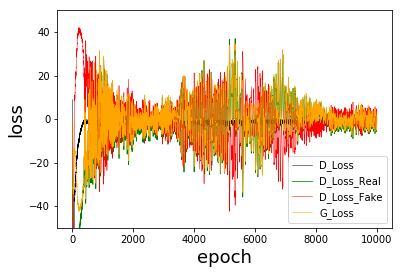

In [13]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.5, label = 'D_Loss')

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.75, label = 'D_Loss_Real')
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5, label = 'D_Loss_Fake')
plt.plot(gan.g_losses, color='orange', linewidth=0.5, label = "G_Loss")

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)

# plt.xlim(0, 2000)
plt.ylim(-50, 50)
plt.legend()
plt.show()

In [18]:
# Conv2DTranspose successful
'''
gan = WGANGP(input_dim = (IMAGE_SIZE, IMAGE_SIZE,1)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [4,4,4,4]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = 0.3
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1,1]
        , generator_conv_filters = [256,128,64,32,1]
        , generator_conv_kernel_size = [4,4,4,2,1]
        , generator_conv_strides = [2,2,2,2,1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))